# Import Neccesary Libraries

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import os
import time
import phik

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set(
    style='ticks', 
    context='talk', 
    font_scale=0.8, 
    rc={'figure.figsize': (8,6)}
)

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier

from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, RFECV, RFE, chi2

from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")

# Load train and test 

From critical review of the data sictionary, we were able to detect redundant columns and exclude them from our analysis

In [4]:
# Read CSV file
train_data = pd.read_csv('training_set.csv')

# Filter based on DISPCODE, i.e completed surveys
train_data = train_data[train_data['DISPCODE'] == 1100]

# Drop specified columns
columns_to_drop = ['IDATE', 'FMONTH', 'IDAY',
                     'SEQNO', 'X_PSU', 'CTELENM1',
                     'STATERE1', 'CELPHON1', 'COLGSEX', 'NUMADULT',
                      'NUMMEN', 'NUMWOMEN', 'RESPSLCT',
                     'SAFETIME', 'CTELNUM1', 'CELLFON5', 'CSTATE1',
                     "LANDLINE", "HHADULT", "CELLSEX", "LANDSEX", "BPMEDS",
                     "CHOLMED3", "ASTHNOW", "ARTHEXER", "ARTHEDU", "LMTJOIN3",
                     "ARTHDIS2", "NUMHHOL3", "NUMPHON3", "AVEDRNK3", "DRNK3GE5",
                     "MAXDRNKS", "FLSHTMY3", "IMFVPLA2", "FRENCHF1", "HAVECFS",
                     "WORKCFS", 'TOLDHEPC', "TRETHEPC", "PRIRHEPC", "MEDSHEPB",
                     "HPVADSHT", "LCSFIRST", "LCSLAST", "LCSNUMCG", "HOWLONG",
                     "CRVCLCNC", "PSATIME1", "PCPSARS2", "PCSTALK", "HADSIGM4",
                     "COLNTES1", "SIGMTES1", "LASTSIG4", "COLNCNCR", "VCLNTES1",
                     "STOLTEST", "BLDSTFIT", "SDNATES1", "CSRVSUM", "CSRVRTRN", "CSRVINST",
                     "CSRVCTL2", "CSRVCLIN", "CSRVPAIN", "CSRVCTL2", "HOMBPCHK",
                     "HOMRGCHK", "WHEREBP", "SHAREBP", "DRADVISE", "CDASSIST", "CDHELP", "CDHOUSE",
                     "CDSOCIAL", "CDDISCUS", "CRGVREL4", "CRGVLNG1", "CRGVHRS1", "CRGVPRB3",
                     "CRGVALZD", "CRGVPER1", "CRGVHOU1" , "CRGVEXPT", "USEMRJN3", "LASTSMK2", "STOPSMK2",
                     "GUNLOAD", "LOADULK2", "RCSRLTN2", "CASTHDX2", "CASTHNO2", "QSTVER",
                     "QSTLANG", "MSCODE", "X_STSTR", "X_STRWT", "X_RAWRAKE", "X_WT2RAKE", "X_CHISPNC",
                     "X_CRACE1", "X_CPRACE1", "CAGEG", "X_CLLCPWT", "X_DUALUSE", "X_DUALCOR",
                     "X_LLCPWT2", "X_LLCPWT", "X_MRACE1", "X_HISPANC", "X_RACE", "X_RACEG21", "X_RACEGR3", "X_RACEPRV",
                     "X_AGEG5YR", "X_AGE80", "X_AGE_G", "HTIN4", "HTM4", "WTKG3", "X_BMI5", "X_RFSMOK3", "X_CURECI1",
                     "DROCDY3_", "X_RFBING5", "X_DRNKWK1", "X_RFDRHV7", "X_MISFRT1", "X_MISVEG1",
                     "X_FRTRES1", "X_VEGRES1", "X_FRTLT1A", "X_VEGLT1A", "X_FRT16A", "X_VEG23A", "X_FRUITE1", "X_VEGETE1",
                     "GENHLTH", "PHYSHLTH",  "PRIMINSR", "EXERANY2","BPHIGH6",   "CHOLCHK3", "CVDINFR4",  "CVDCRHD4", "ASTHMA3",
                     "HAVARTH5", "BIRTHSEX", "EDUCA", "CHILDREN", "INCOME3", "SMOKE100",
                     "ECIGNOW1", "ALCDAY5", "HIVTST7", "FRUIT2",   "FRUITJU2","FVGREEN1",  "POTATOE1", "VEGETAB2", "Record_ID"]
train_data = train_data.drop(columns=columns_to_drop)

# Write filtered DataFrame to a new CSV file
train_data.to_csv('new_train.csv', index=False)

In [5]:
train_data = pd.read_csv("new_train.csv")
train_data.head()

X_STATE  IMONTH  IYEAR  DISPCODE  PVTRESD1  COLGHOUS  LADULT1  CADULT1  \
0       29      11   2021      1100       NaN       NaN      NaN      1.0   
1       28       3   2021      1100       NaN       NaN      NaN      1.0   
2       19       8   2021      1100       NaN       NaN      NaN      1.0   
3       27       9   2021      1100       NaN       NaN      NaN      1.0   
4       50       4   2021      1100       NaN       NaN      NaN      1.0   

   PVTRESD3  CCLGHOUS  ...  X_AIDTST4  FTJUDA2_  FRUTDA2_  GRENDA1_  FRNCHDA_  \
0       1.0       NaN  ...        9.0       NaN      14.0     100.0       0.0   
1       1.0       NaN  ...        1.0       0.0     200.0      33.0      10.0   
2       1.0       NaN  ...        2.0       0.0      43.0       3.0       7.0   
3       1.0       NaN  ...        1.0       3.0       7.0      29.0     100.0   
4       1.0       NaN  ...        1.0     200.0     500.0     300.0     100.0   

   POTADA1_  VEGEDA2_  X_FRUTSU1  X_VEGESU1  Outcome  
0       0.0     100.0        NaN      200.0      Neg  
1      17.0     100.0      200.0      160.0      Pos  
2       2.0      14.0       43.0       26.0      Neg  
3     100.0      50.0       10.0      279.0      Pos  
4     500.0     600.0      700.0     1500.0      Pos  

[5 rows x 127 columns]

## **Data Exporation and Cleaning**

In [6]:
# Change the headers to lowercase
train_data.columns = train_data.columns.str.lower()

In [7]:
# Generarl information about the train set
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65802 entries, 0 to 65801
Columns: 127 entries, x_state to outcome
dtypes: float64(92), int64(34), object(1)
memory usage: 63.8+ MB


In [8]:
# Display the number rows and column
train_data.shape

(65802, 127)

# Quick Visualization on Demography

In [9]:
def countplot(df, col):
    """Create a count plot to visualize the distribution of outcomes for a specified column.

    Args:
    - df (pd.DataFrame): A DataFrame containing the data.
    - col (str): The column in the DataFrame to be plotted on the x-axis.
    """
    plot = sns.countplot(data=df, x=col, hue="outcome", palette=['#0288D1', '#B3E5FC'])

    plot.set_xticklabels(plot.get_xticklabels())
    plot.set_title(f"{col.upper()} column value counts with Outcome", weight='bold')
    plt.show();


#### Year

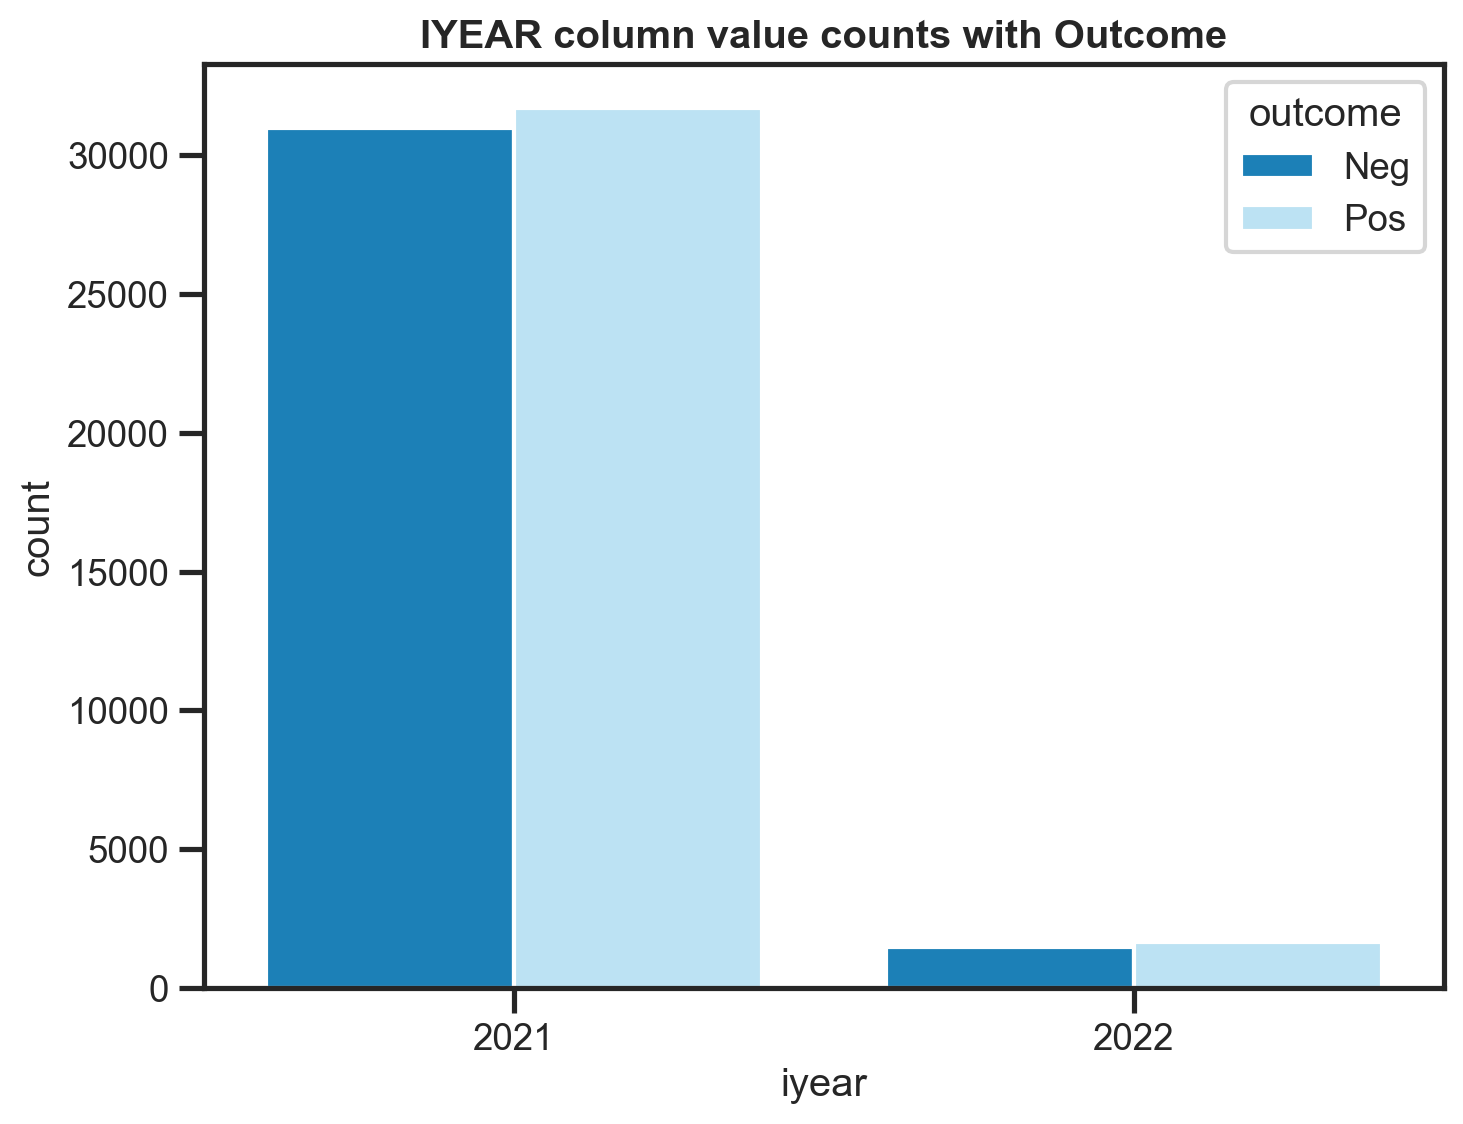

In [10]:
countplot(train_data, 'iyear')

#### Gender
 
Male = 1

Female = 2

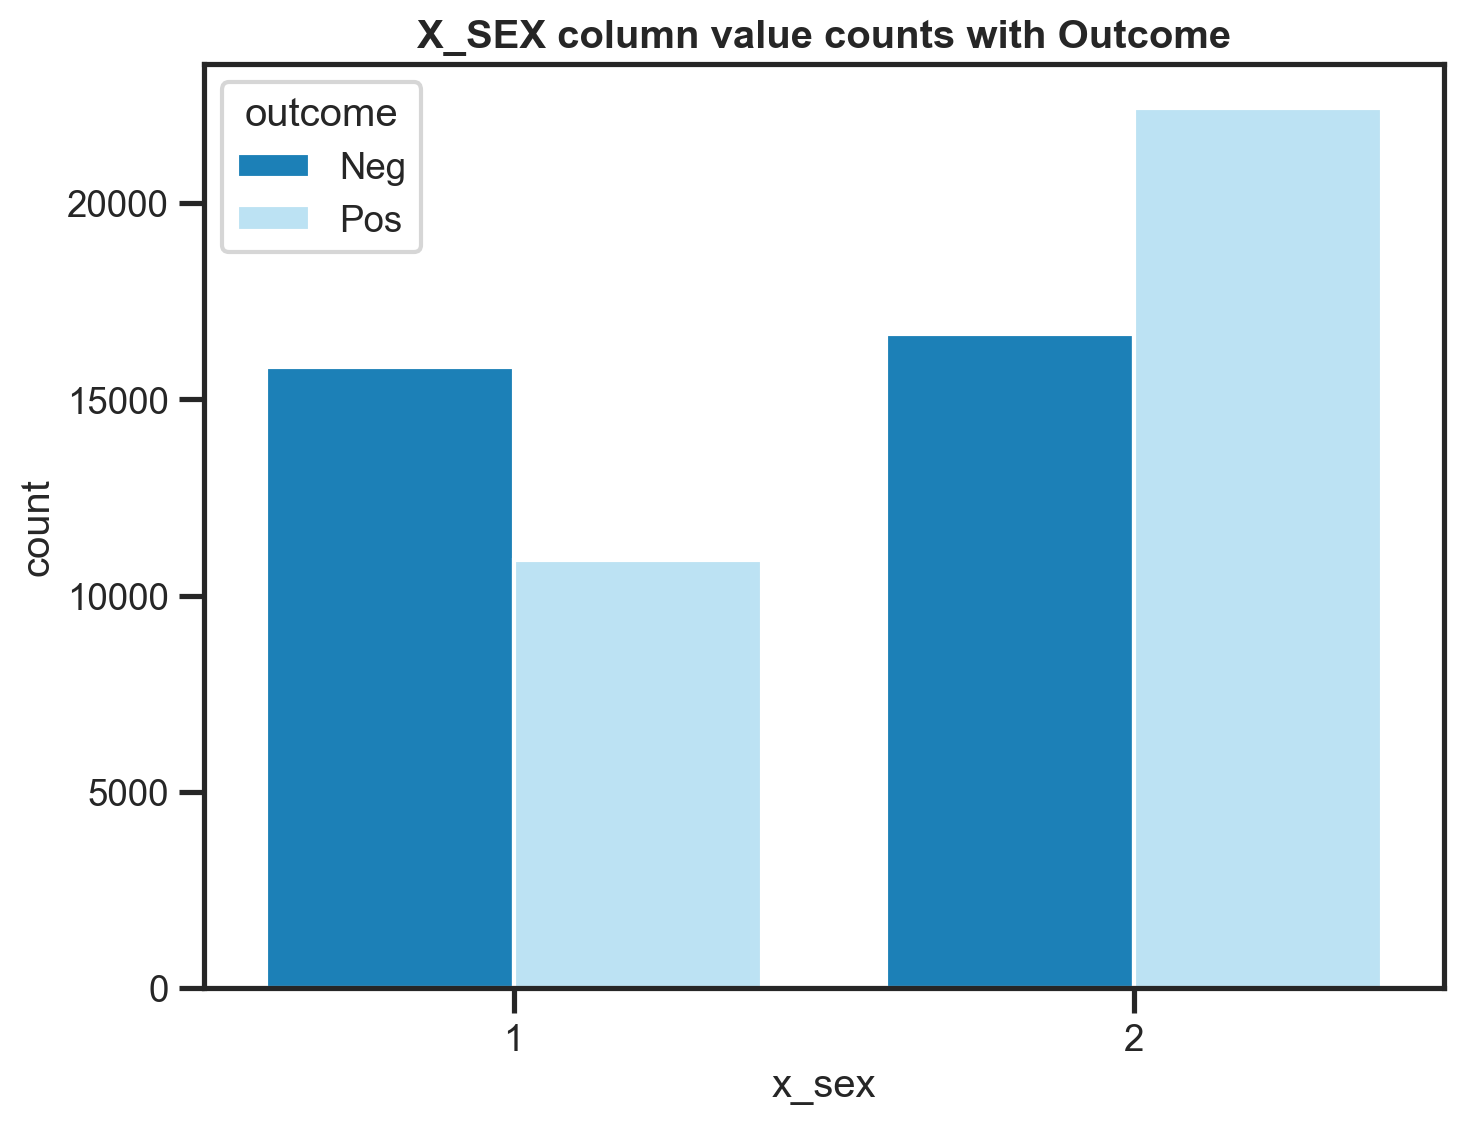

In [11]:
countplot(train_data, 'x_sex')

#### Age groups

group 1 = 18 - 64

group 2 = 65 >

group 3 = info not provided

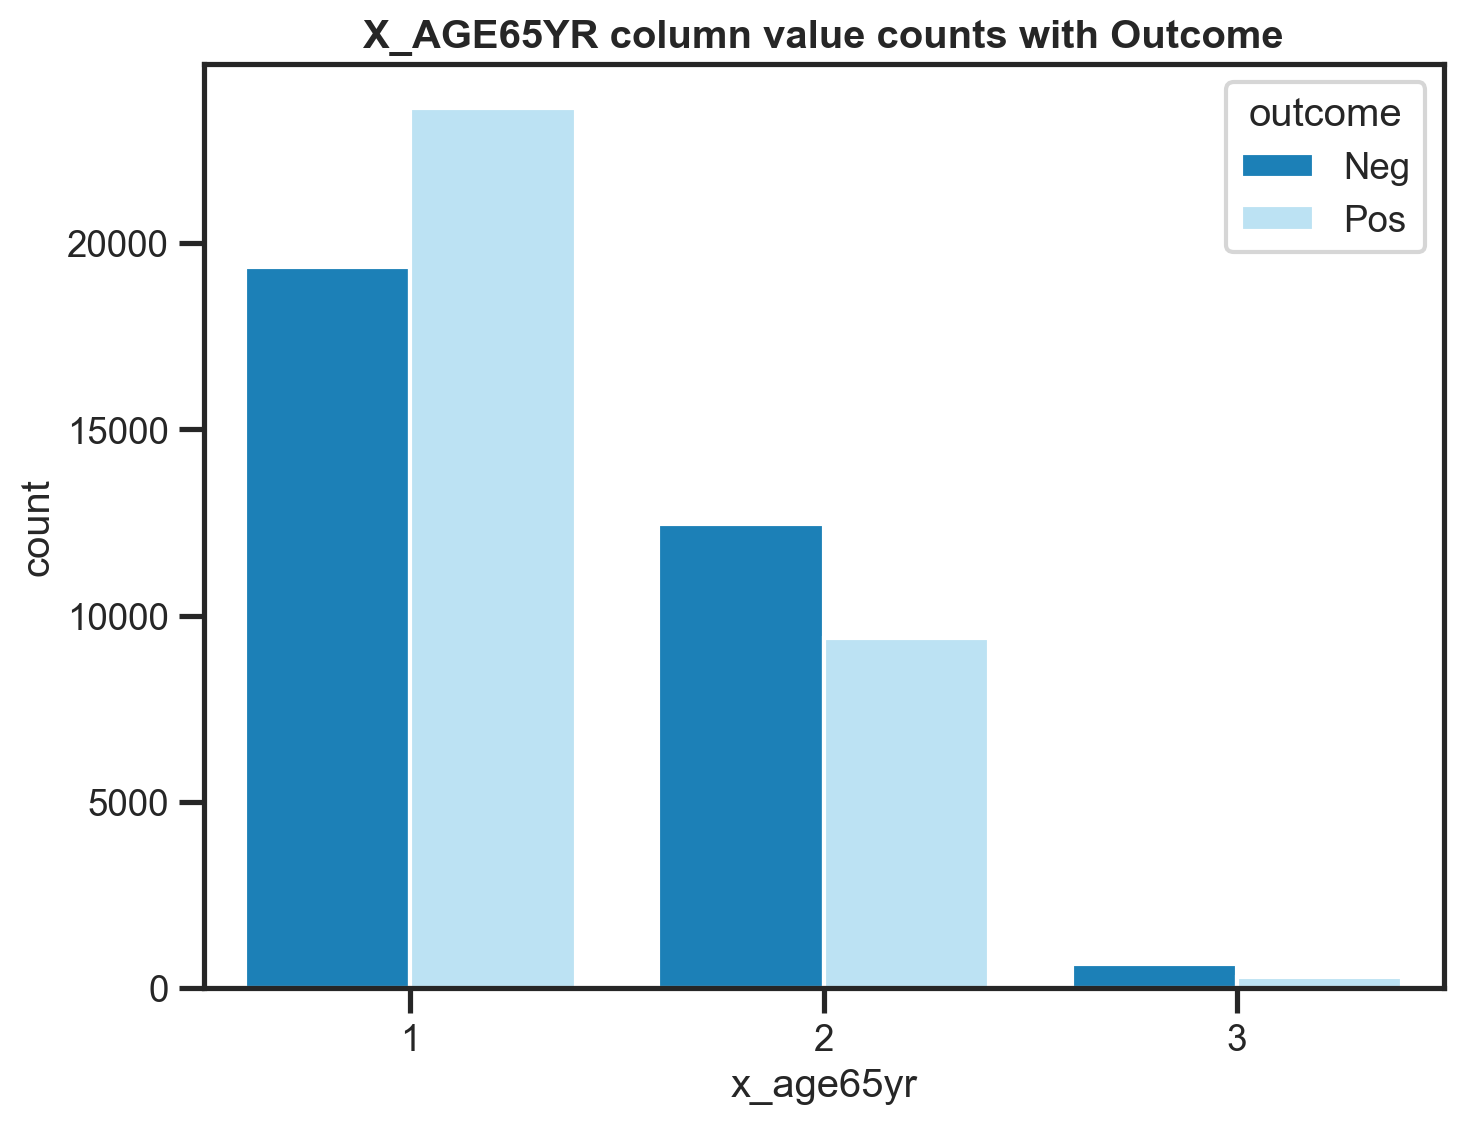

In [12]:
countplot(train_data, 'x_age65yr')


#### BMI

1 = underweight

2 = normal weight

3 = overweight

4 = obese

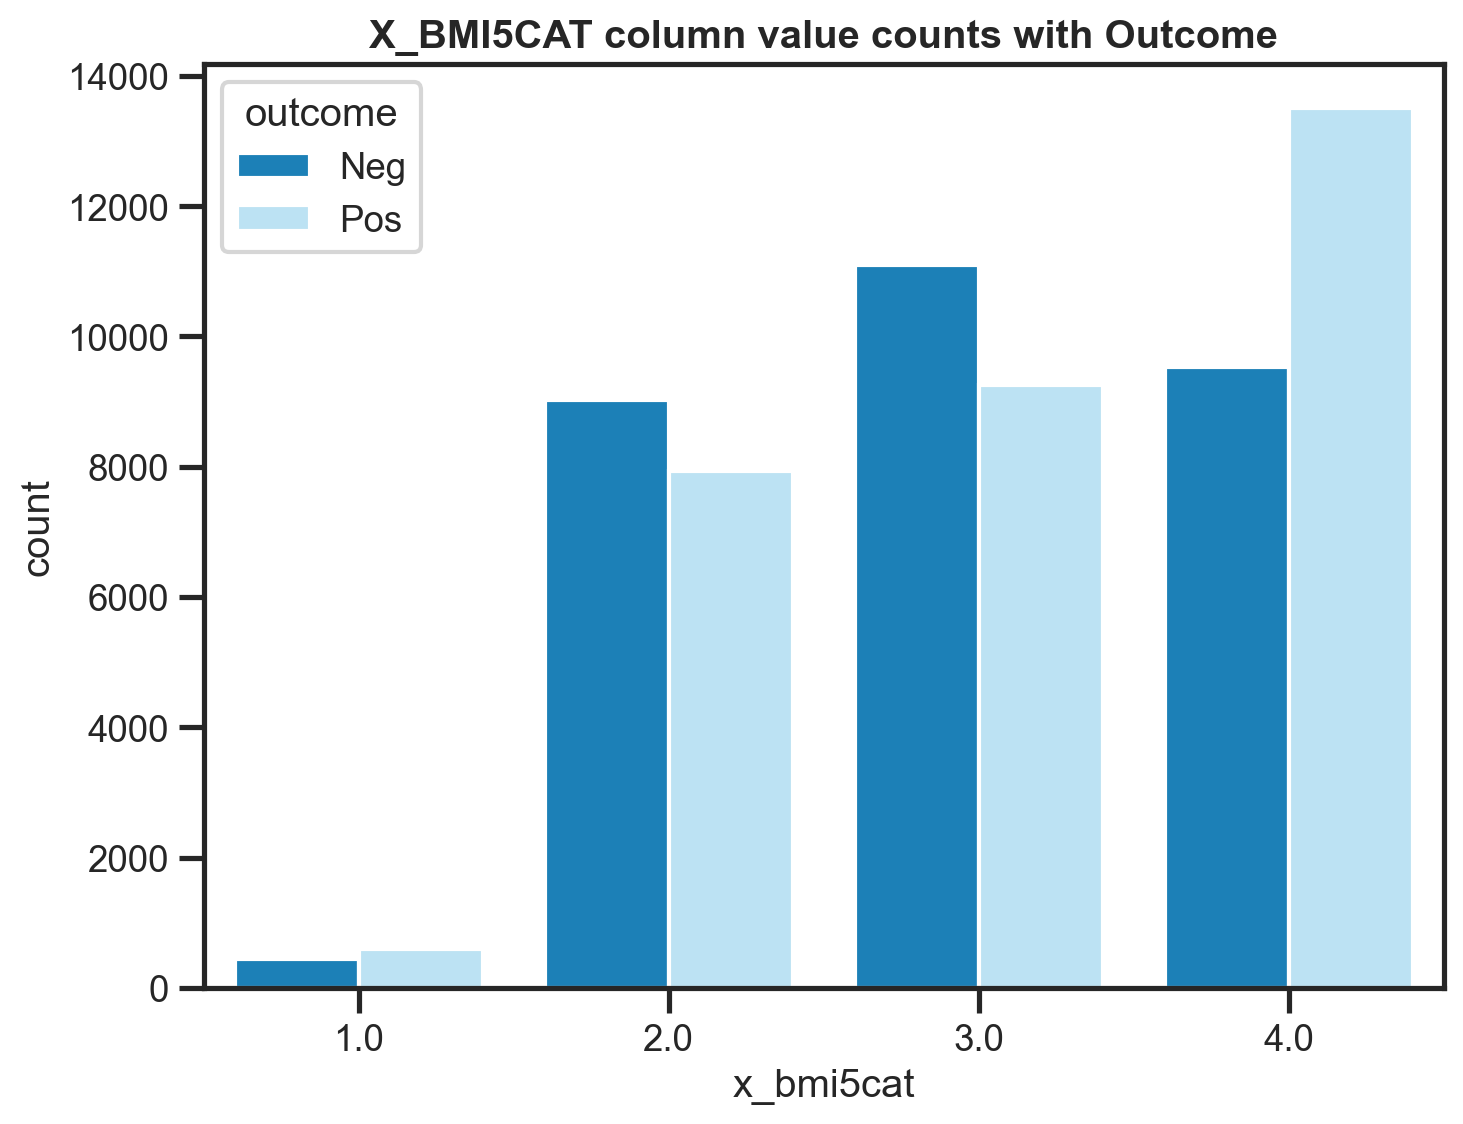

In [13]:
countplot(train_data, 'x_bmi5cat')

#### Marital

1 = married

2 = divorced

3 = widowed

4 = separated

5 = never married

6 = unmarried couple

9 = refused

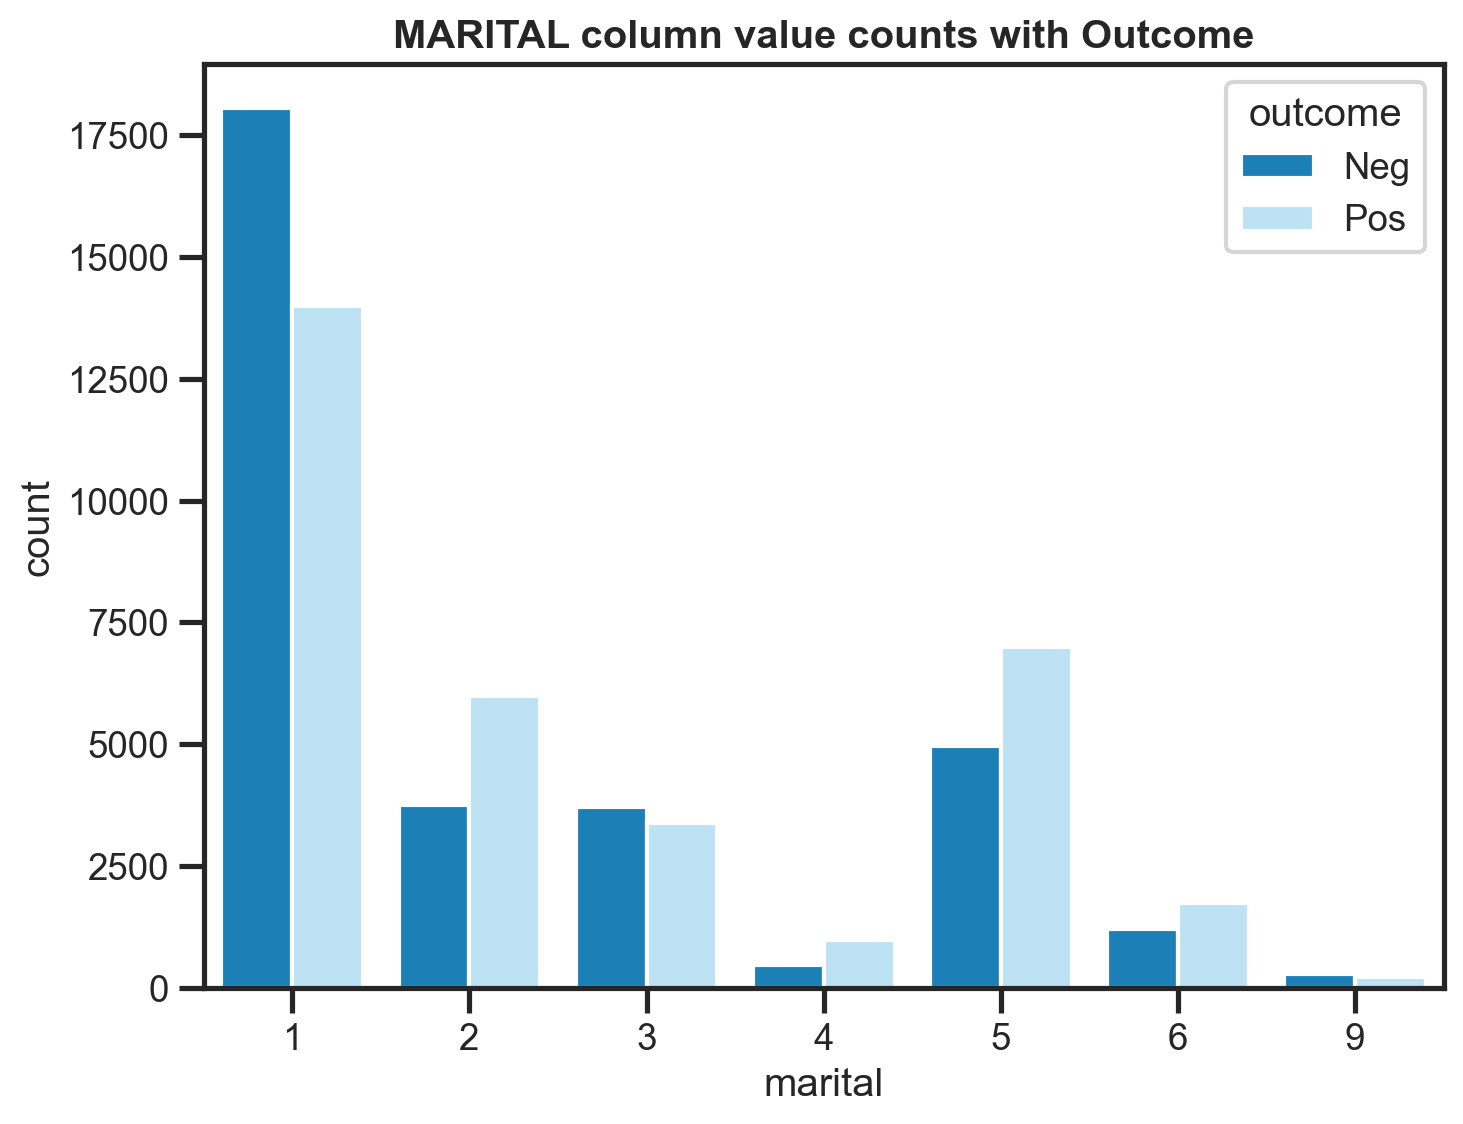

In [14]:
countplot(train_data, 'marital')

In [15]:
# Display number of empty cells in each column
print(train_data.shape)
train_data.isnull().sum().sort_values(ascending=False).head(10)

(65802, 127)


toldcfs     65802
colghous    65798
havehepc    65768
cclghous    65651
psatest1    65472
vircolo1    65469
stooldn1    65469
smalstol    65469
csrvdein    65073
csrvdoc1    65073
dtype: int64

### Deleting Columns with null values up to 50000 and above


In [16]:
# Drop column with empty cell above 50000
train_data.dropna(thresh=50000, inplace=True, axis=1)
print(train_data.shape)

# Display column according to number of null values in decreasing order
train_data.isnull().sum().sort_values(ascending=False).head(20)

(65802, 68)


x_rfchol3    8807
toldhi3      8761
x_bmi5cat    4387
x_vegesu1    2972
x_frutsu1    2201
frutda2_     1364
potada1_     1342
ftjuda2_     1200
vegeda2_     1164
grenda1_     1059
x_urbstat    1032
x_metstat    1032
frnchda_      944
x_michd       746
x_drdxar3     414
x_lmtwrk3     414
x_lmtact3     414
x_aidtst4       1
medcost1        1
x_cholch3       0
dtype: int64

### Value Counts for the columns with null values

In [17]:
def null_counts(df):
    """Print value counts of non-null and null values for columns with missing data in a DataFrame.

    Args:
        df (pd.DataFrame): A DataFrame containing the data.

    Returns:
        columns_with_nulls (list): A list of column names with missing values

    """

    # Get a Series containing the count of null values in each column
    null_counts = df.isnull().sum()

    # Sort the columns based on the number of null values in descending order and get the columns
    columns_with_nulls = null_counts[null_counts > 0].sort_values(ascending=False).index.tolist()

    # Create a dictionary to store value_counts for each column
    value_counts_dict = {}

    # Iterate through columns with null values and compute value_counts
    for column in columns_with_nulls:
        value_counts_dict[column] = df[column].value_counts(dropna=False)

    # Printing the value_counts for each column with null values in descending order of null values
    for column in columns_with_nulls:
        value_counts = value_counts_dict[column]
        print(f"Value counts for column '{column}' (Null Count: {null_counts[column]}):\n{value_counts}\n")

    return columns_with_nulls

In [18]:
columns_with_nulls = null_counts(train_data)

Value counts for column 'x_rfchol3' (Null Count: 8807):
1.0    31774
2.0    24741
NaN     8807
9.0      480
Name: x_rfchol3, dtype: int64

Value counts for column 'toldhi3' (Null Count: 8761):
2.0    31819
1.0    24742
NaN     8761
7.0      434
9.0       46
Name: toldhi3, dtype: int64

Value counts for column 'x_bmi5cat' (Null Count: 4387):
4.0    23041
3.0    20362
2.0    16965
NaN     4387
1.0     1047
Name: x_bmi5cat, dtype: int64

Value counts for column 'x_vegesu1' (Null Count: 2972):
NaN        2972
200.0      1441
157.0      1351
143.0      1092
186.0       986
           ... 
476.0         1
12084.0       1
1216.0        1
9985.0        1
791.0         1
Name: x_vegesu1, Length: 1261, dtype: int64

Value counts for column 'x_frutsu1' (Null Count: 2201):
100.0     8770
200.0     6923
300.0     3150
43.0      3002
NaN       2201
          ... 
3020.0       1
923.0        1
141.0        1
383.0        1
380.0        1
Name: x_frutsu1, Length: 438, dtype: int64

Value counts for co

In [19]:
len(columns_with_nulls)

19

### Grouping the 19 columns into categorical and continuous columns and replacing nulls values, 9, and 7 in the categorical columns with respective mode and null values in the continuous columns with respective mean or median (depending on outliers)

In [20]:
# Identify the data types of columns to distinguish between continuous and categorical
continuous_columns = []
categorical_columns = []

for column in train_data.columns[train_data.columns.isin(columns_with_nulls)]:
    if train_data[column].nunique() <= 4:
        # for null columns, columns with less than or equal to 4 unique values are categorical
        categorical_columns.append(column)
    else:
        continuous_columns.append(column)

In [21]:
print(
    f"number of contious columns with missing values = {len(continuous_columns)}\n"
      f"number of contious columns with missing values = {len(categorical_columns)}"
      )

number of contious columns with missing values = 8
number of contious columns with missing values = 11


In [22]:
def fill_null_values(df, columns_with_nulls):
    """Fill missing values of columns with the right approach.

    Args:
        df (pd.DataFrame): A DataFrame containing the data.
        columns_with_nulls (list): A list of column names with missing values.

    Returns:
        replacement_values_dict (dict): A dictionary that holds the replacement values for each column.
        
    """
    continuous_columns = []
    categorical_columns = []

    for column in df.columns[df.columns.isin(columns_with_nulls)]:
        if df[column].nunique() <= 4:
            # for null columns, columns with less than or equal to 4 unique values are categorical
            categorical_columns.append(column)
        else:
            continuous_columns.append(column)
    # Create a dictionary to store the replacement values for each column
    replacement_values_dict = {}

    print("Columns and Method to replace missing values")
    
    # Automate the replacement of null values
    for column in categorical_columns:
        replacement_values_dict[column] = df[column].mode().iloc[0]
        # columns and mode of fillina missing values
        print(f"'{column}': (Replaced with Mode)")

    for column in continuous_columns:
        if df[column].isnull().any():
            # Check for outliers using Z-score
            z_scores = np.abs(stats.zscore(df[column].dropna()))
            is_outlier = z_scores > 3  # Adjust the threshold as needed
            if is_outlier.any():
                # Replace null values with median if outliers are present
                replacement_values_dict[column] = df[column].median()
                # Print value_counts for replaced column
                print(f"'{column}': (Replaced with Median)")
            else:
                # Replace null values with mean if no outliers are present
                replacement_values_dict[column] = df[column].mean()
                # Print value_counts for replaced column
                print(f"'{column}': (Replaced with Mean)")
    return replacement_values_dict
replacement_values_dict = fill_null_values(train_data, columns_with_nulls)

Columns and Method to replace missing values
'medcost1': (Replaced with Mode)
'toldhi3': (Replaced with Mode)
'x_metstat': (Replaced with Mode)
'x_urbstat': (Replaced with Mode)
'x_rfchol3': (Replaced with Mode)
'x_michd': (Replaced with Mode)
'x_drdxar3': (Replaced with Mode)
'x_lmtact3': (Replaced with Mode)
'x_lmtwrk3': (Replaced with Mode)
'x_bmi5cat': (Replaced with Mode)
'x_aidtst4': (Replaced with Mode)
'ftjuda2_': (Replaced with Median)
'frutda2_': (Replaced with Median)
'grenda1_': (Replaced with Median)
'frnchda_': (Replaced with Median)
'potada1_': (Replaced with Median)
'vegeda2_': (Replaced with Median)
'x_frutsu1': (Replaced with Median)
'x_vegesu1': (Replaced with Median)


In [23]:
# Replace null values in the DataFrame with the respective mode/median/mean
train_data.fillna(replacement_values_dict, inplace=True)

In [24]:
# Print first 5 rows of the clean dataset
train_data.head()

x_state  imonth  iyear  dispcode  sexvar  persdoc3  medcost1  checkup1  \
0       29      11   2021      1100       2         1       1.0         1   
1       28       3   2021      1100       1         1       2.0         1   
2       19       8   2021      1100       1         1       2.0         1   
3       27       9   2021      1100       1         2       2.0         1   
4       50       4   2021      1100       2         1       2.0         1   

   toldhi3  cvdstrk3  ...  x_aidtst4  ftjuda2_  frutda2_  grenda1_  frnchda_  \
0      1.0         2  ...        9.0       3.0      14.0     100.0       0.0   
1      2.0         2  ...        1.0       0.0     200.0      33.0      10.0   
2      2.0         2  ...        2.0       0.0      43.0       3.0       7.0   
3      1.0         2  ...        1.0       3.0       7.0      29.0     100.0   
4      1.0         2  ...        1.0     200.0     500.0     300.0     100.0   

   potada1_  vegeda2_  x_frutsu1  x_vegesu1  outcome  
0       0.0     100.0      100.0      200.0      Neg  
1      17.0     100.0      200.0      160.0      Pos  
2       2.0      14.0       43.0       26.0      Neg  
3     100.0      50.0       10.0      279.0      Pos  
4     500.0     600.0      700.0     1500.0      Pos  

[5 rows x 68 columns]

In [25]:
train_data.isnull().sum().any()

False

### Exploring the cleaned dataset and delecting any redundant columns using the data dictionary

In [26]:
train_data.shape

(65802, 68)

In [27]:
# Display all column names
train_data.columns

Index(['x_state', 'imonth', 'iyear', 'dispcode', 'sexvar', 'persdoc3',
       'medcost1', 'checkup1', 'toldhi3', 'cvdstrk3', 'chcscncr', 'chcocncr',
       'chccopd3', 'chckdny2', 'marital', 'renthom1', 'cpdemo1b', 'veteran3',
       'employ1', 'weight2', 'height3', 'deaf', 'blind', 'decide', 'diffwalk',
       'diffdres', 'diffalon', 'usenow3', 'flushot7', 'pneuvac4', 'x_metstat',
       'x_urbstat', 'x_imprace', 'x_rfhlth', 'x_phys14d', 'x_hlthpln',
       'x_hcvu652', 'x_totinda', 'x_rfhype6', 'x_cholch3', 'x_rfchol3',
       'x_michd', 'x_ltasth1', 'x_casthm1', 'x_asthms1', 'x_drdxar3',
       'x_lmtact3', 'x_lmtwrk3', 'x_prace1', 'x_sex', 'x_age65yr', 'x_bmi5cat',
       'x_rfbmi5', 'x_chldcnt', 'x_educag', 'x_incomg1', 'x_smoker3',
       'drnkany5', 'x_aidtst4', 'ftjuda2_', 'frutda2_', 'grenda1_', 'frnchda_',
       'potada1_', 'vegeda2_', 'x_frutsu1', 'x_vegesu1', 'outcome'],
      dtype='object')

```
1100 = Completed Interview 
1200 = Partial Complete Interview
```
Dropping the `dispcode` column as all entries indicated that respondent completed the interview

#### check for outliers

In [28]:
def plot_boxplot(df, col, target):
    """Create a box plot by taking in three arguements:
        
    Args:
        df (pd.DataFrame): The dataframe 
        col (str): The column of interest
        target: The target column.
        
    """
    plt.figure(figsize=(8, 5))
    feature = df[col]
    target = df[target]
    sns.boxplot(data=df, y=feature, x=target)
    plt.title(col)    
    plt.show()

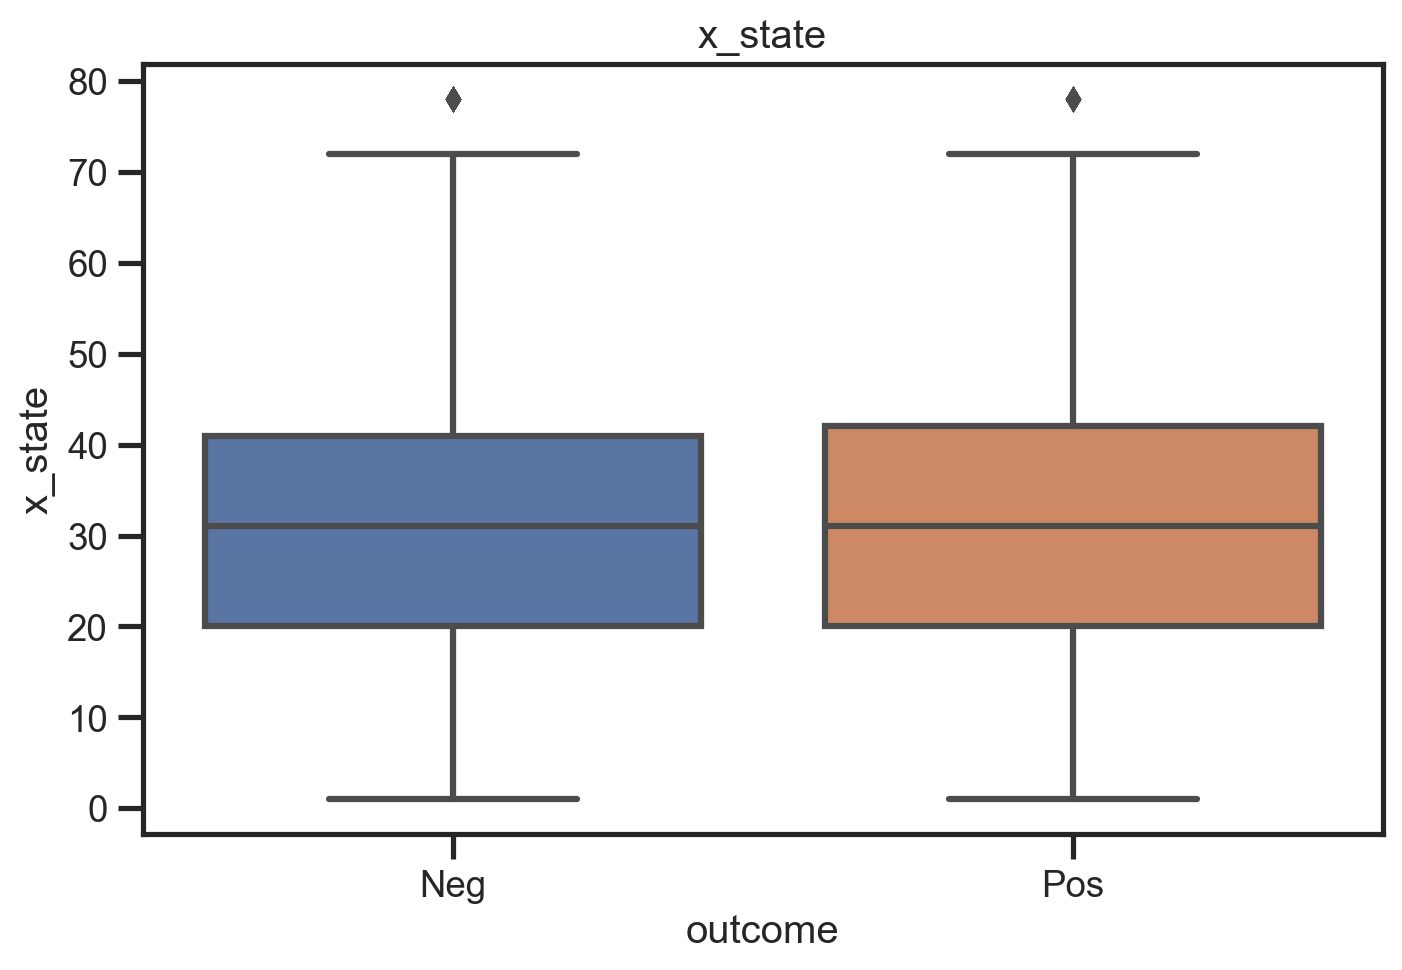

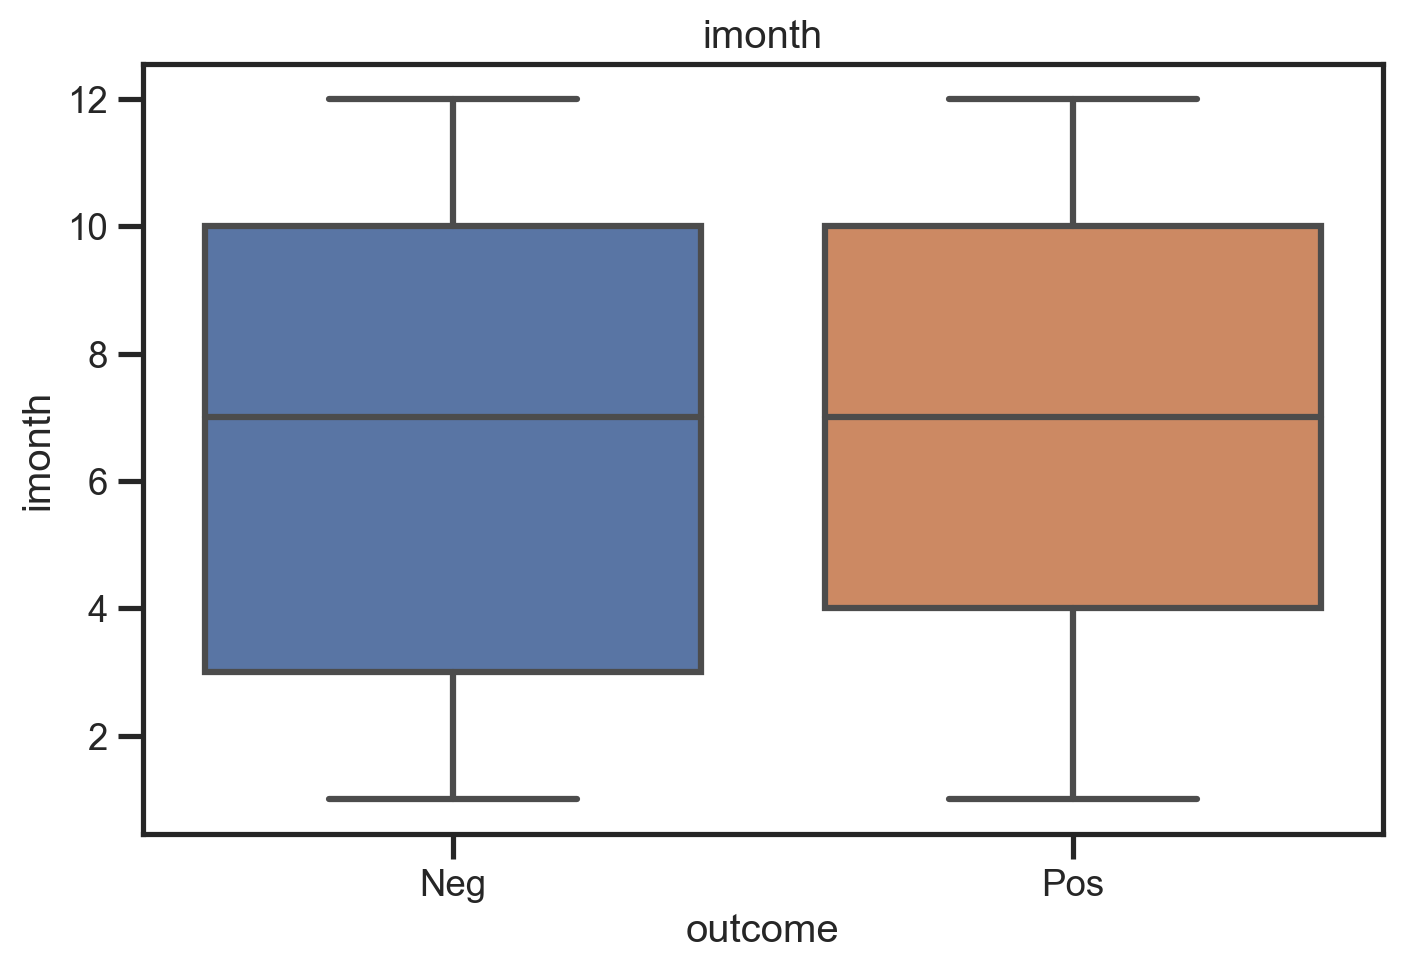

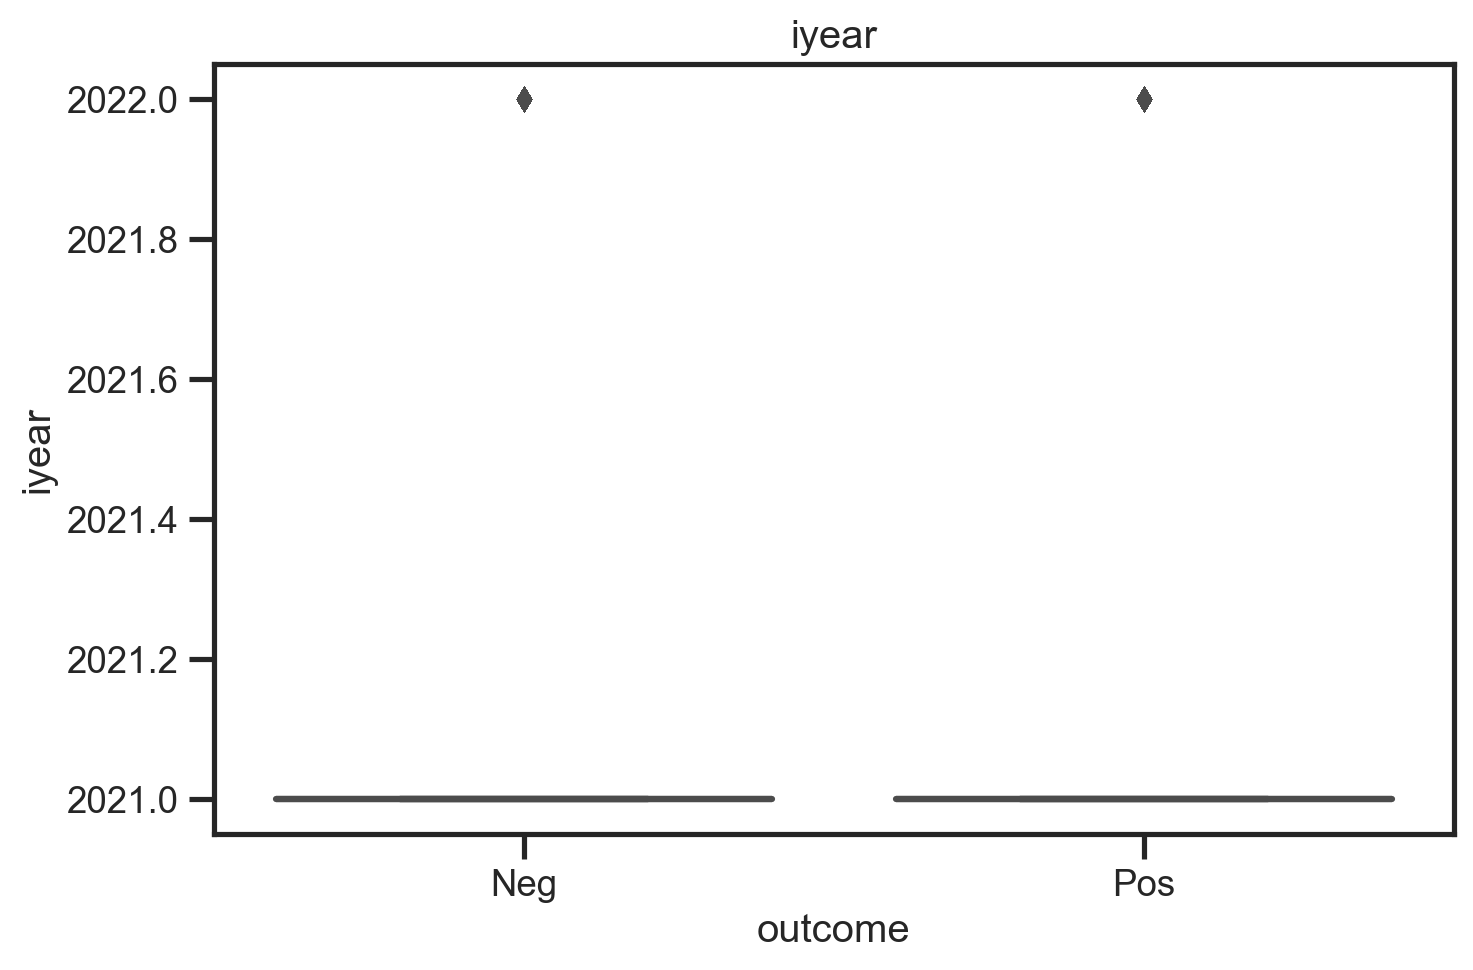

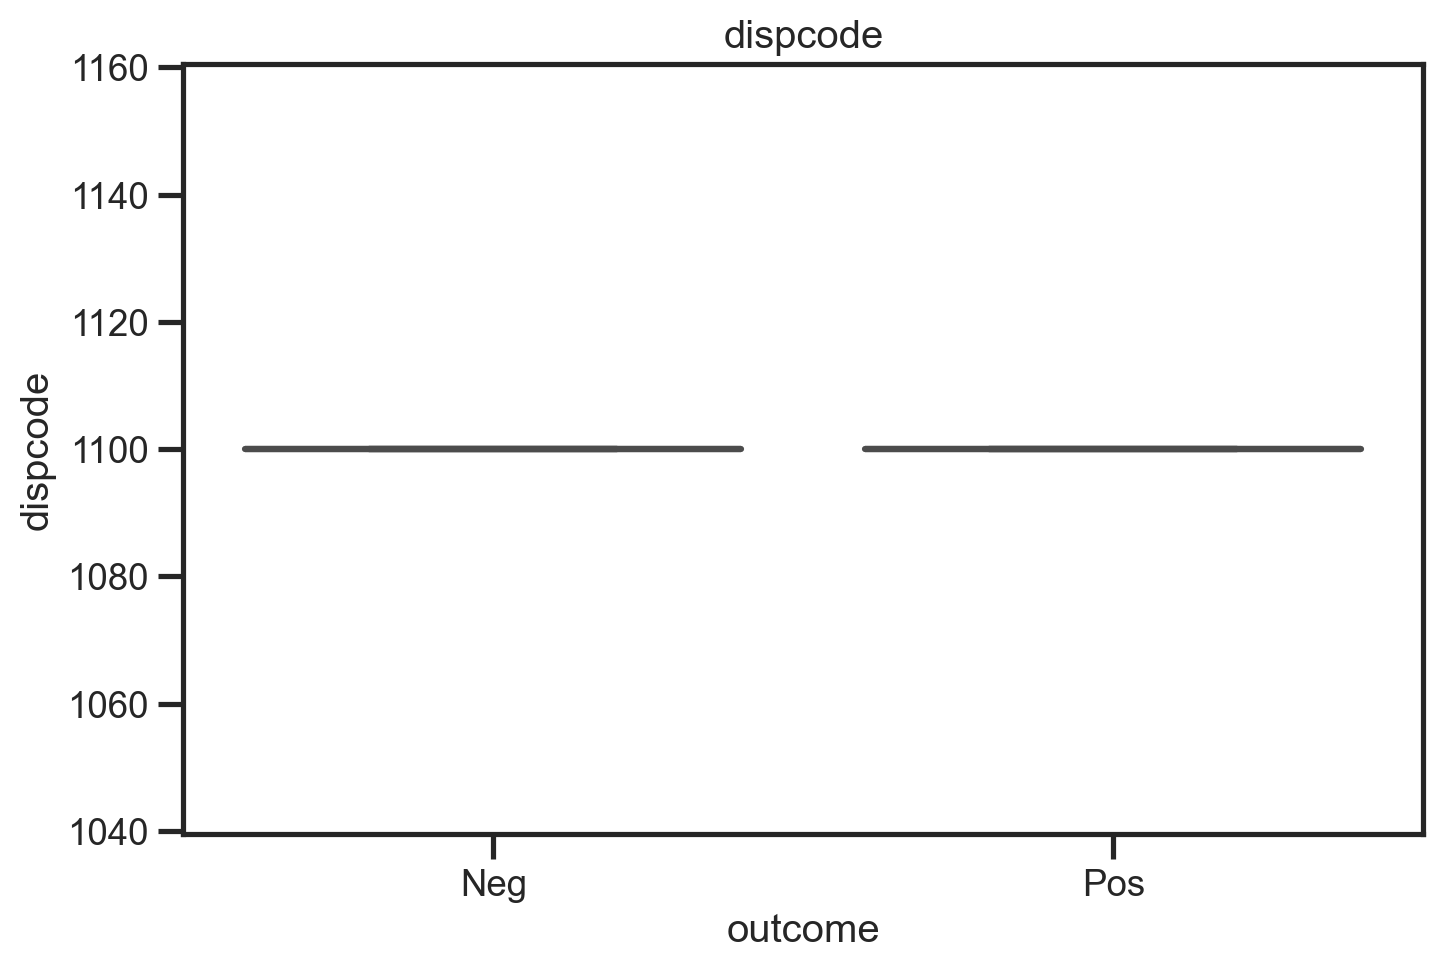

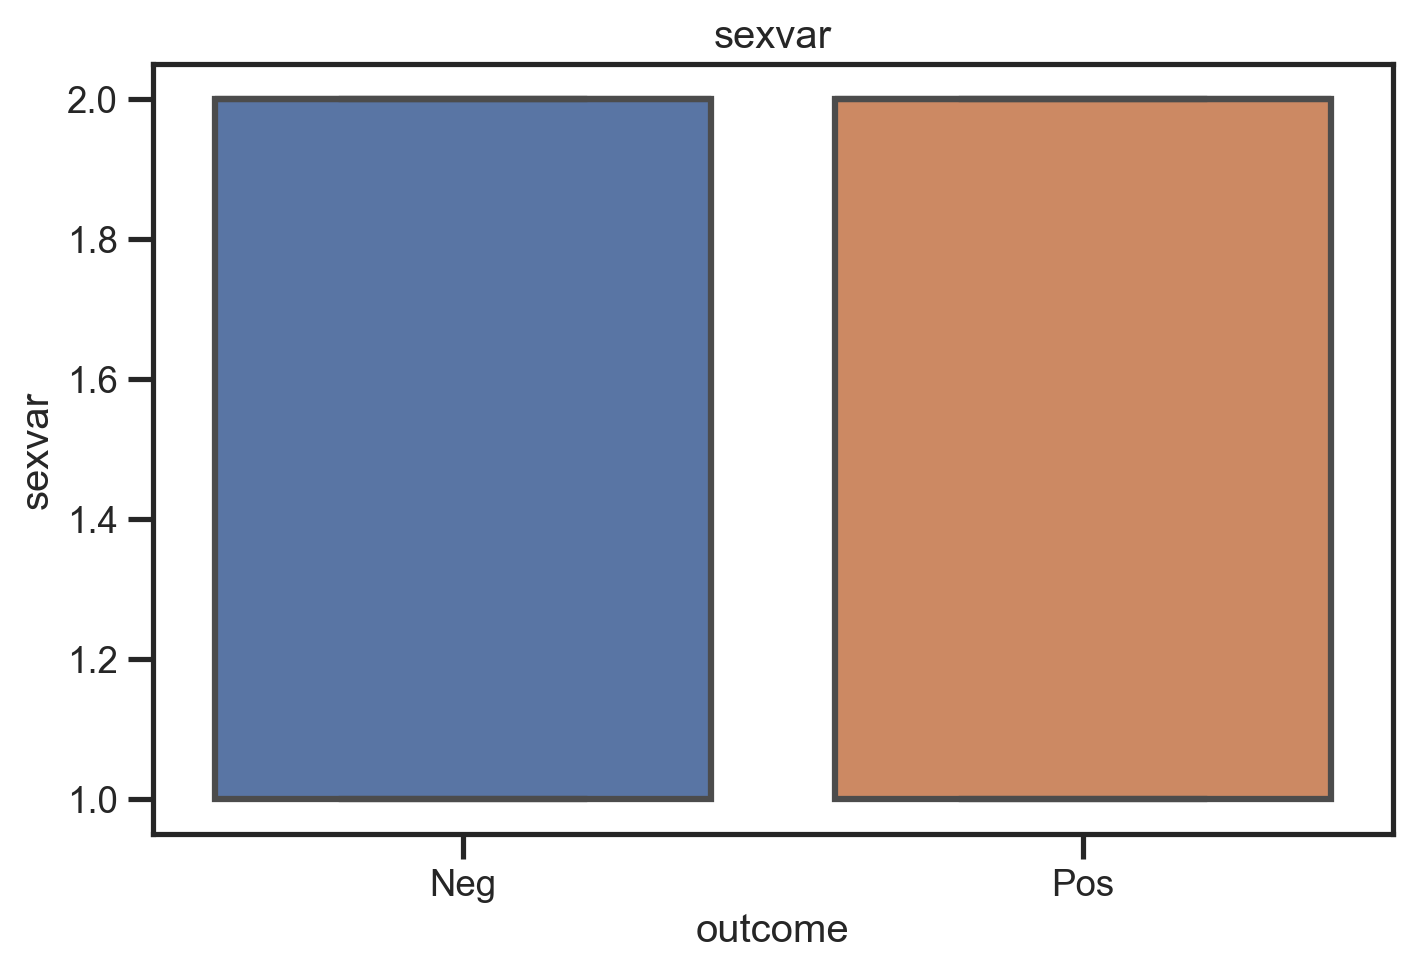

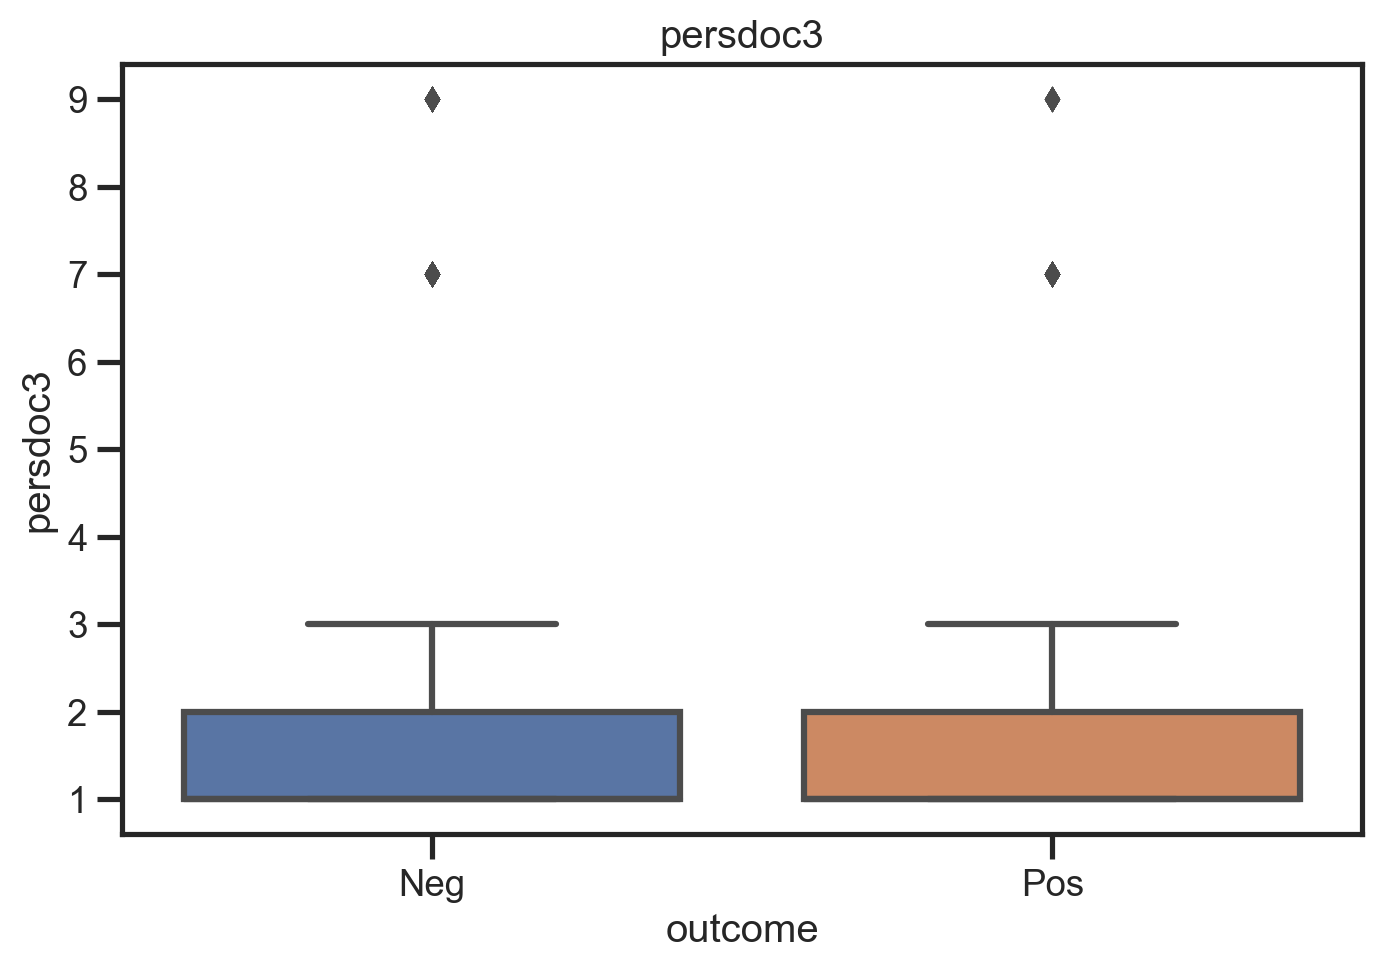

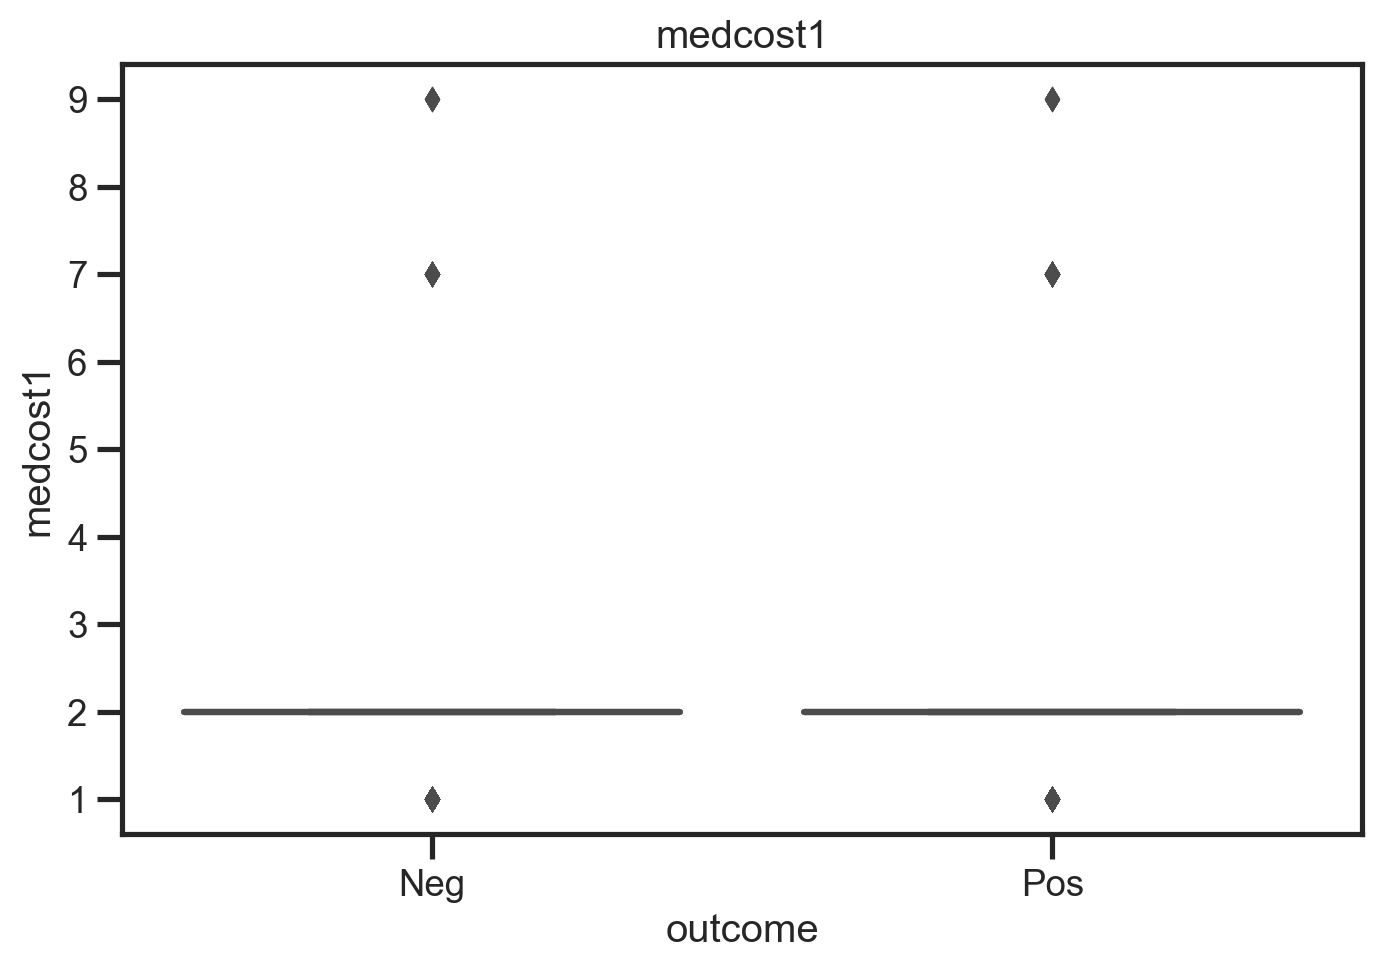

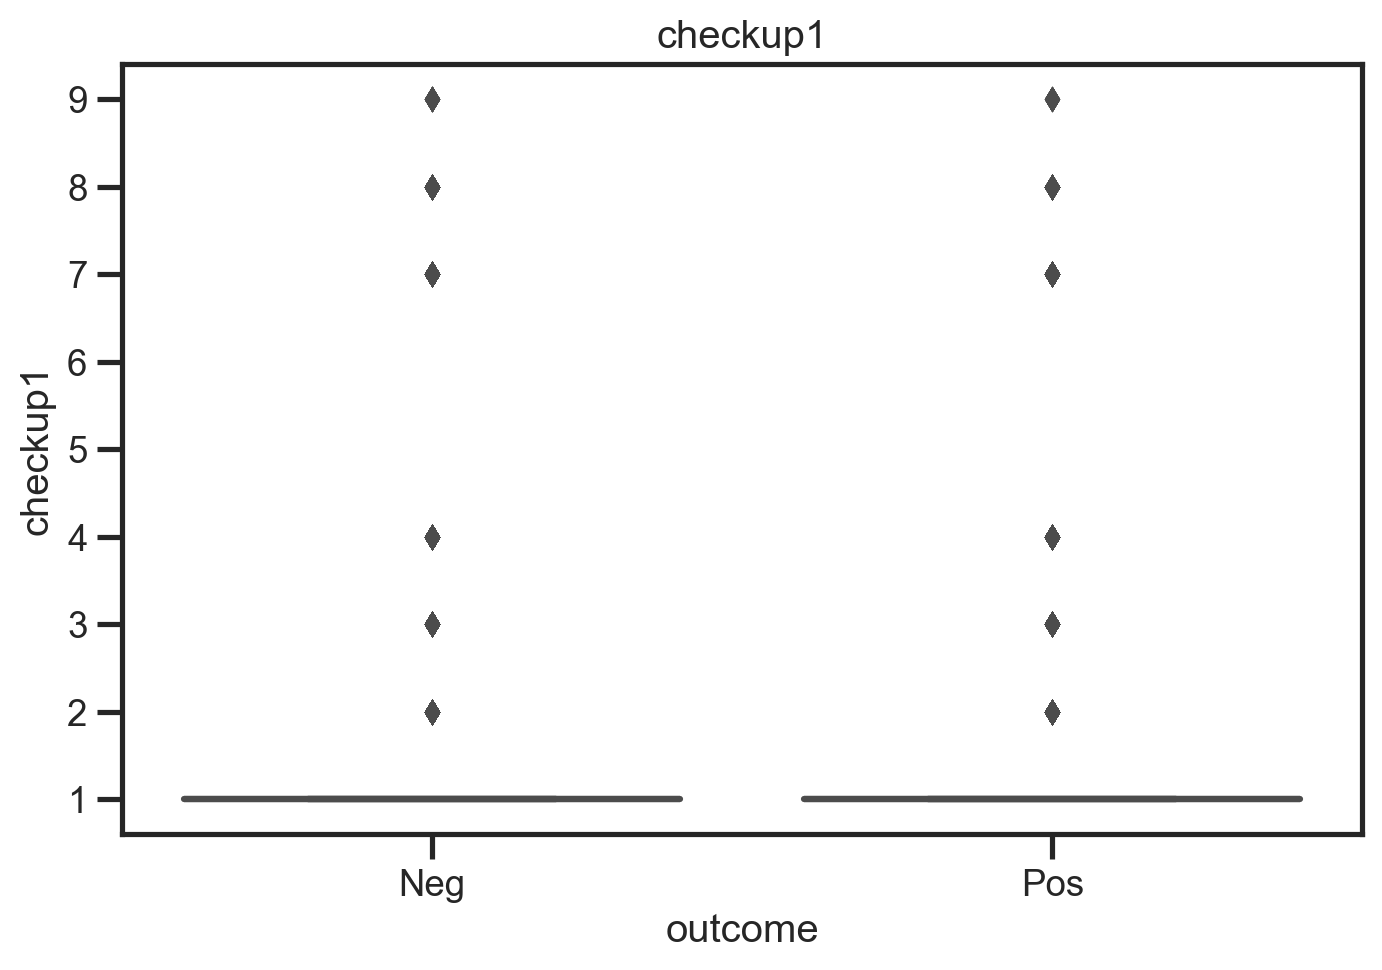

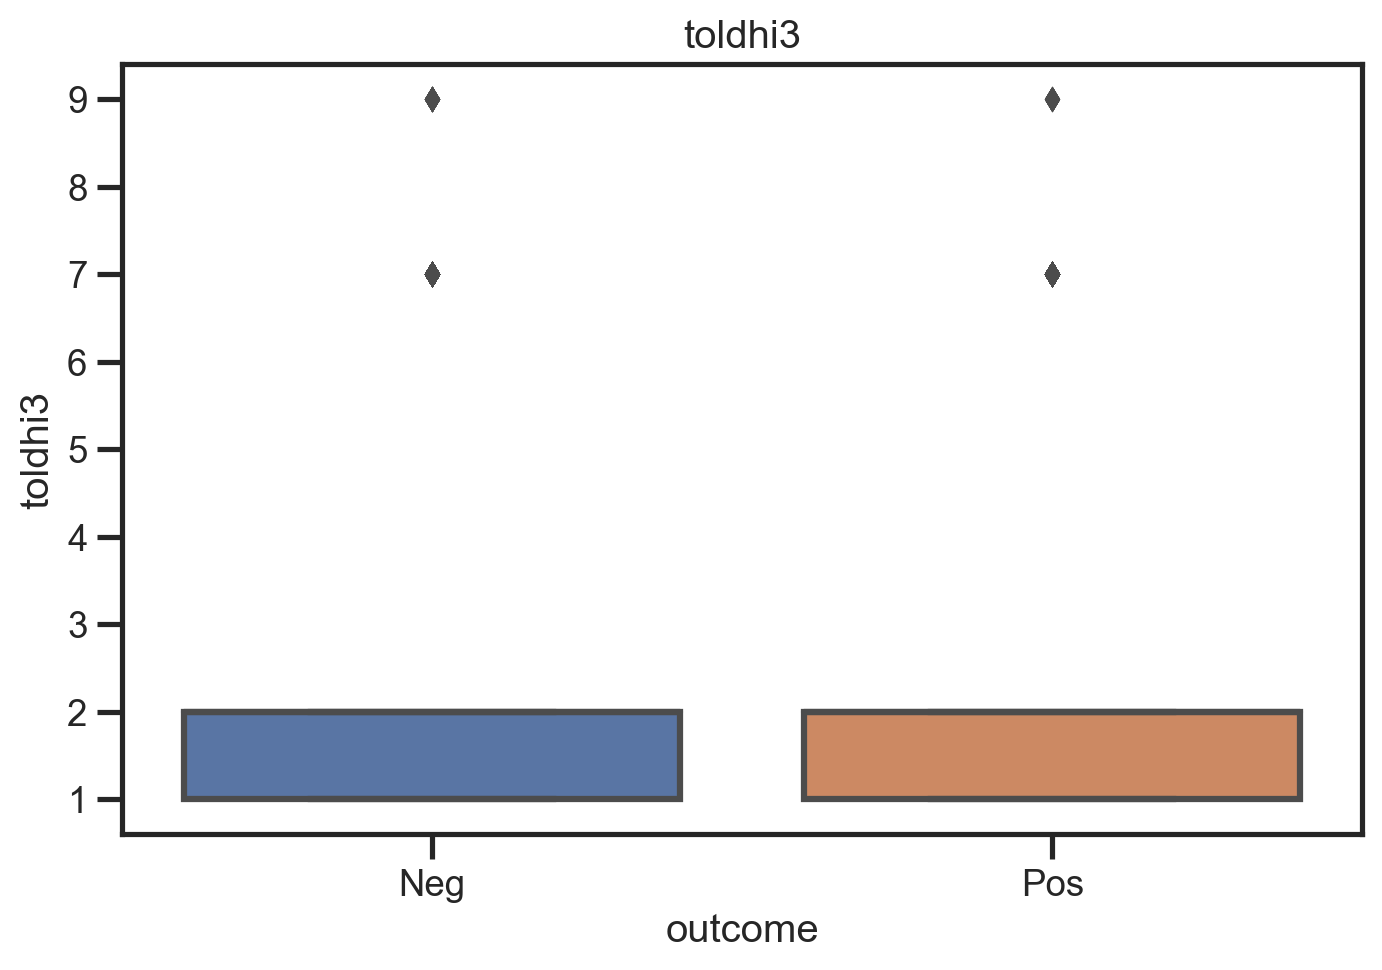

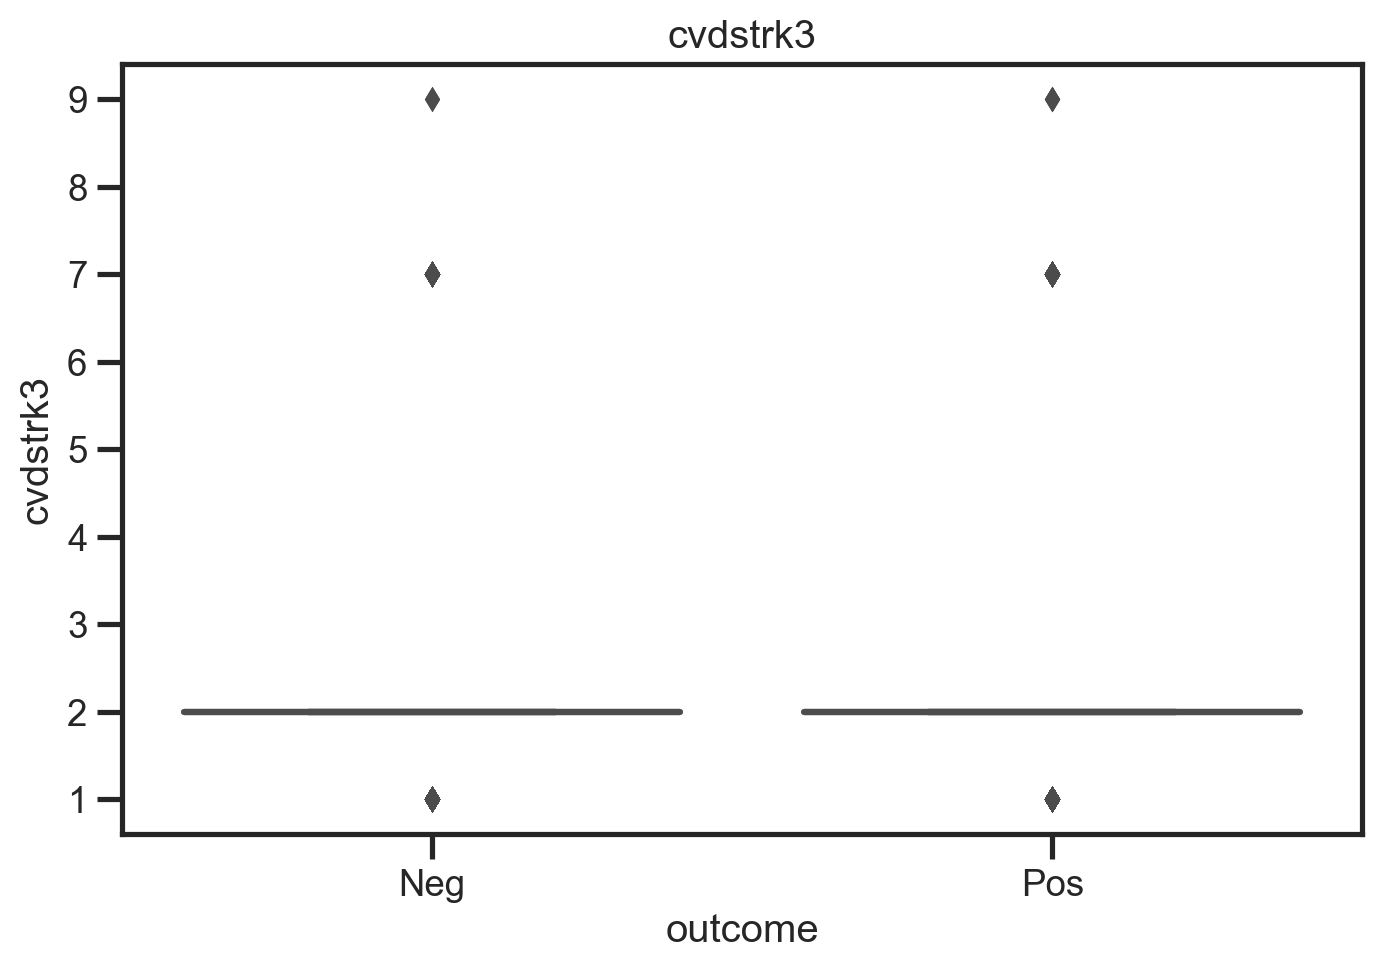

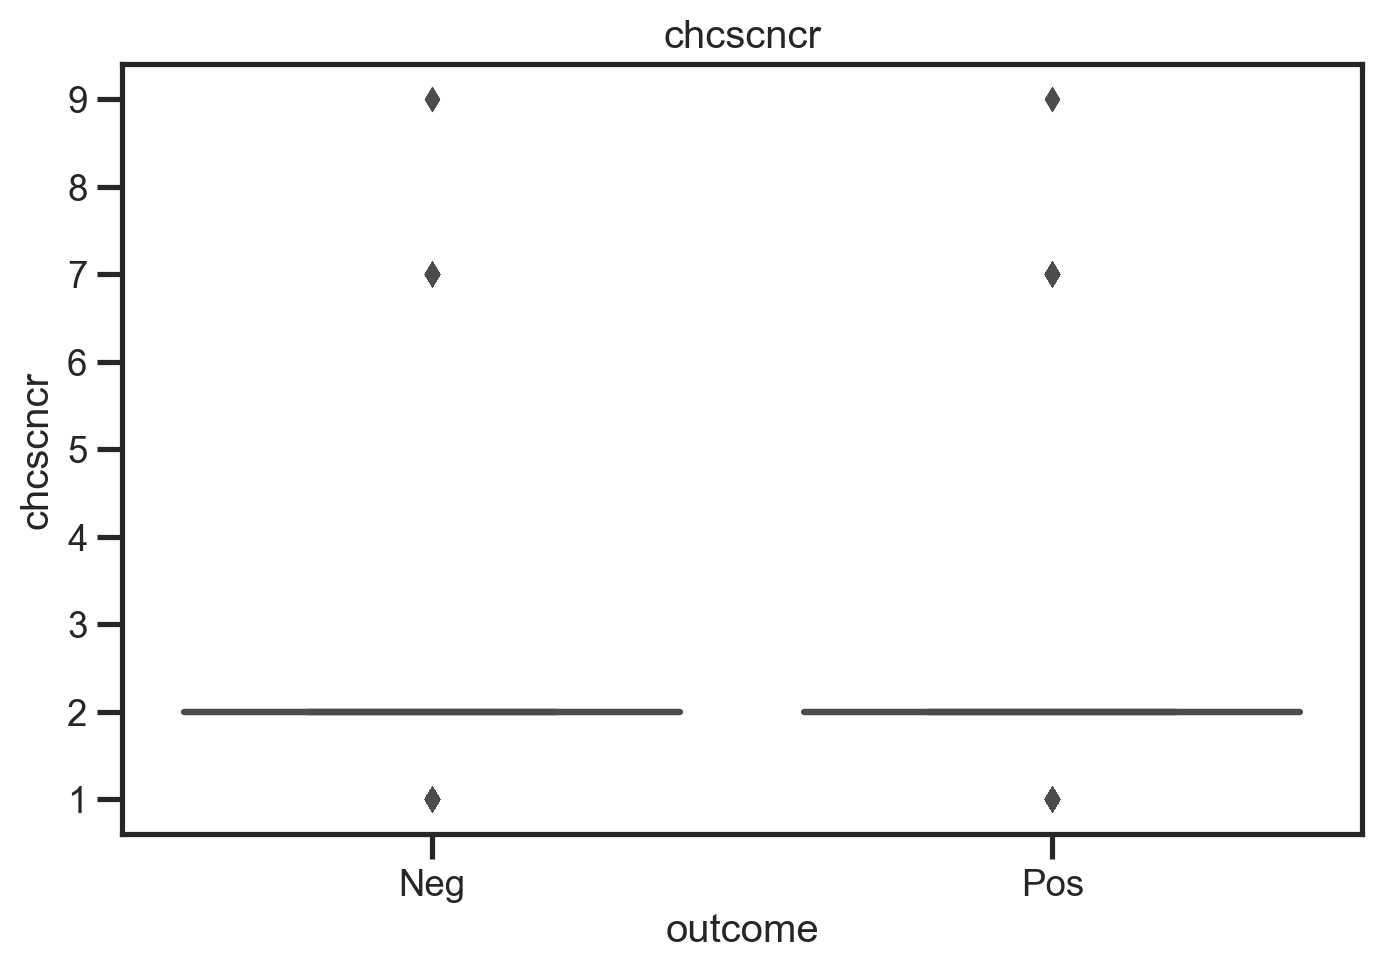

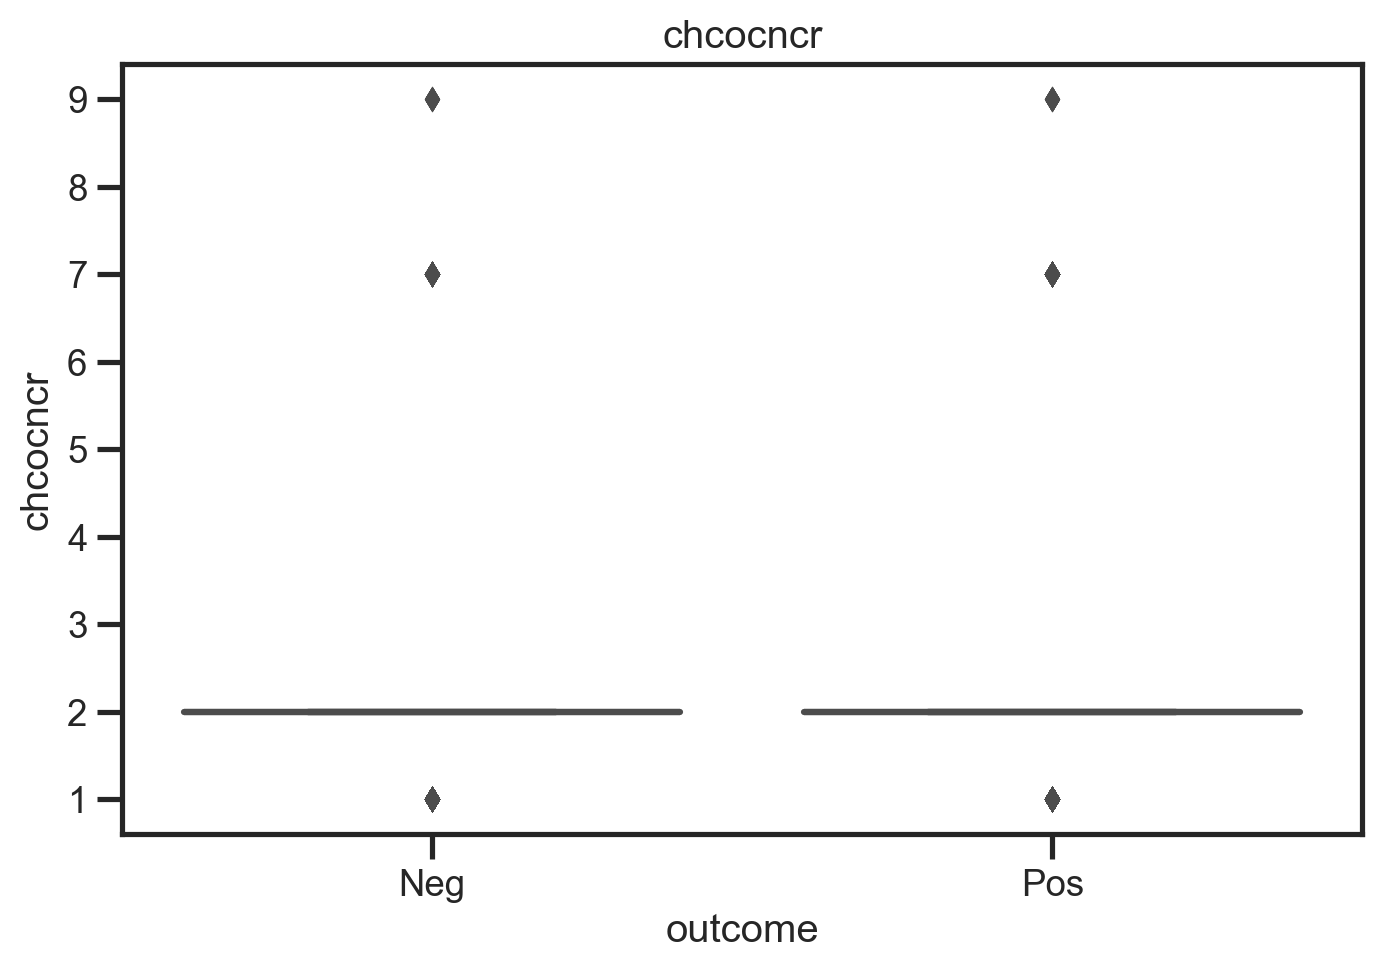

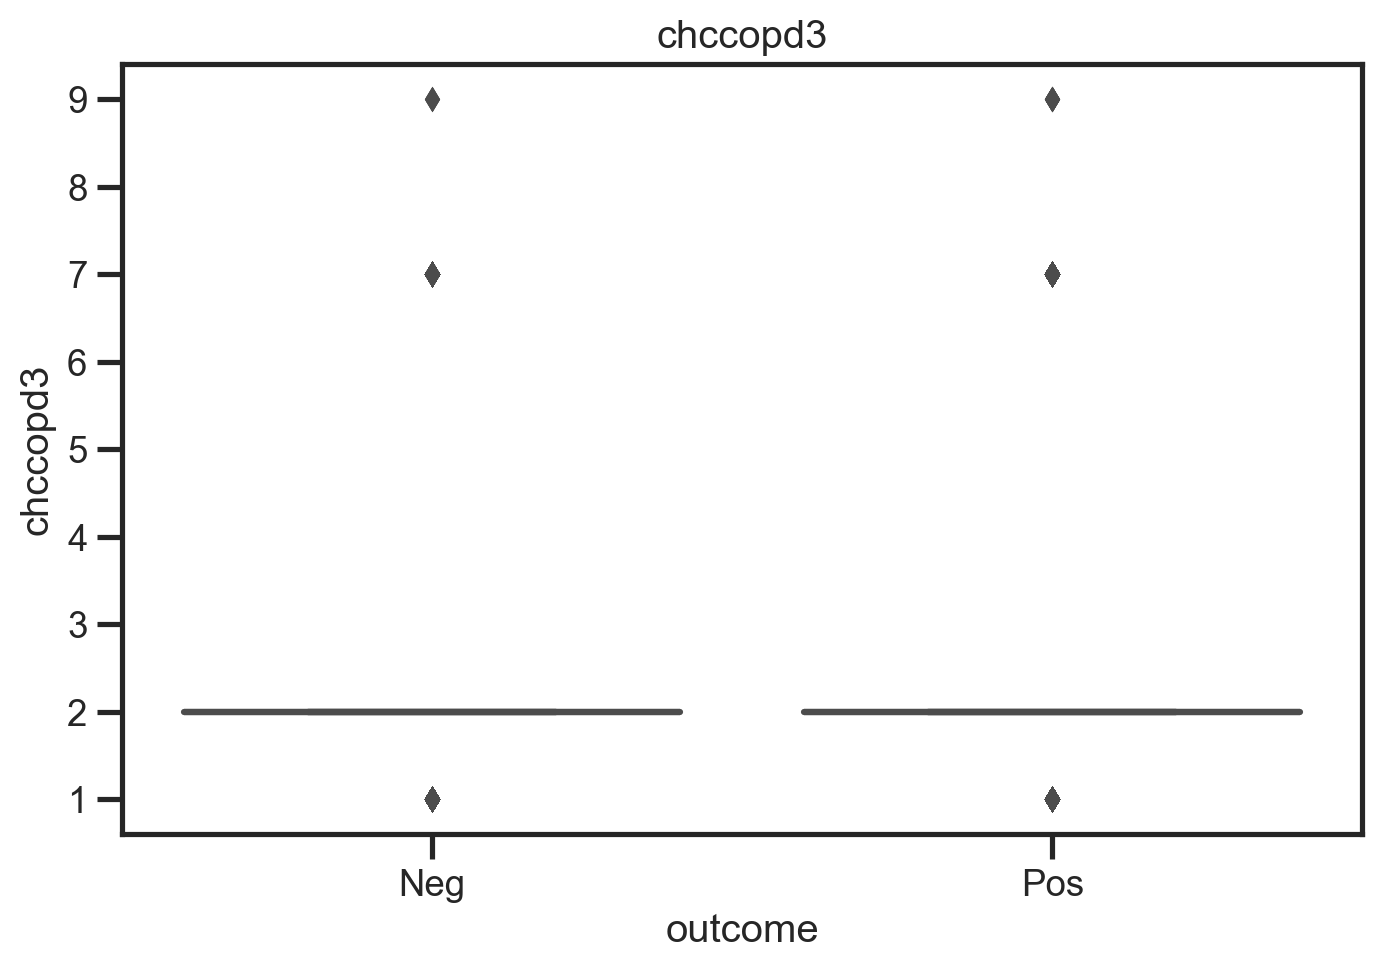

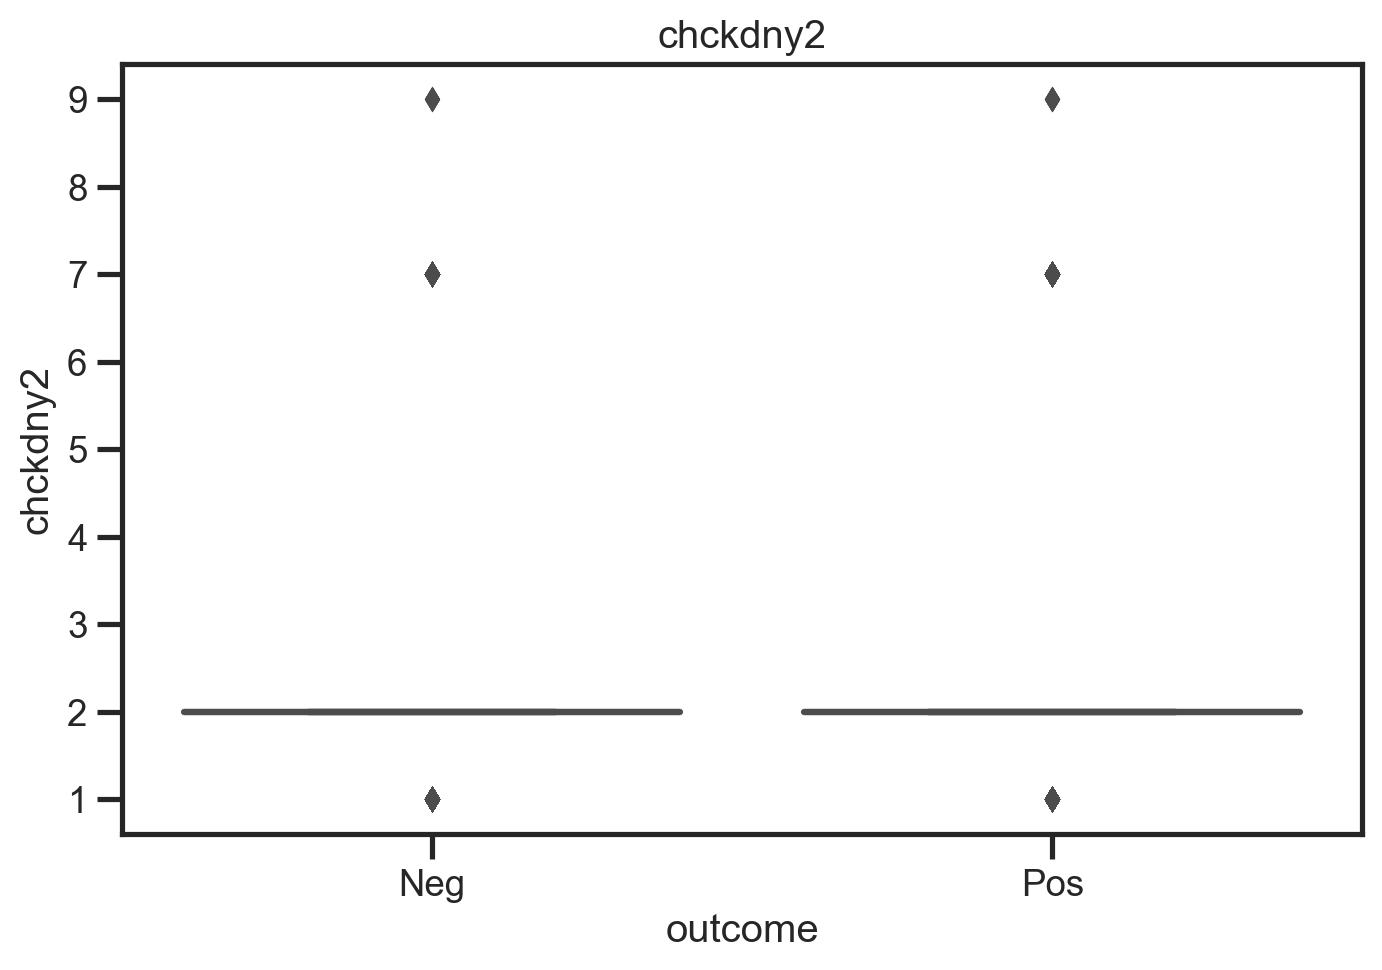

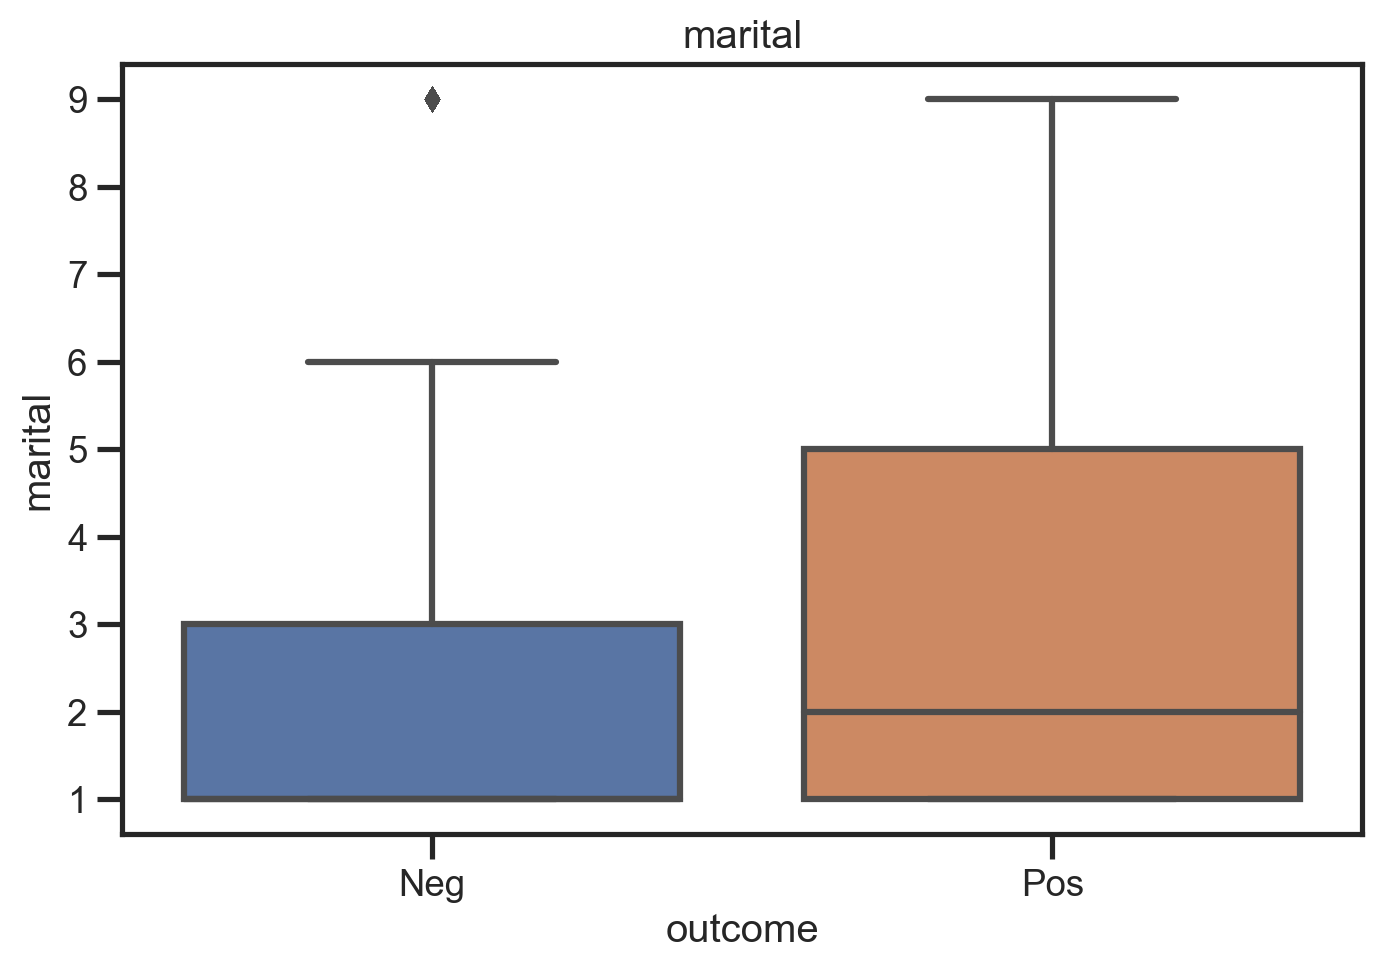

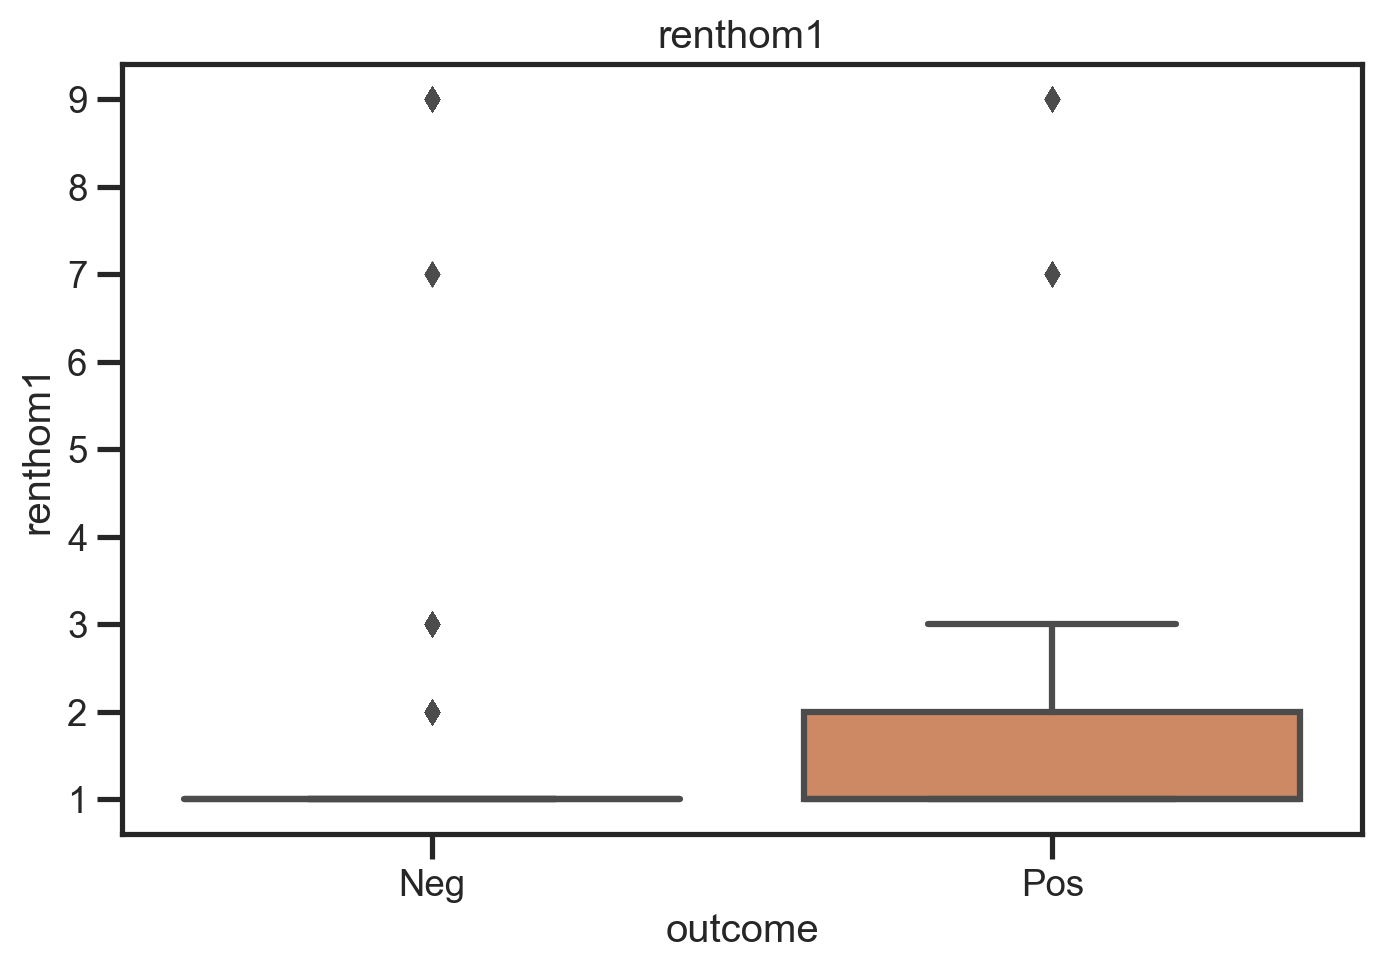

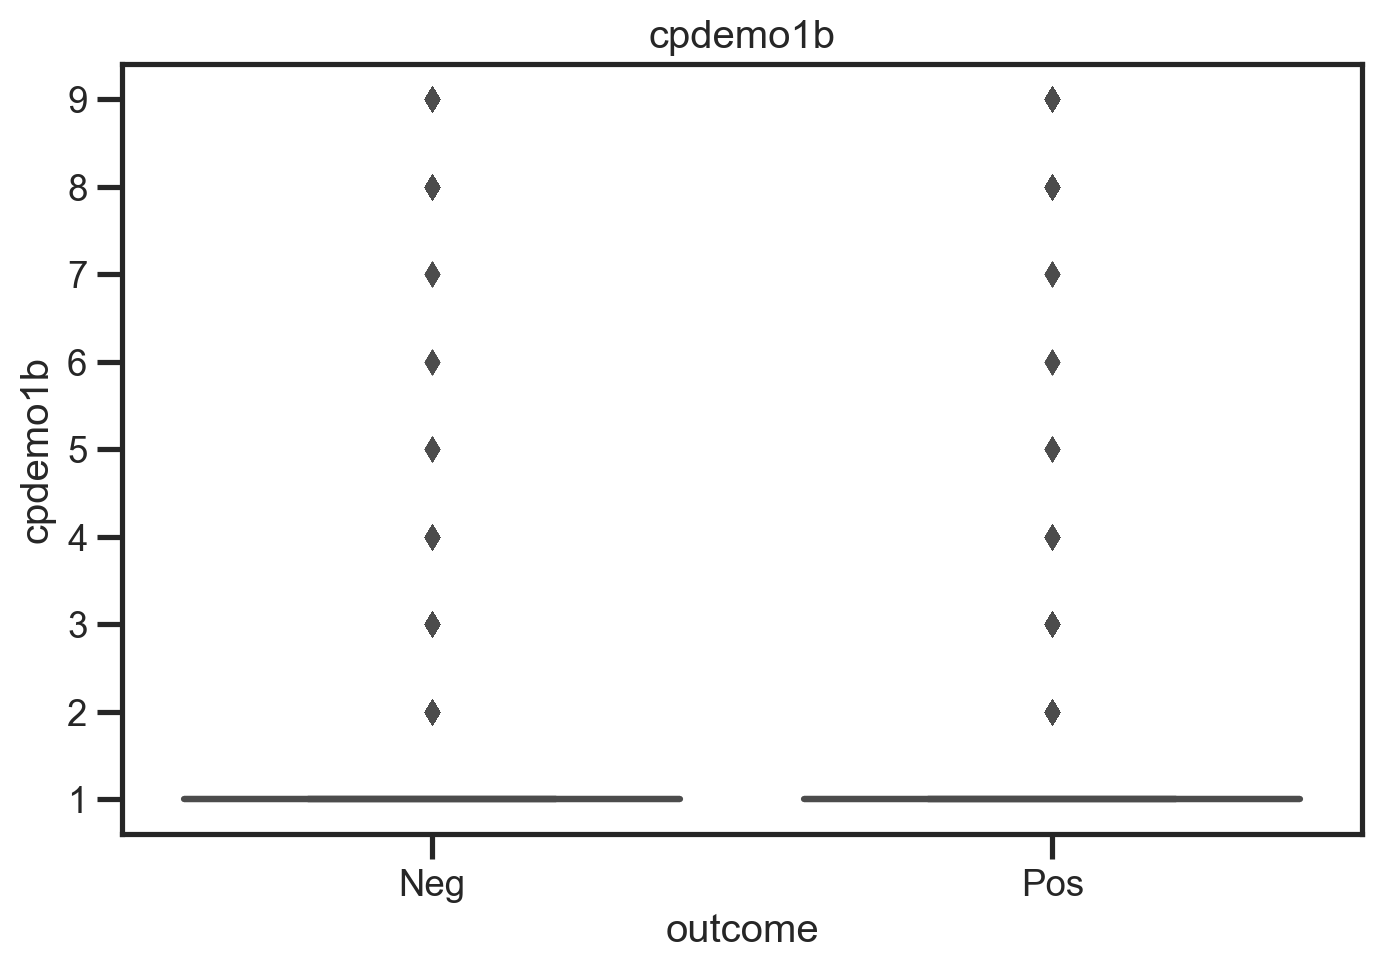

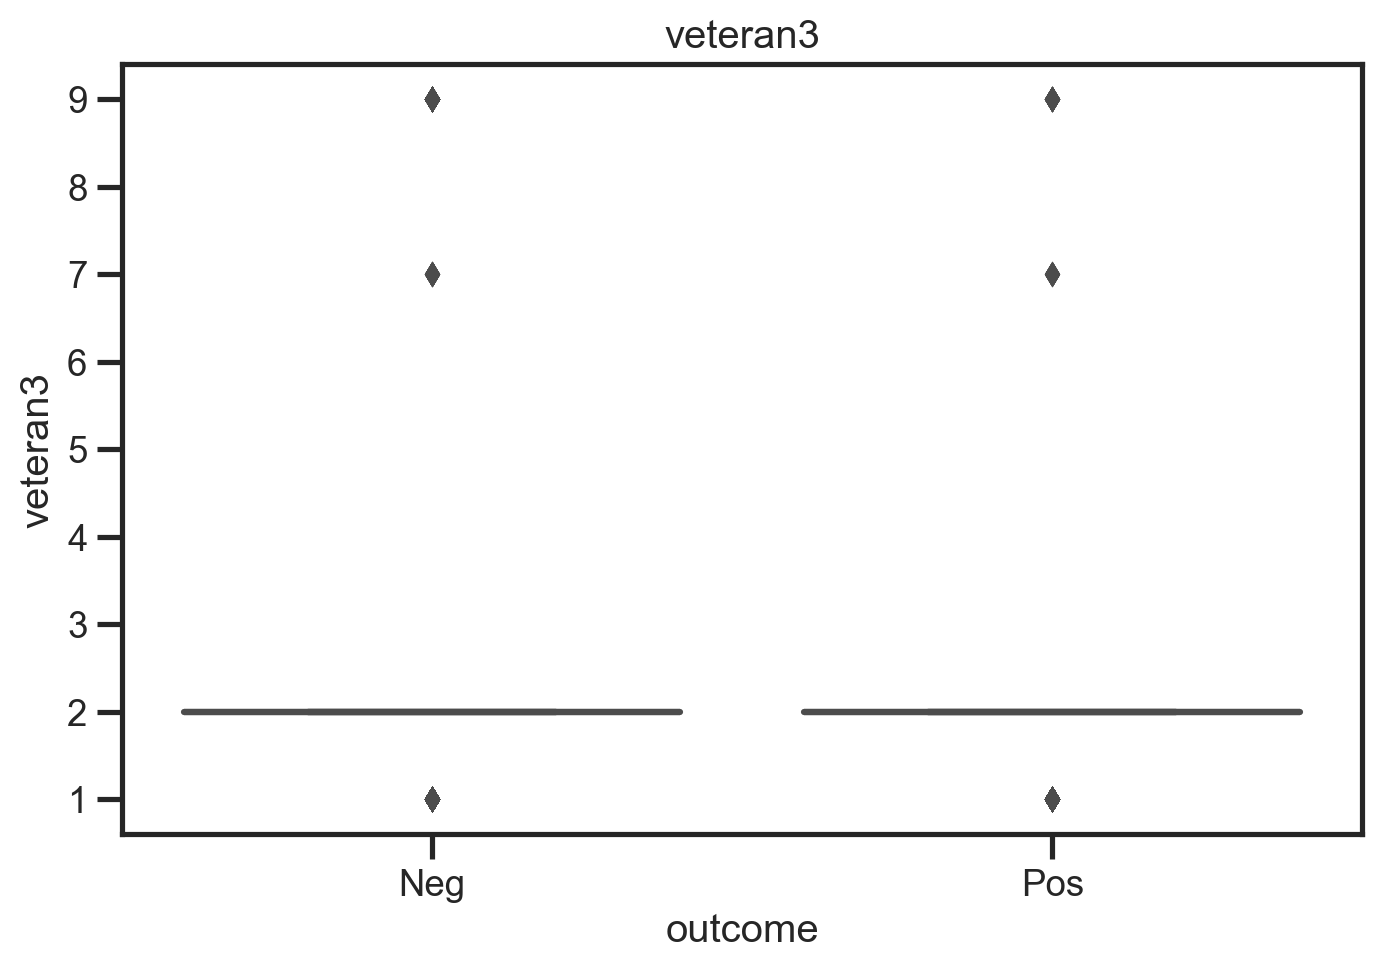

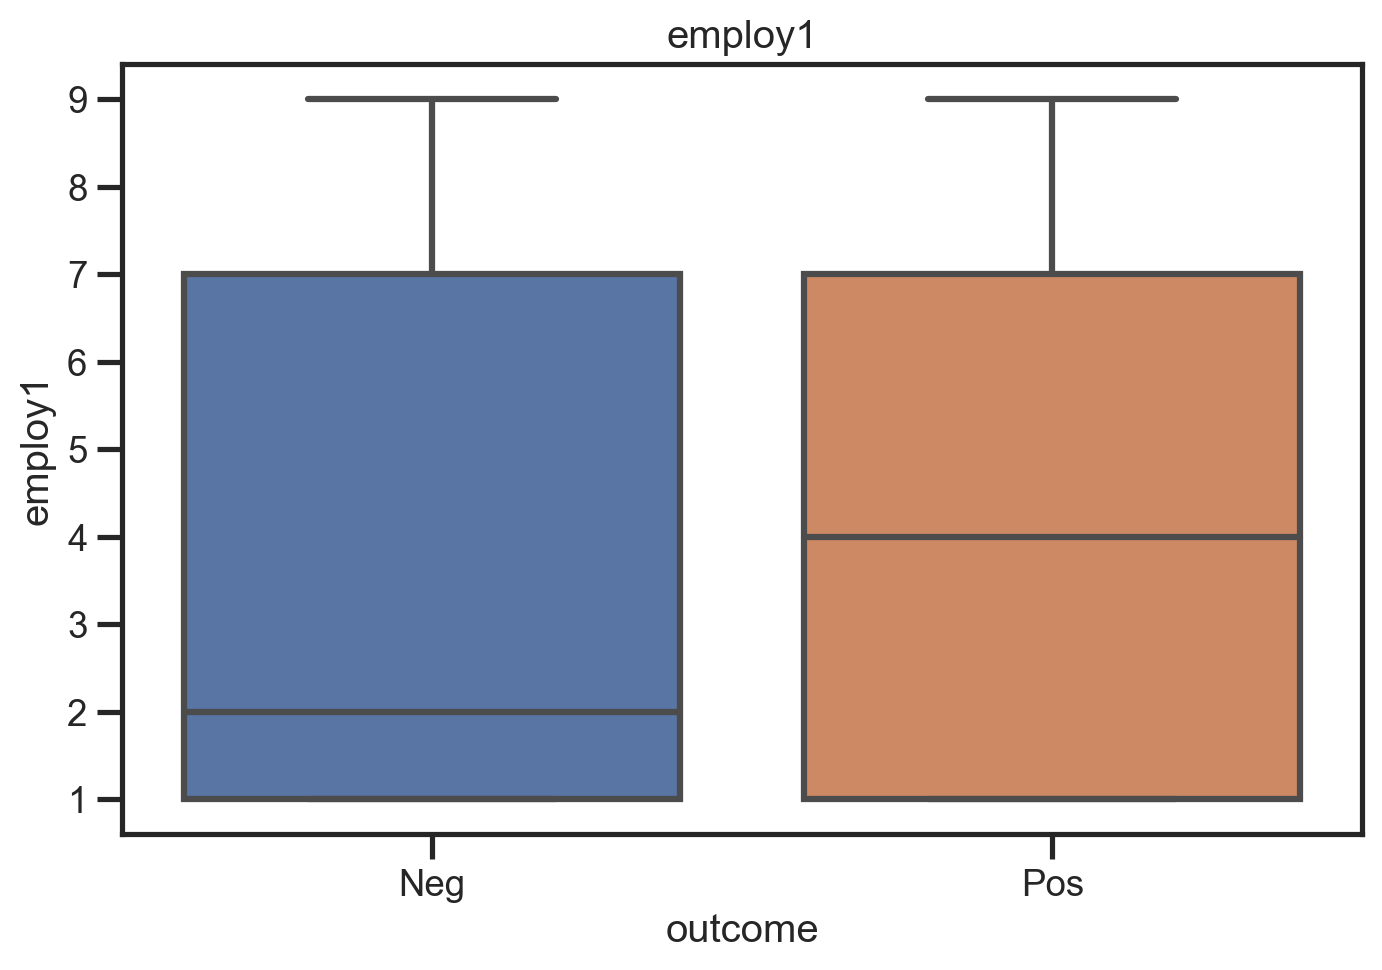

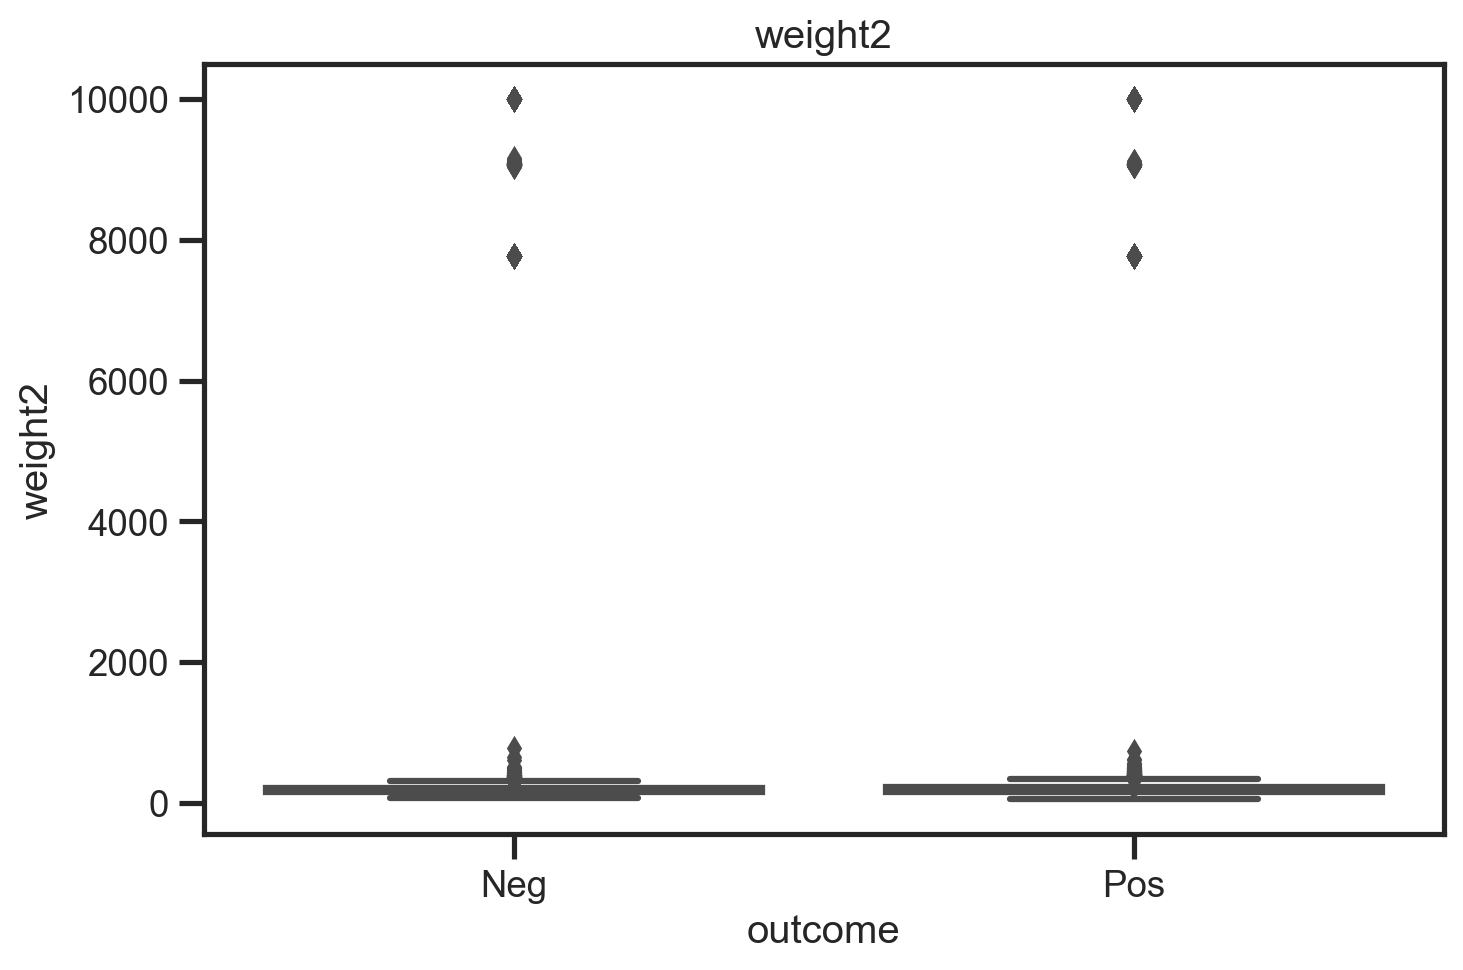

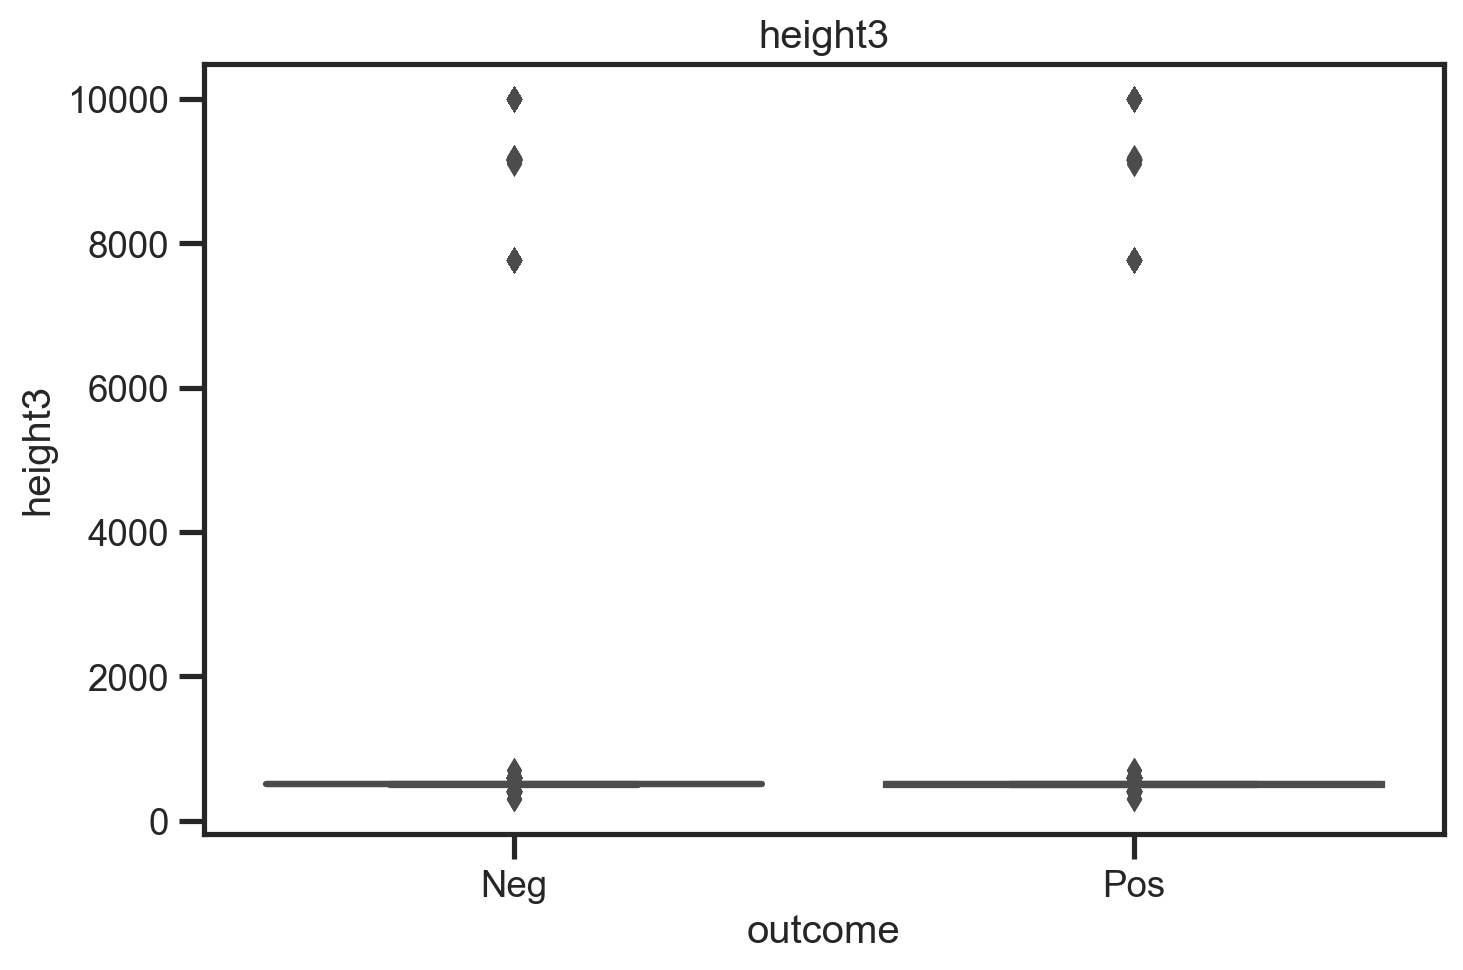

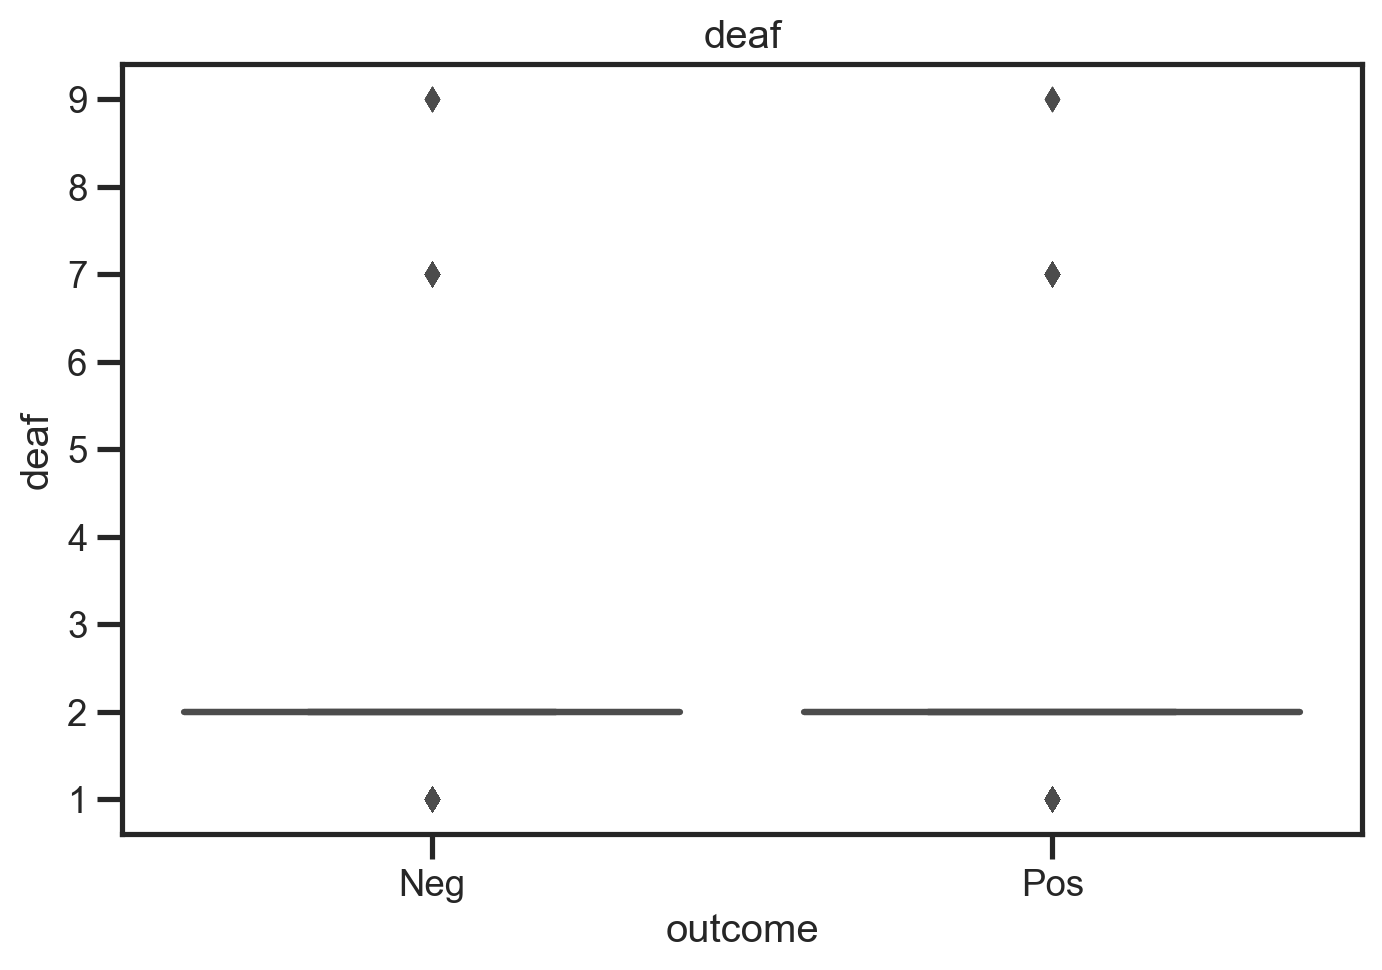

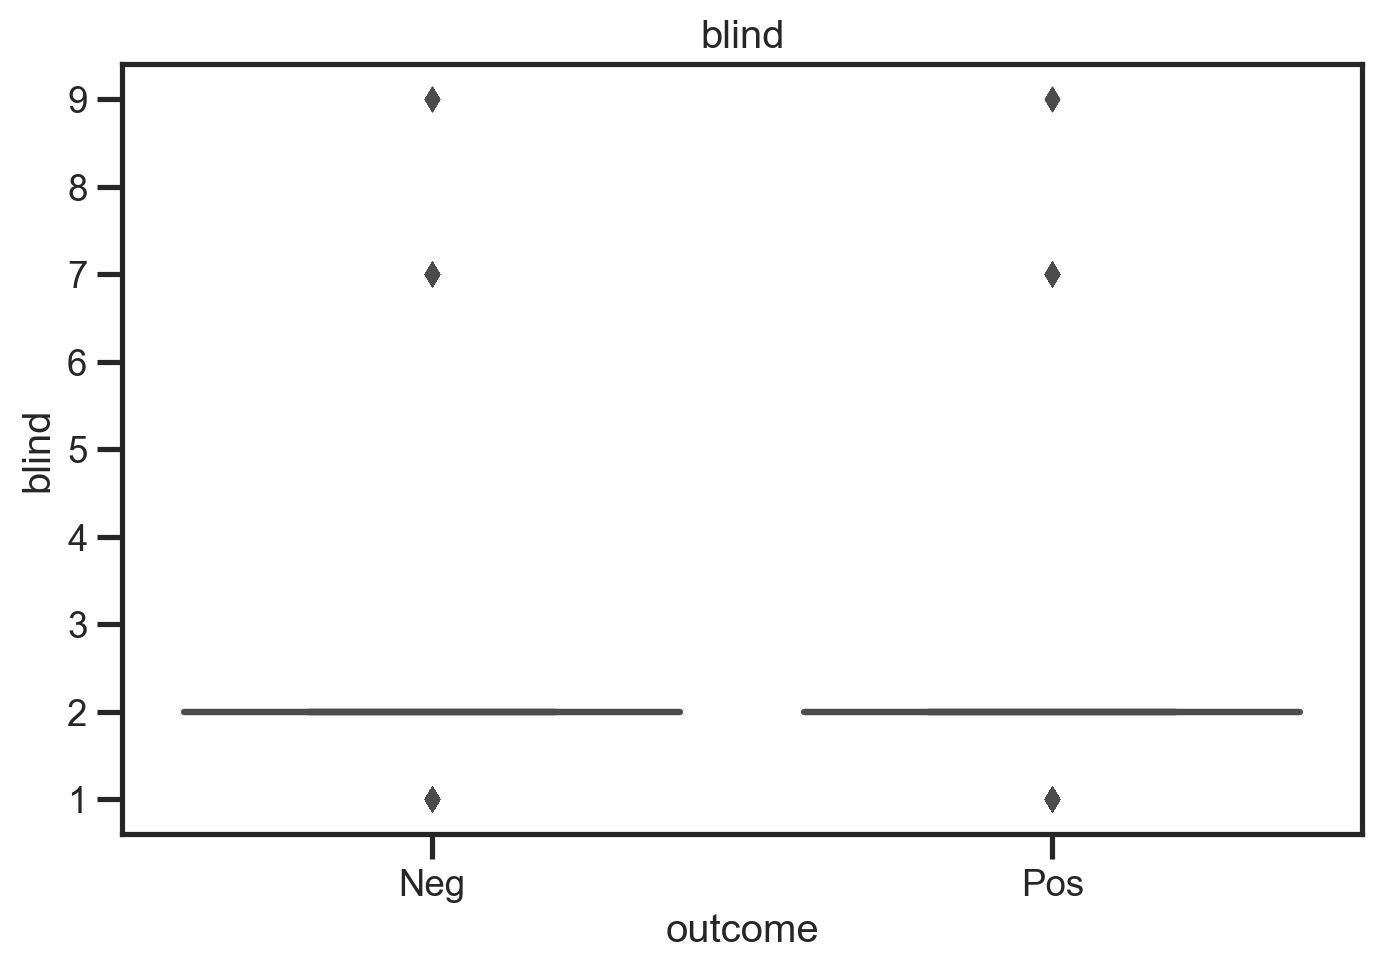

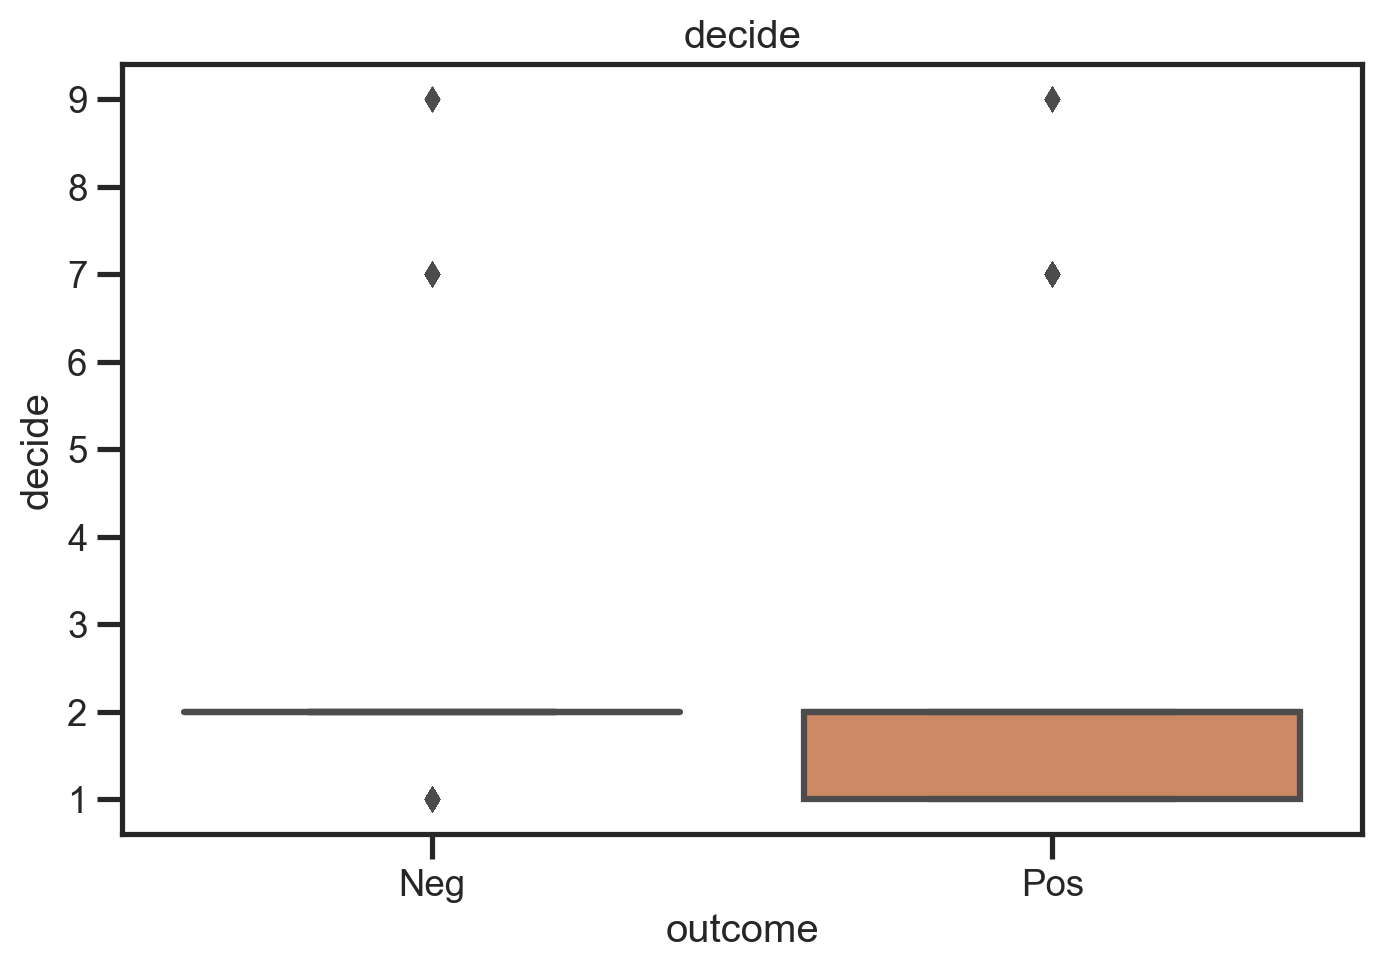

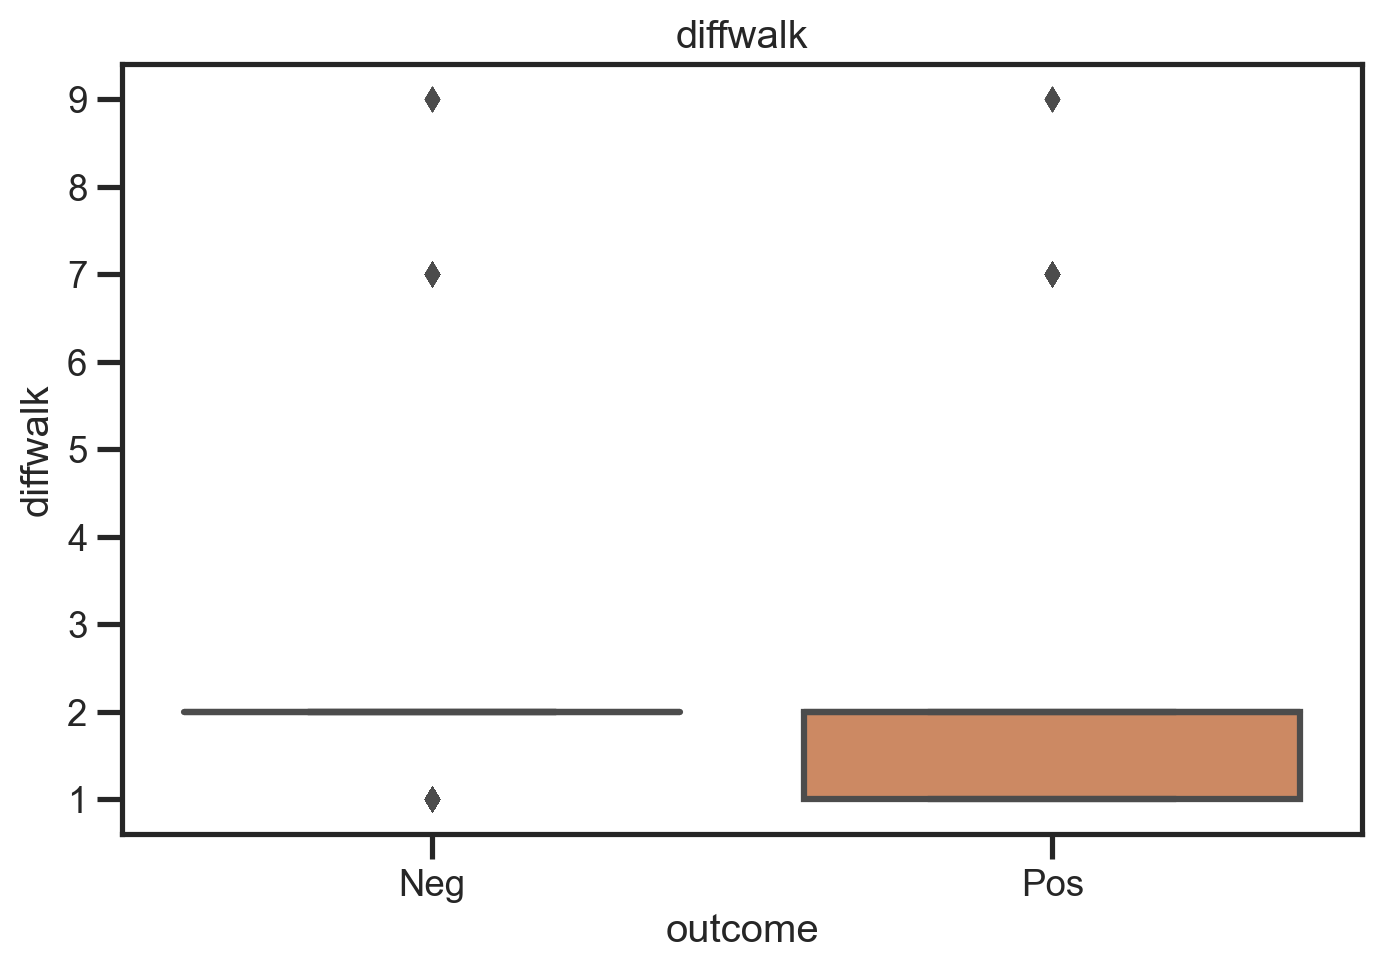

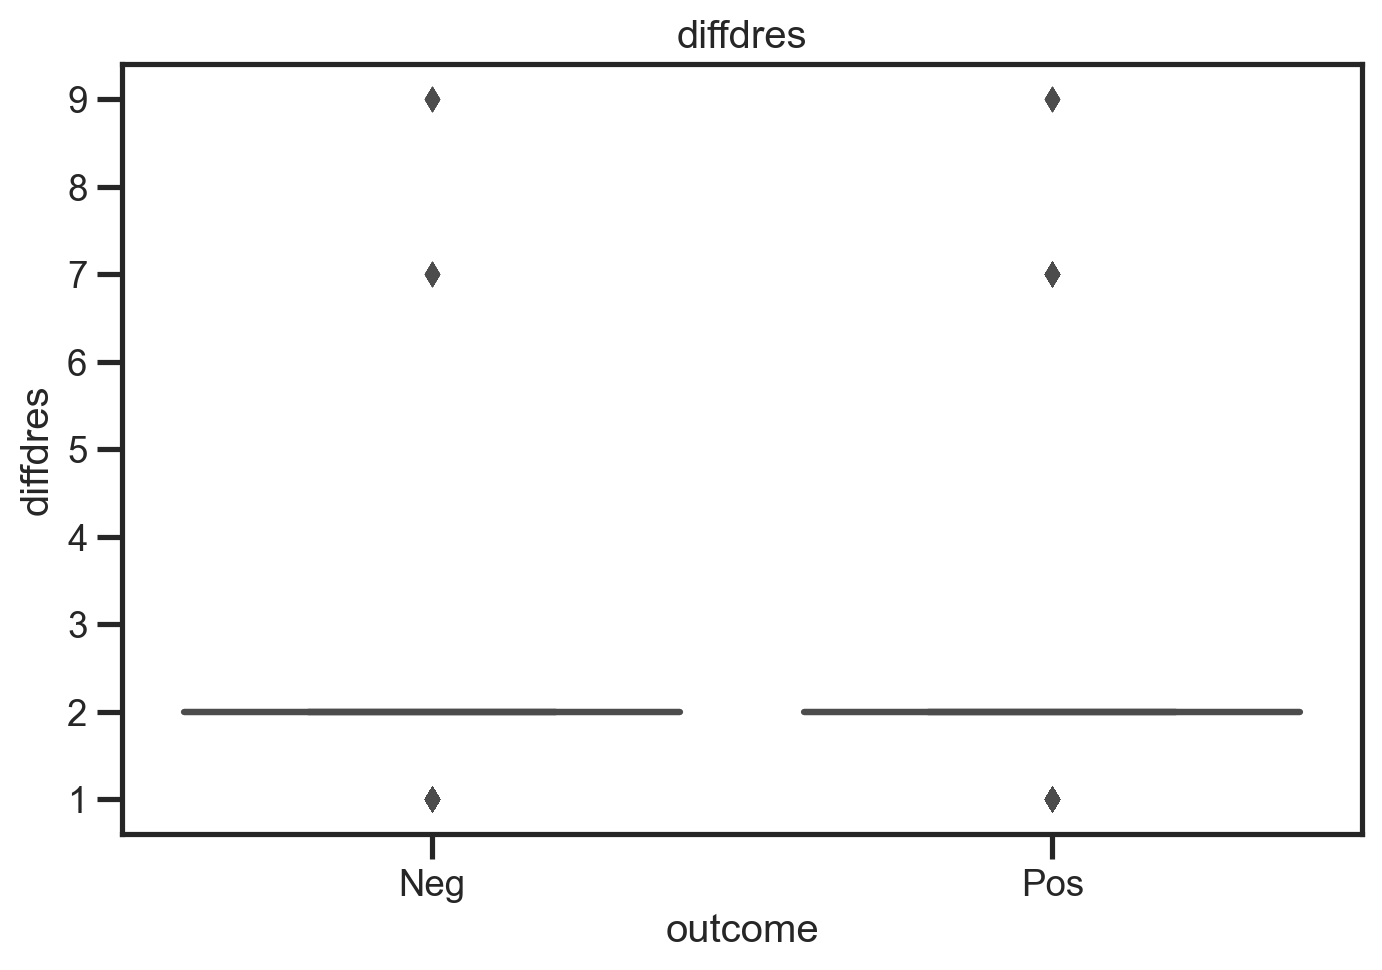

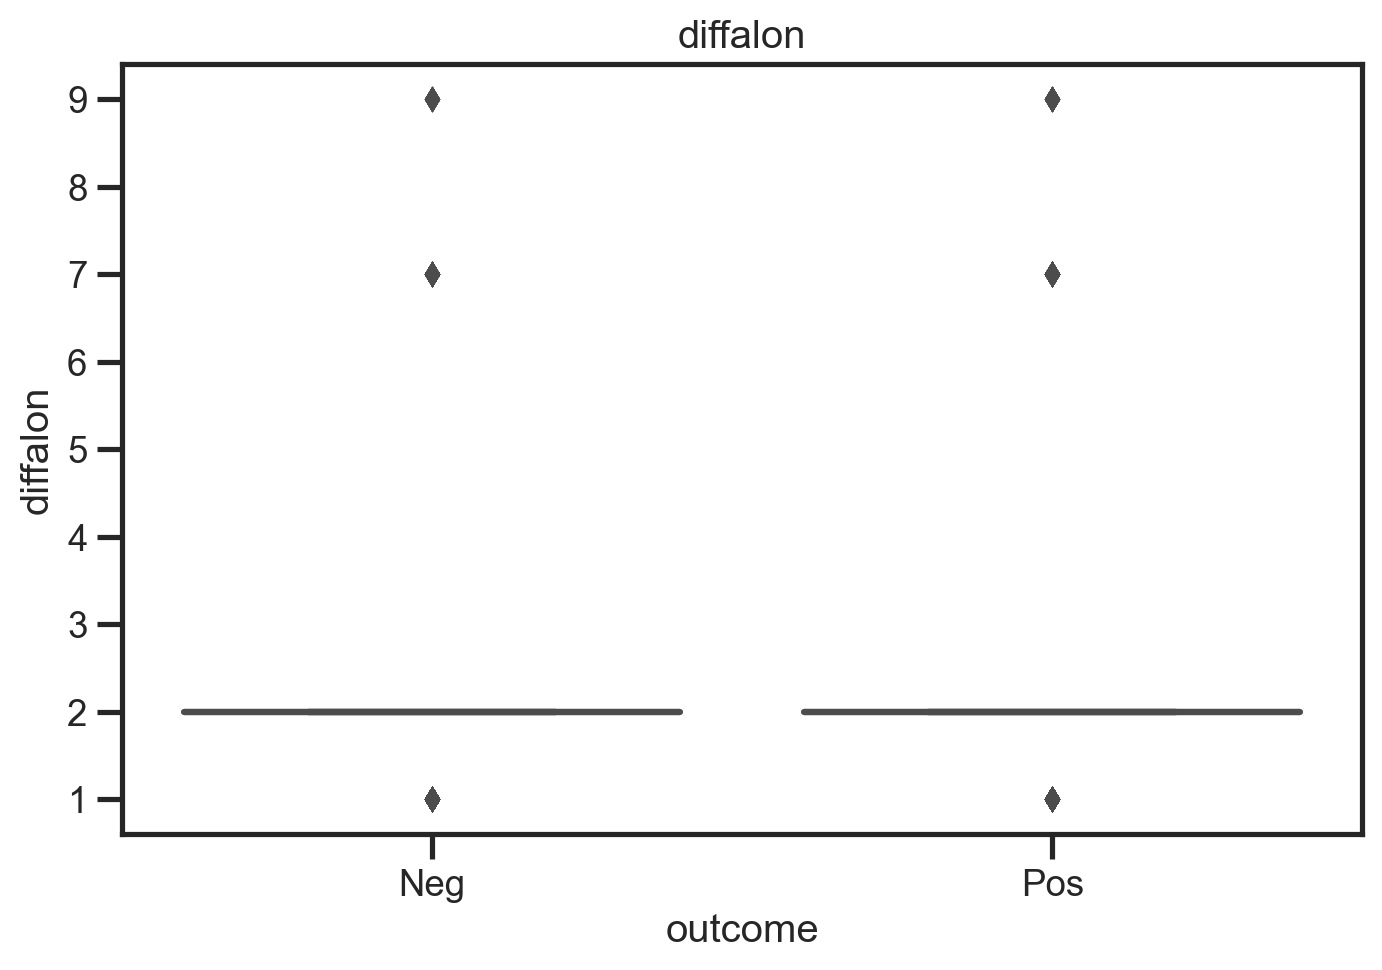

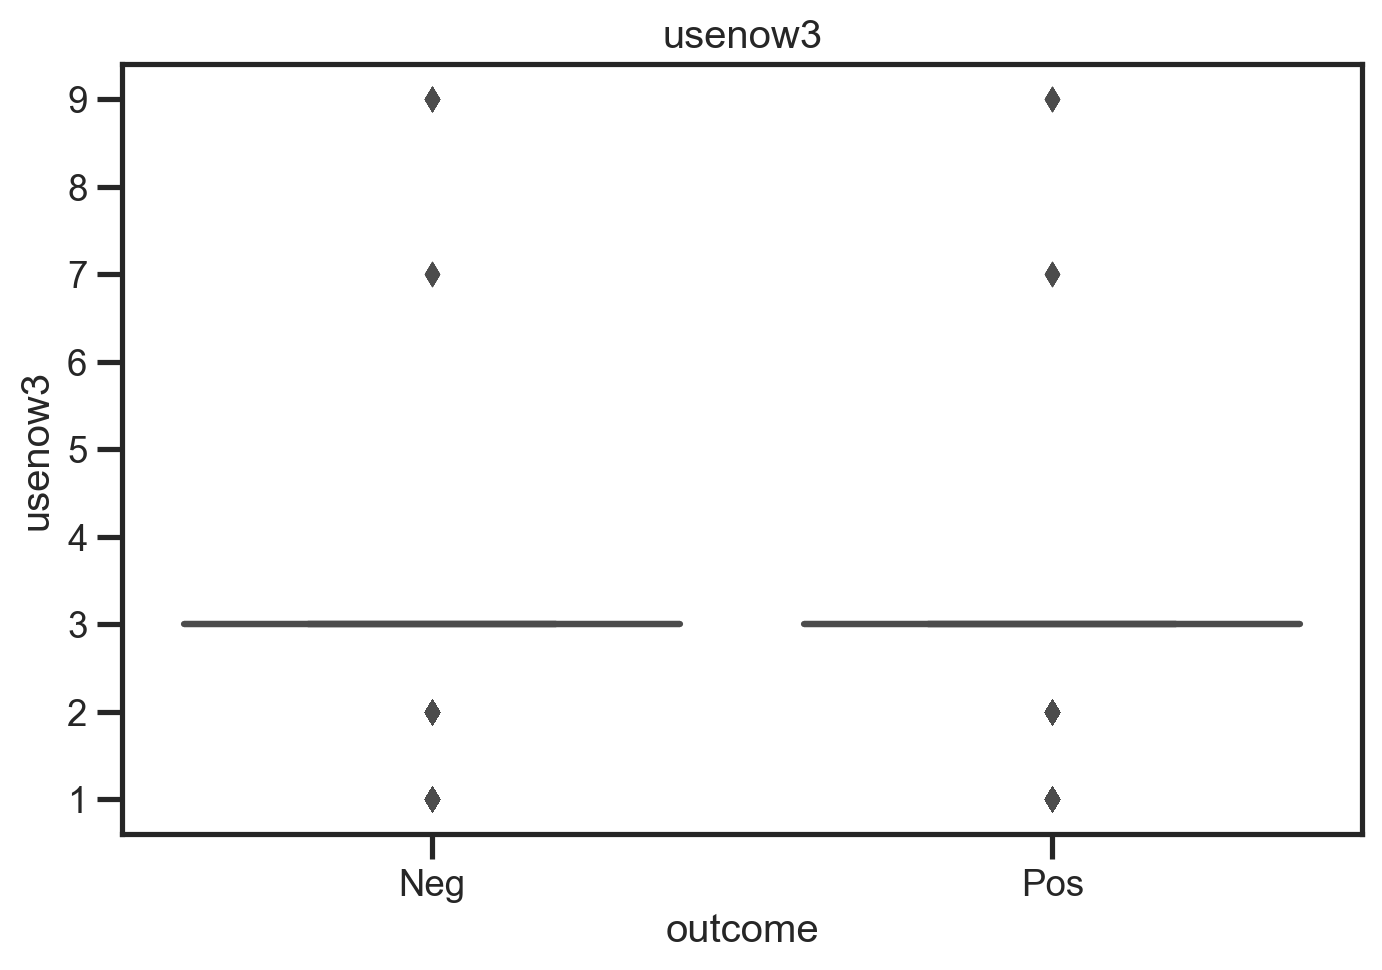

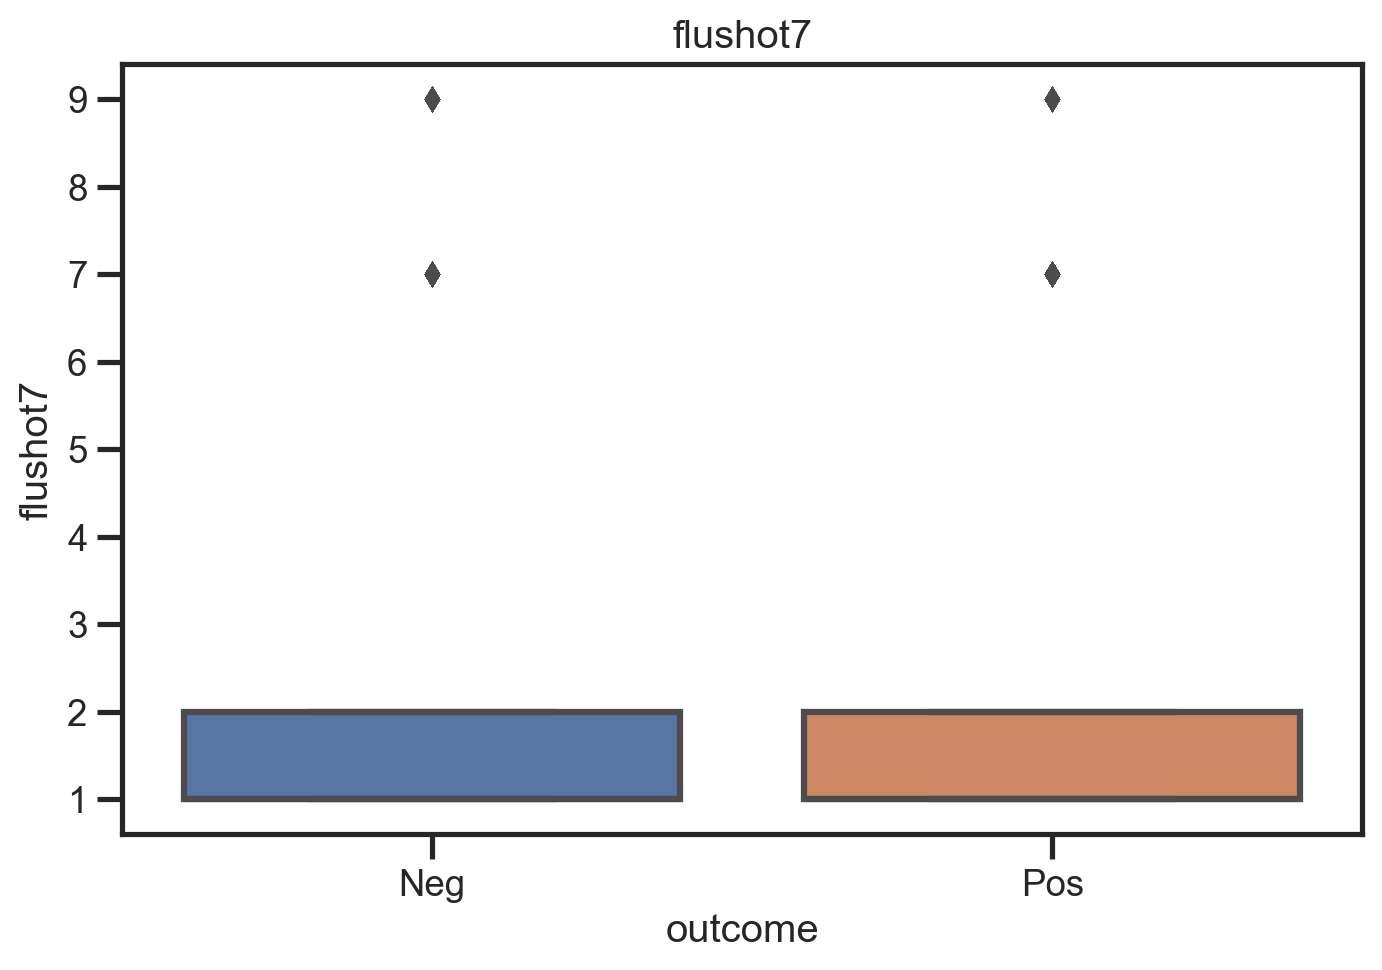

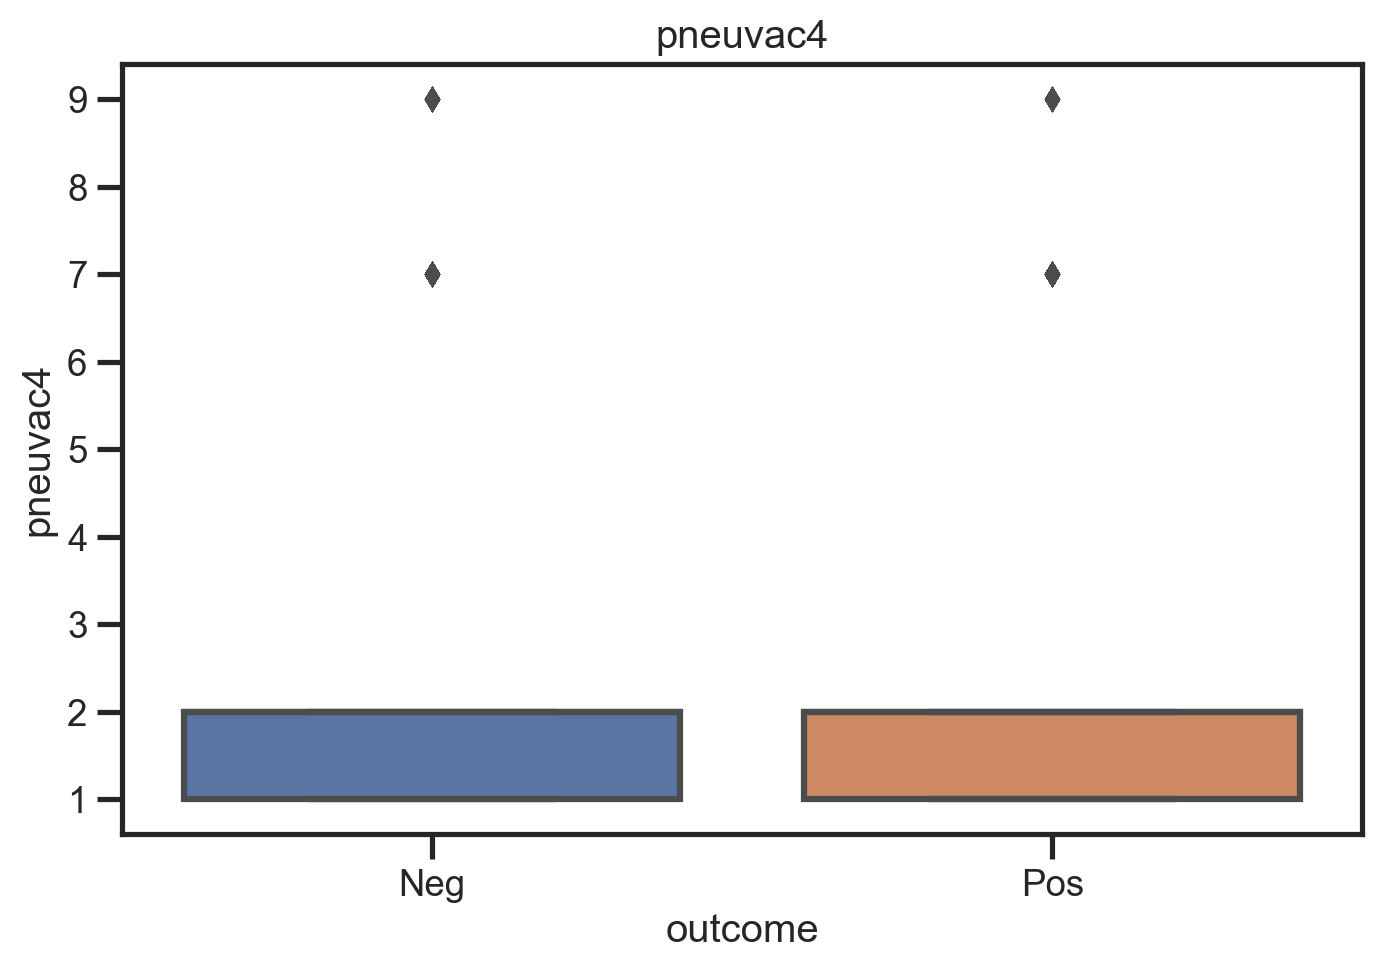

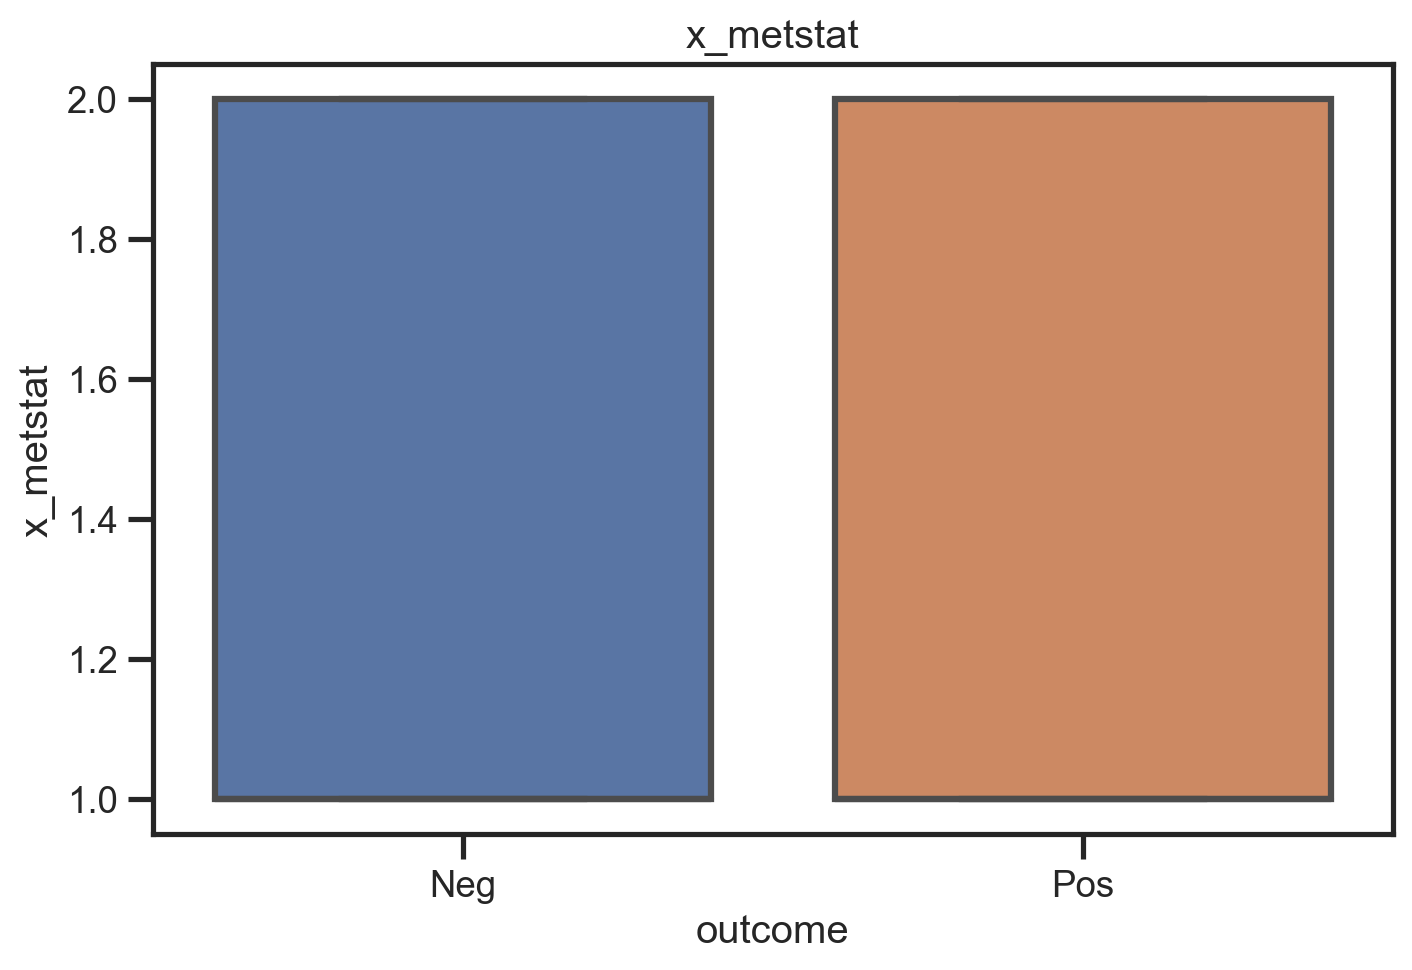

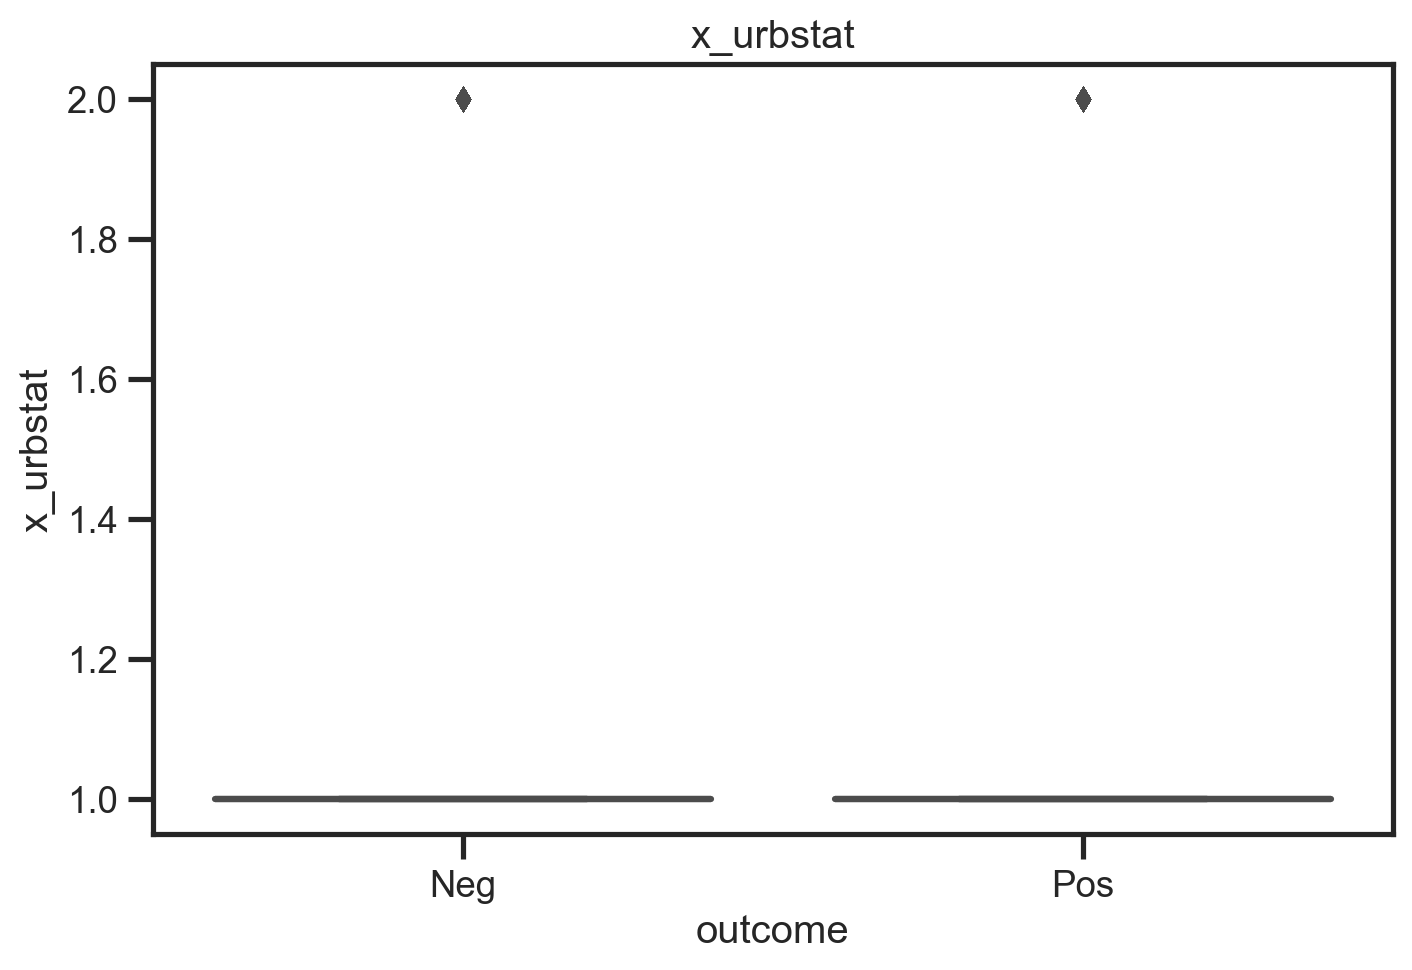

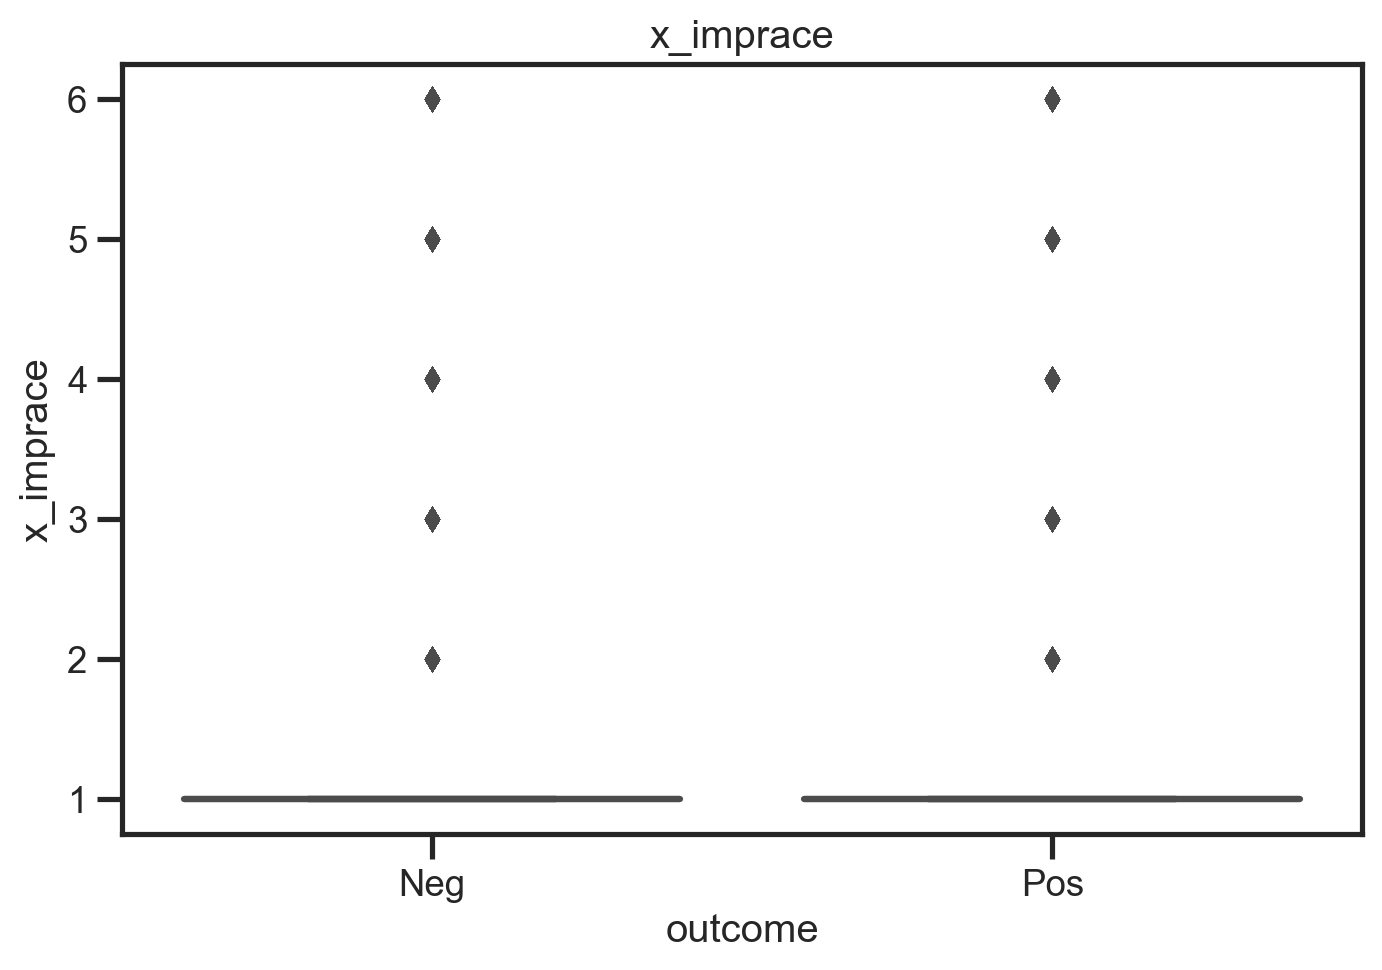

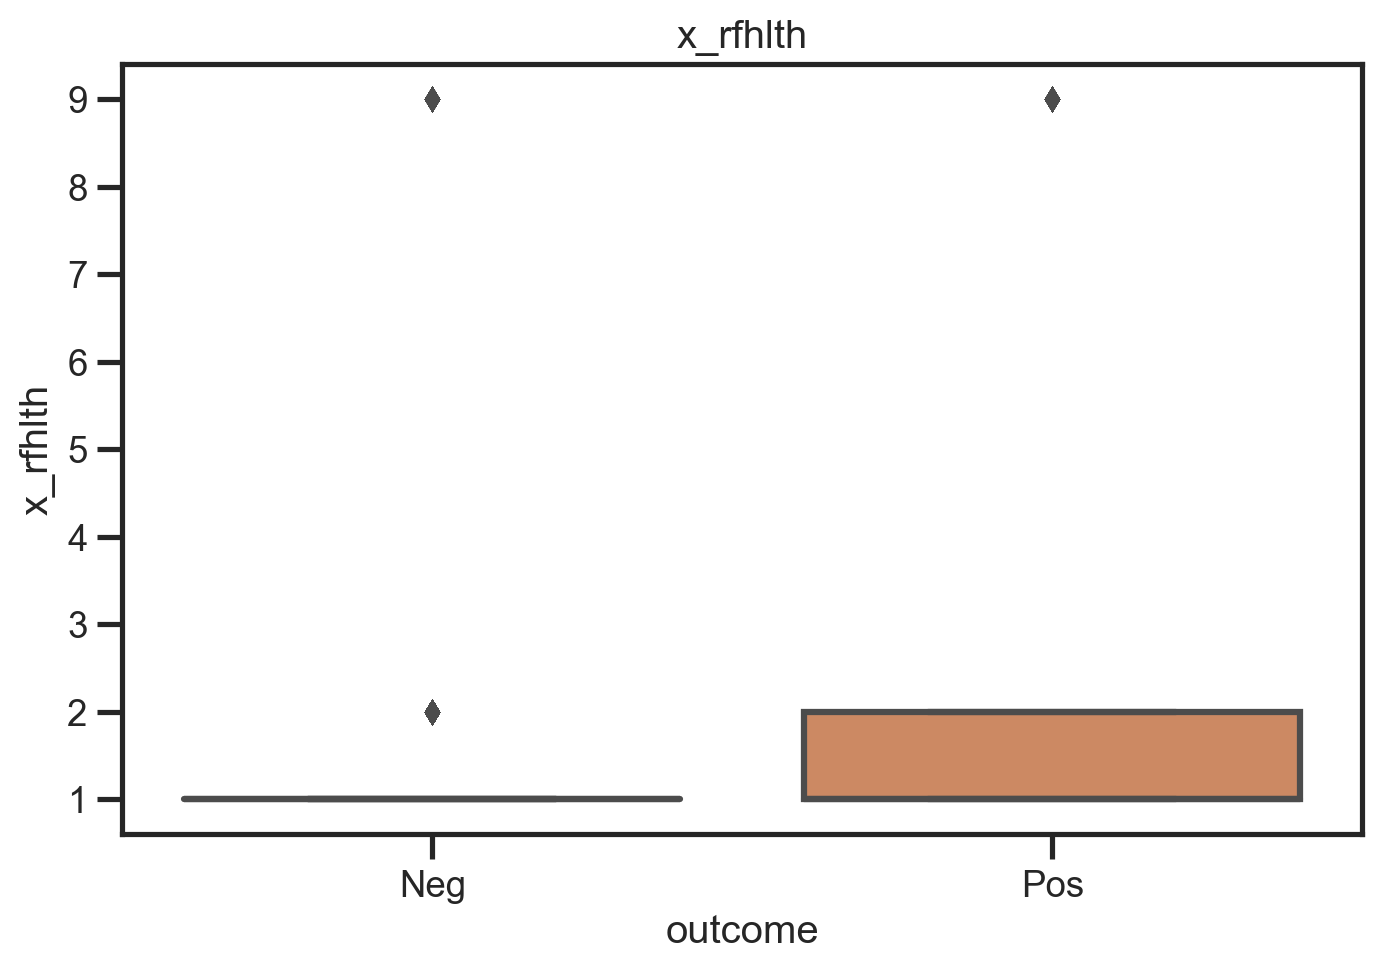

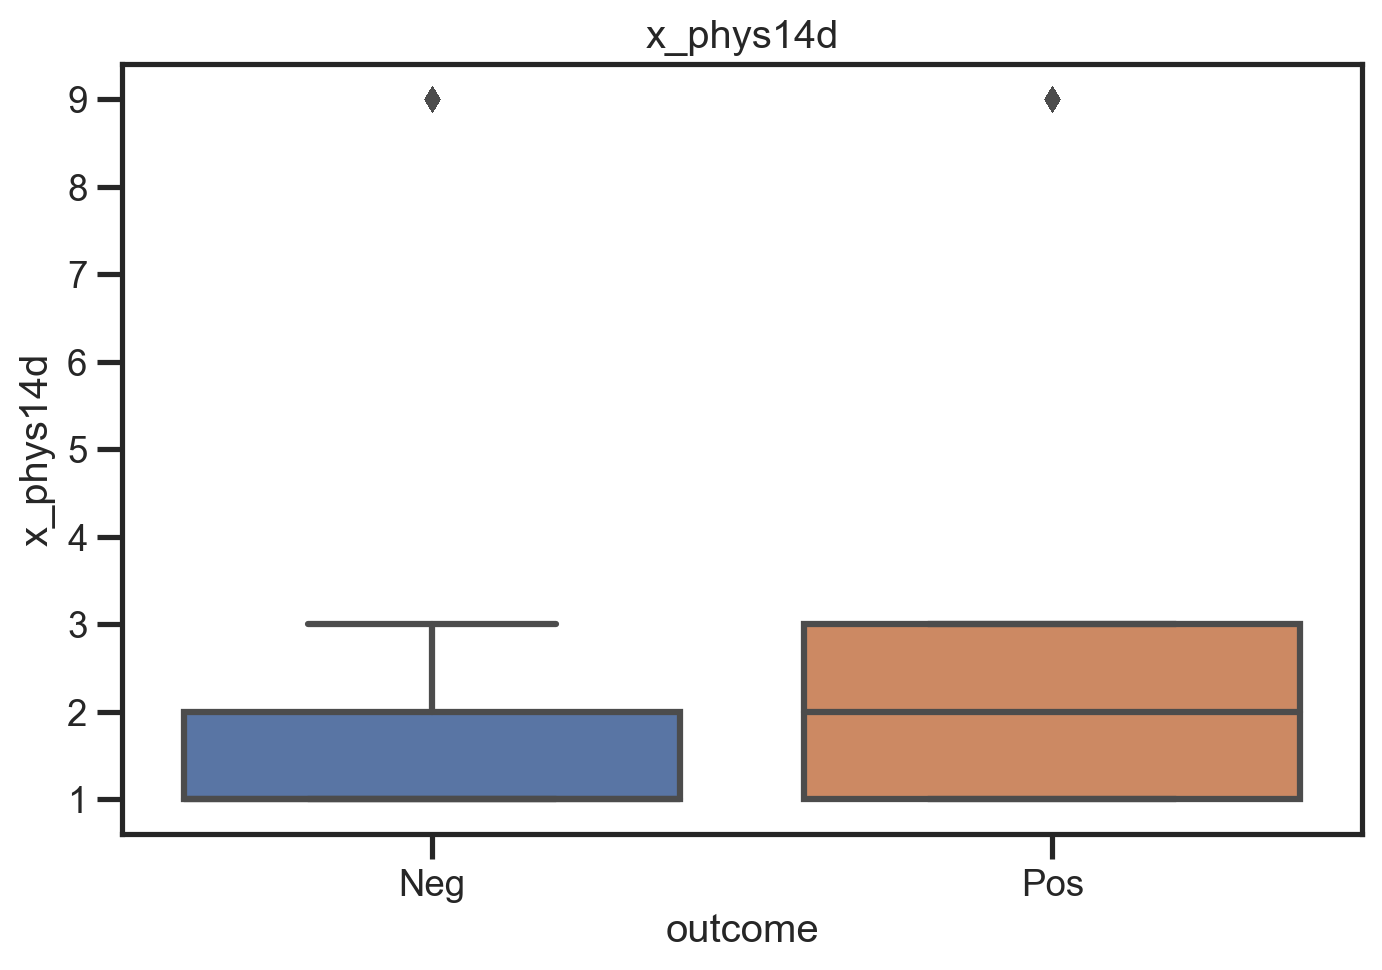

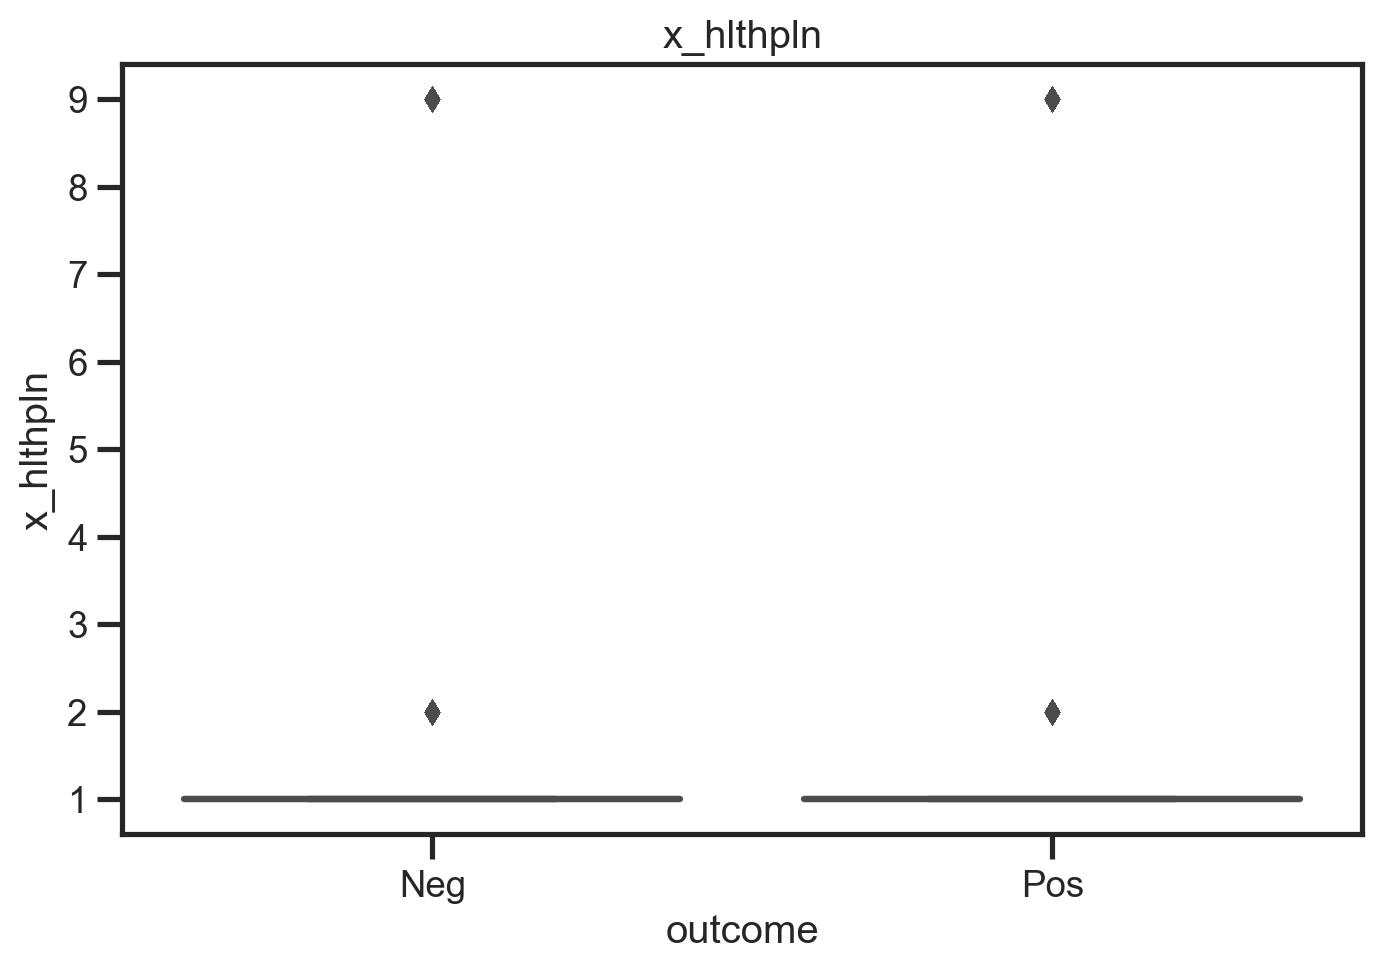

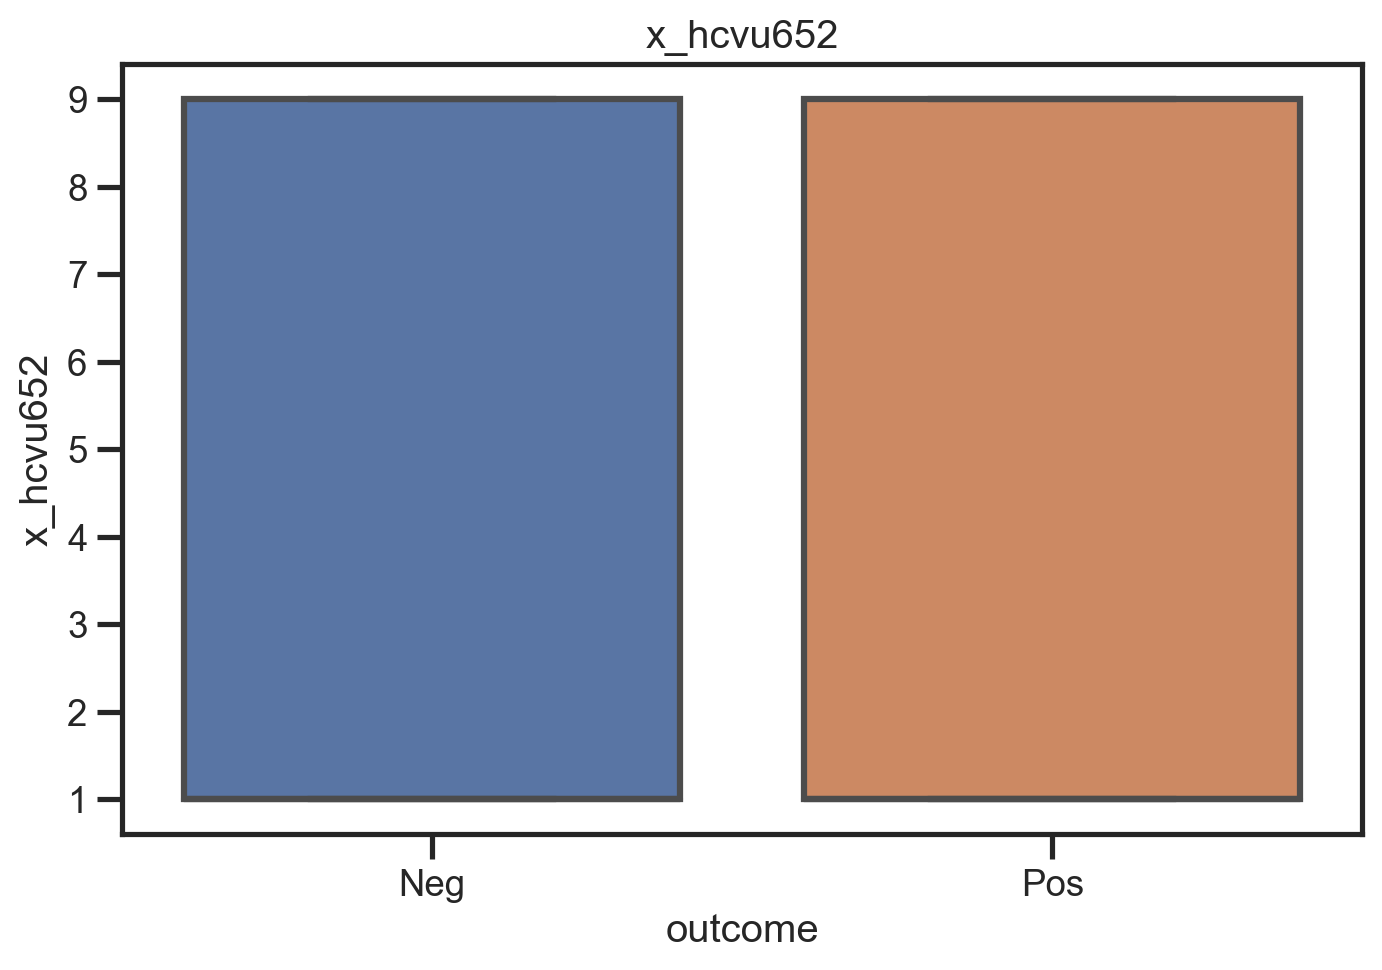

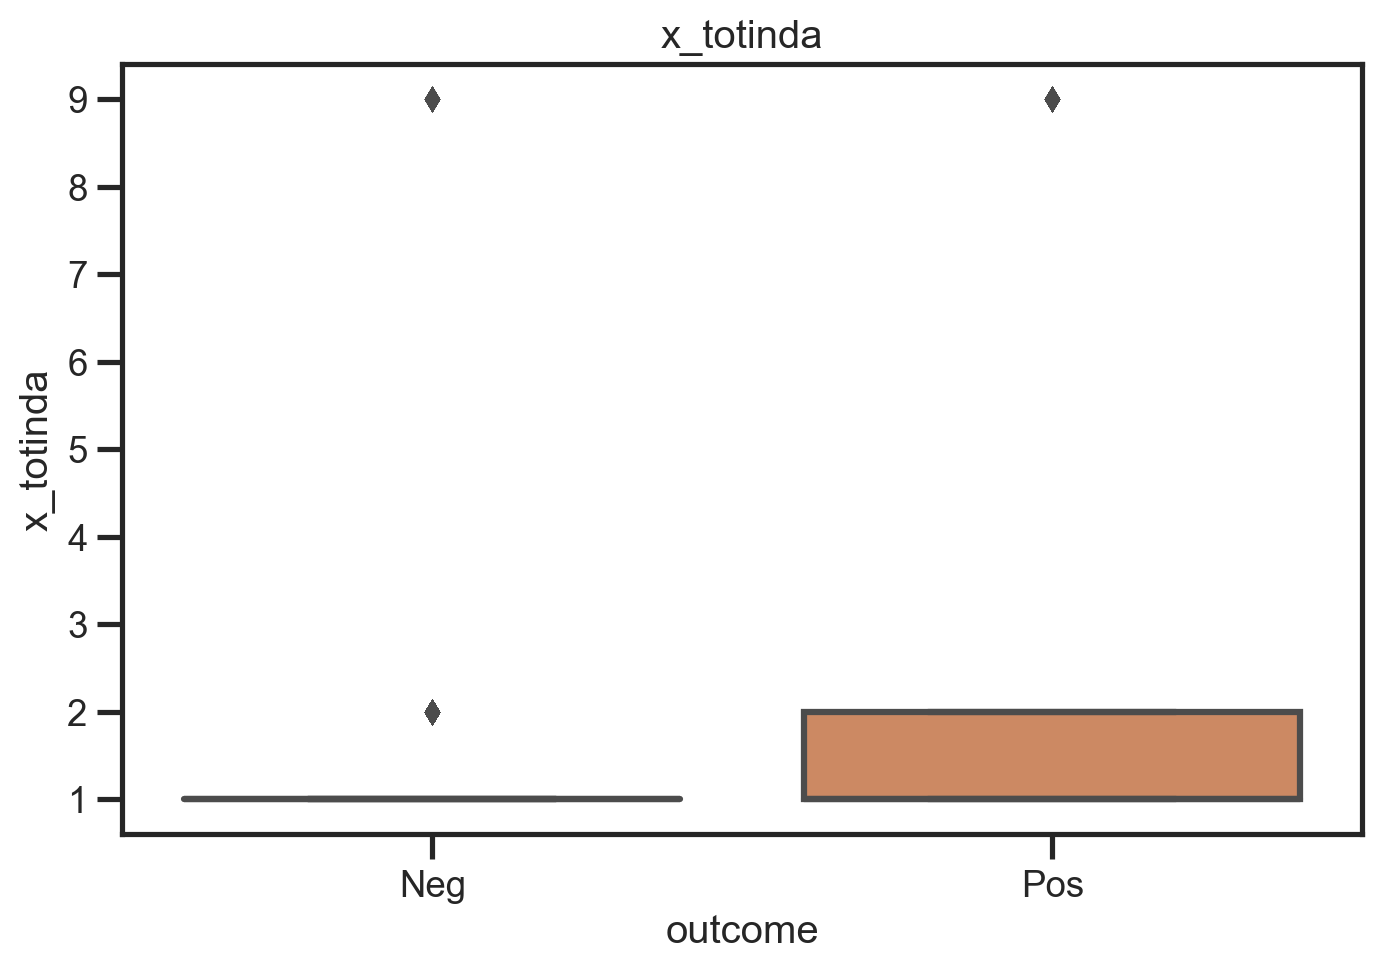

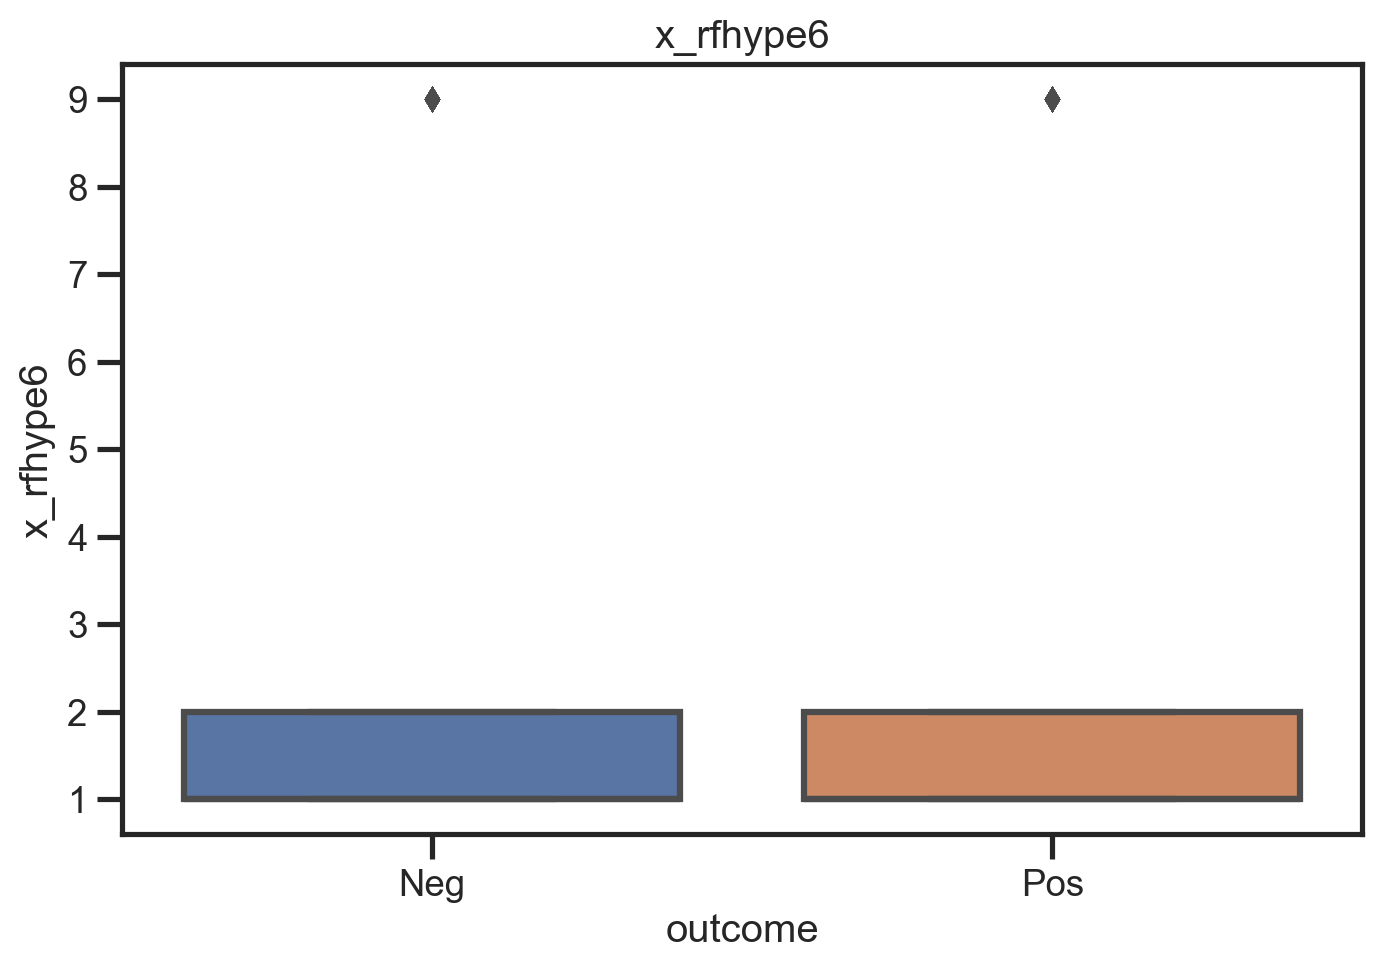

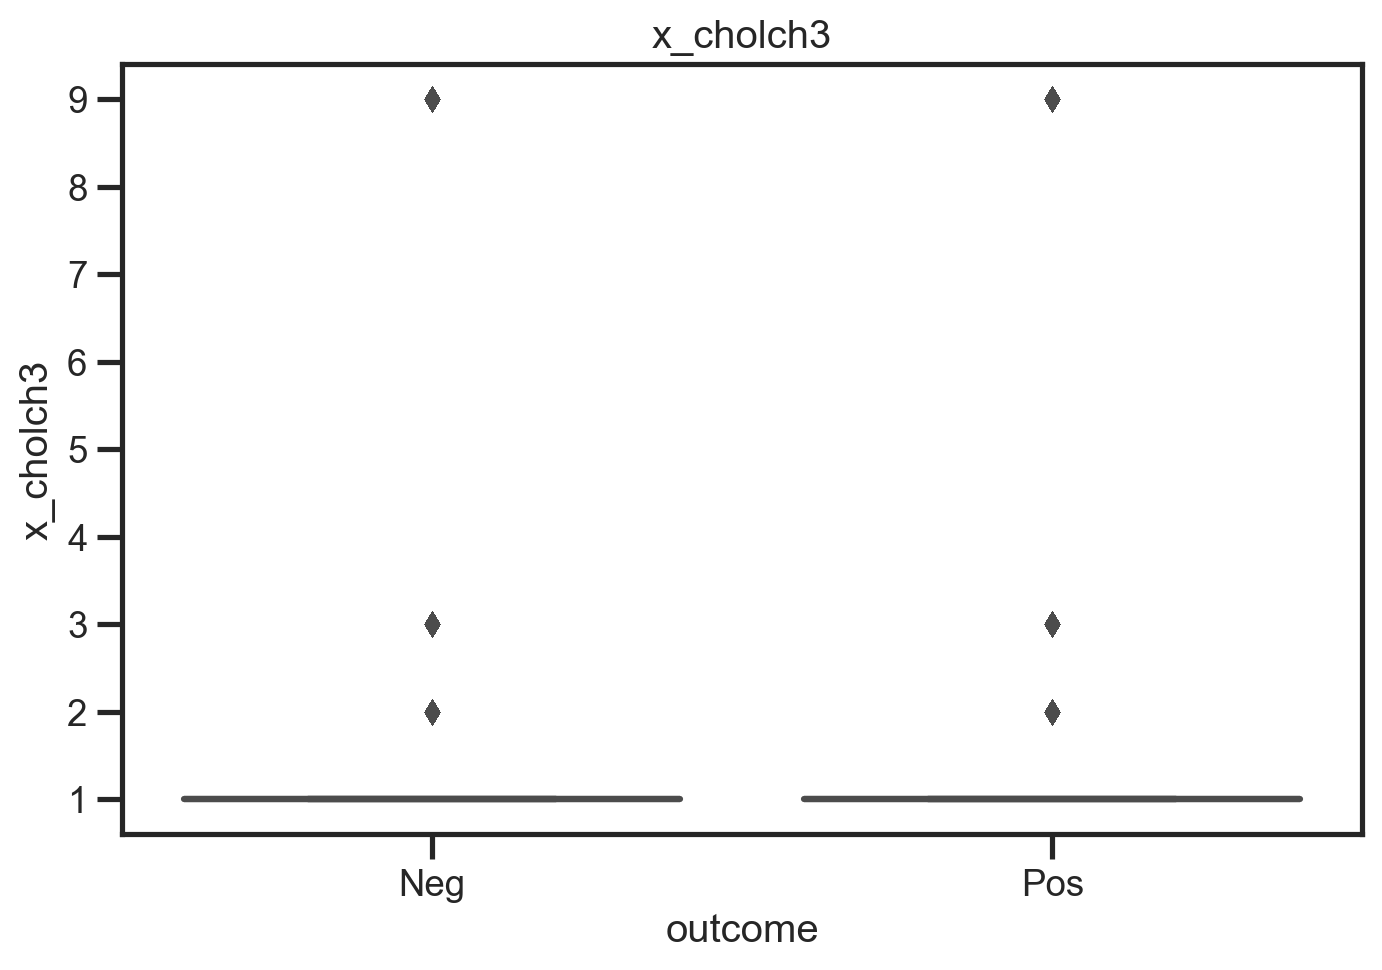

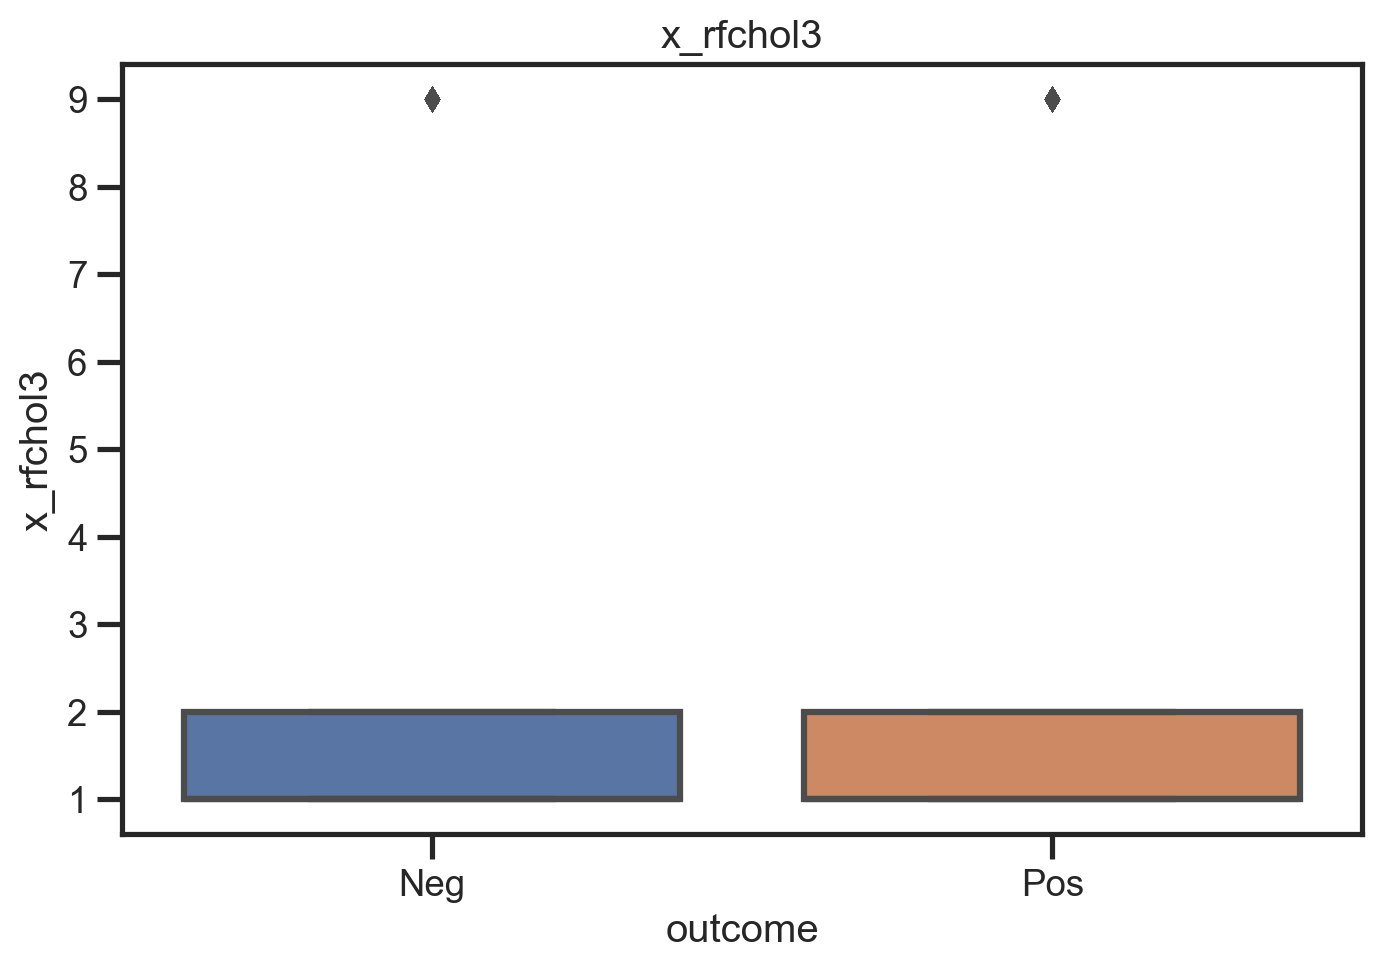

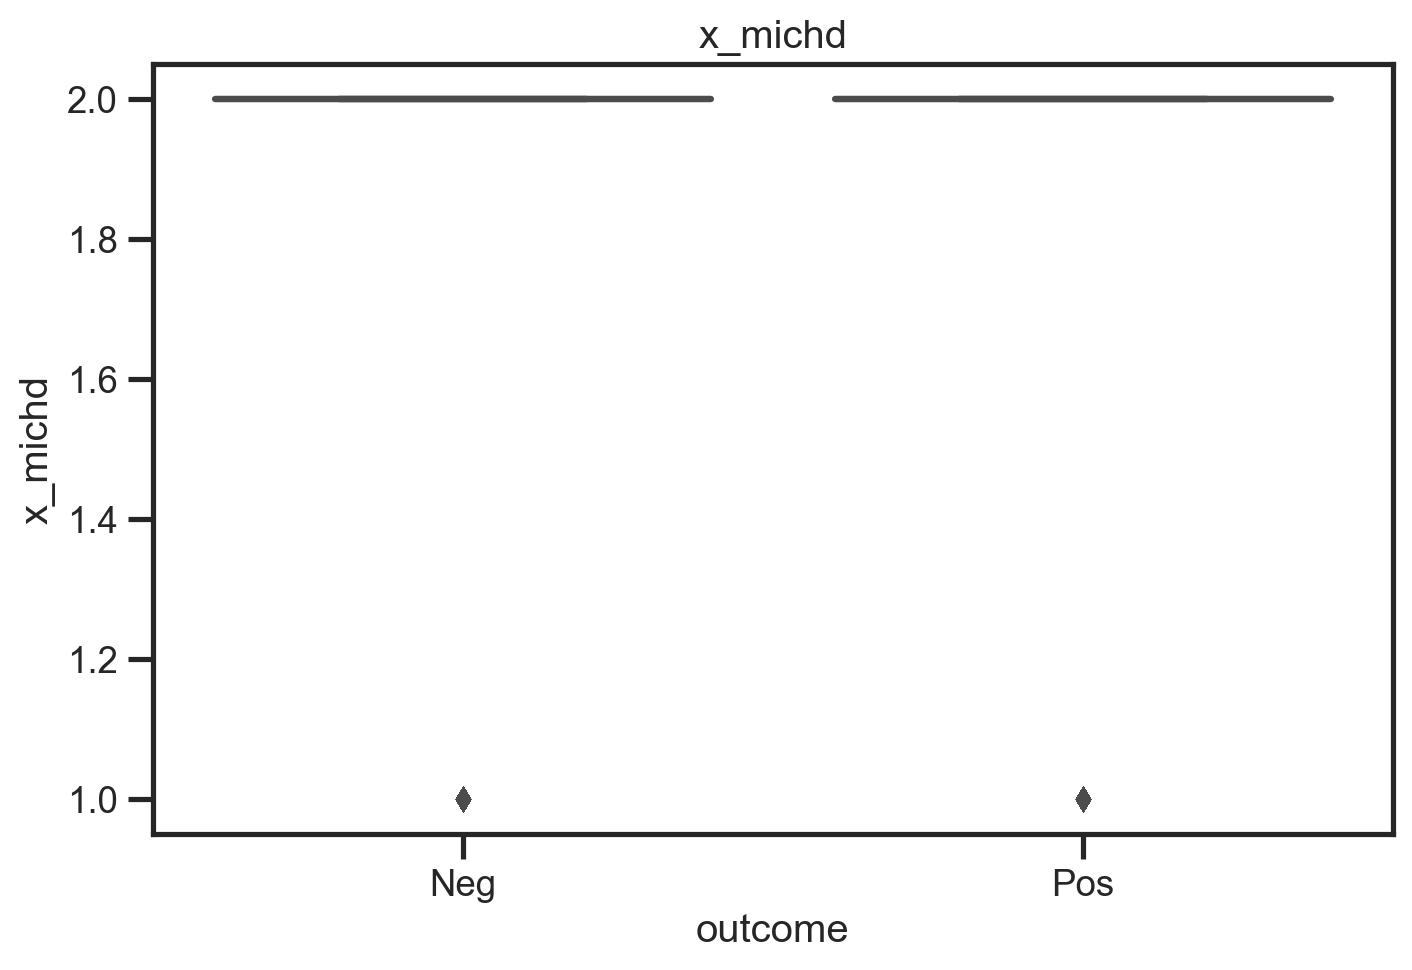

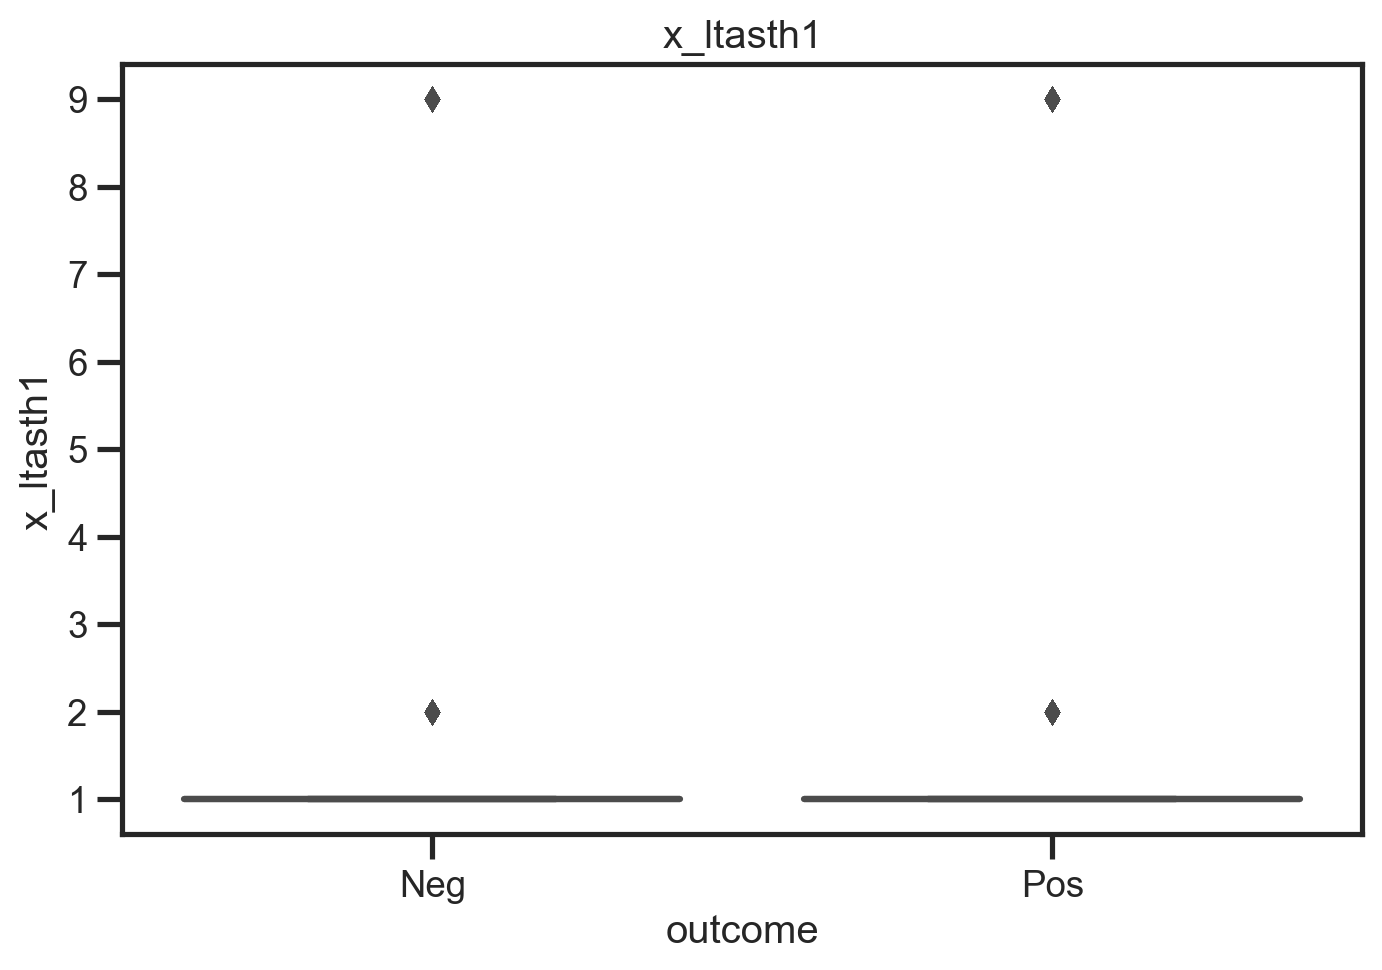

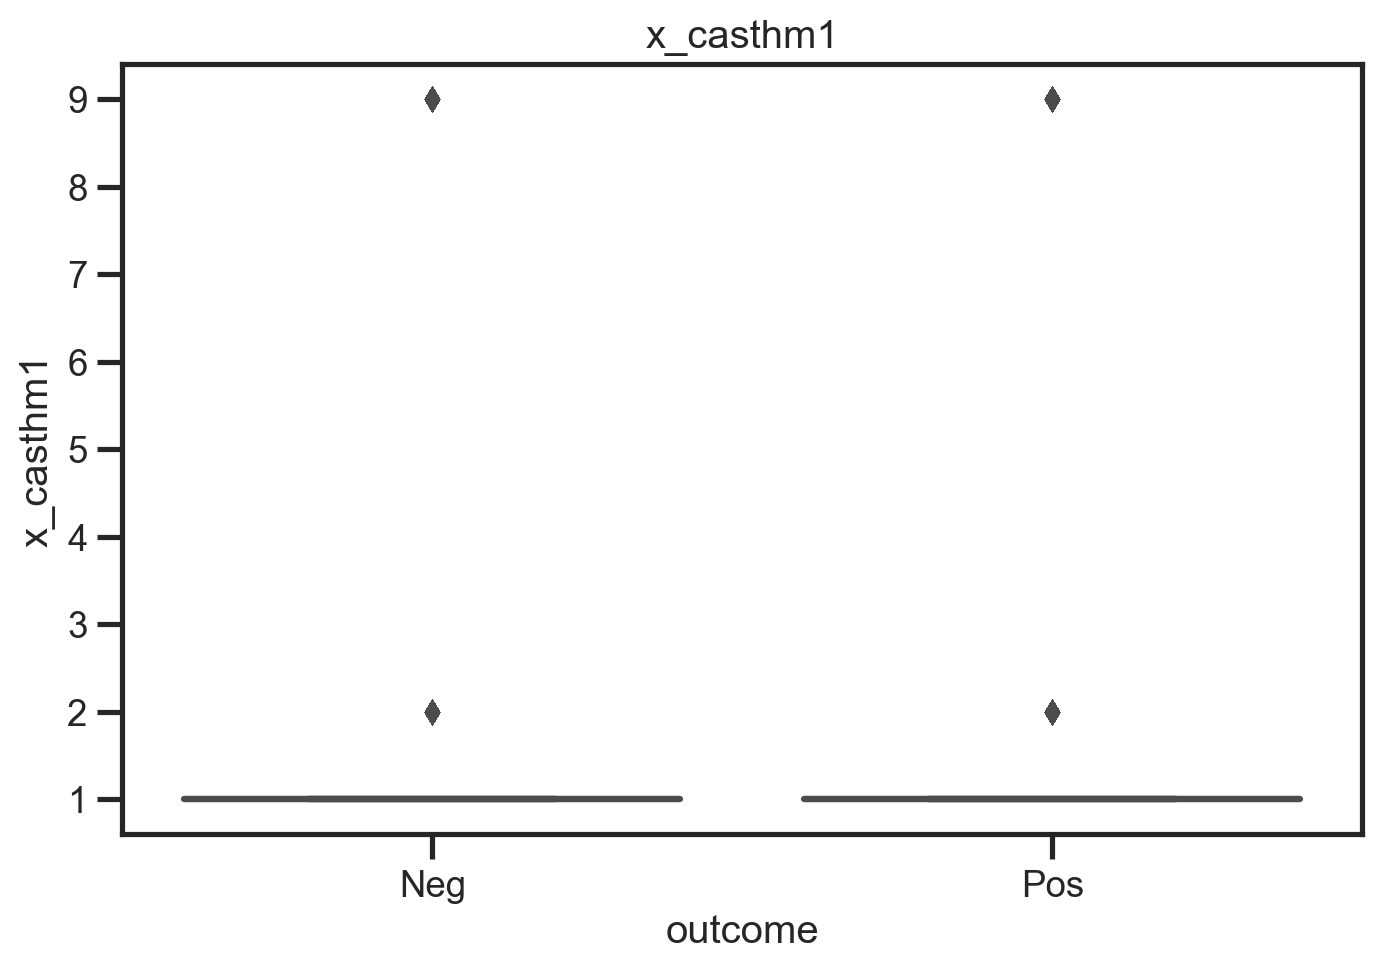

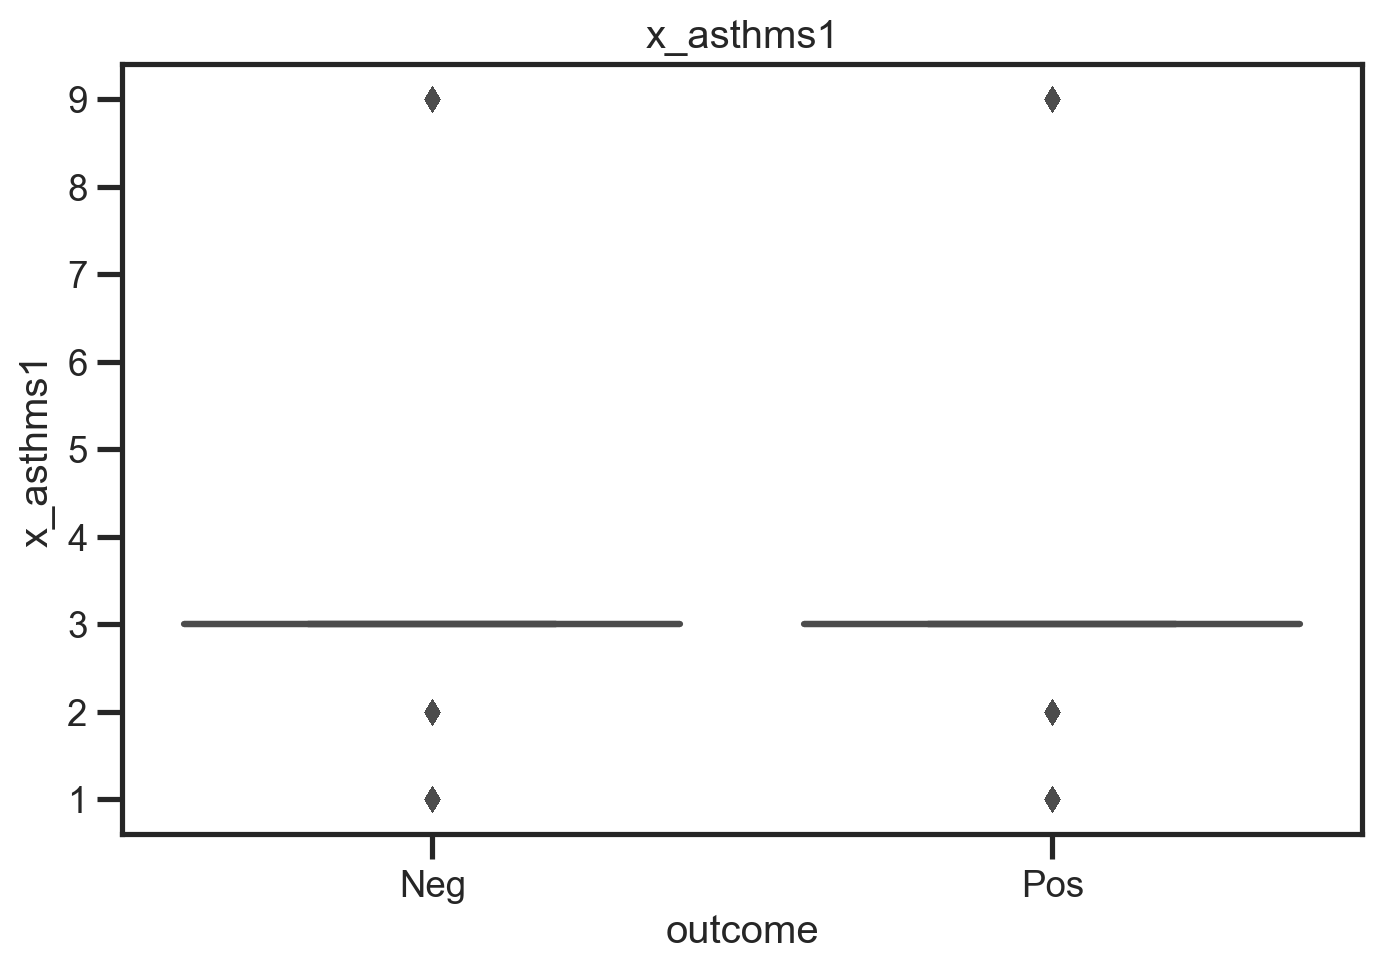

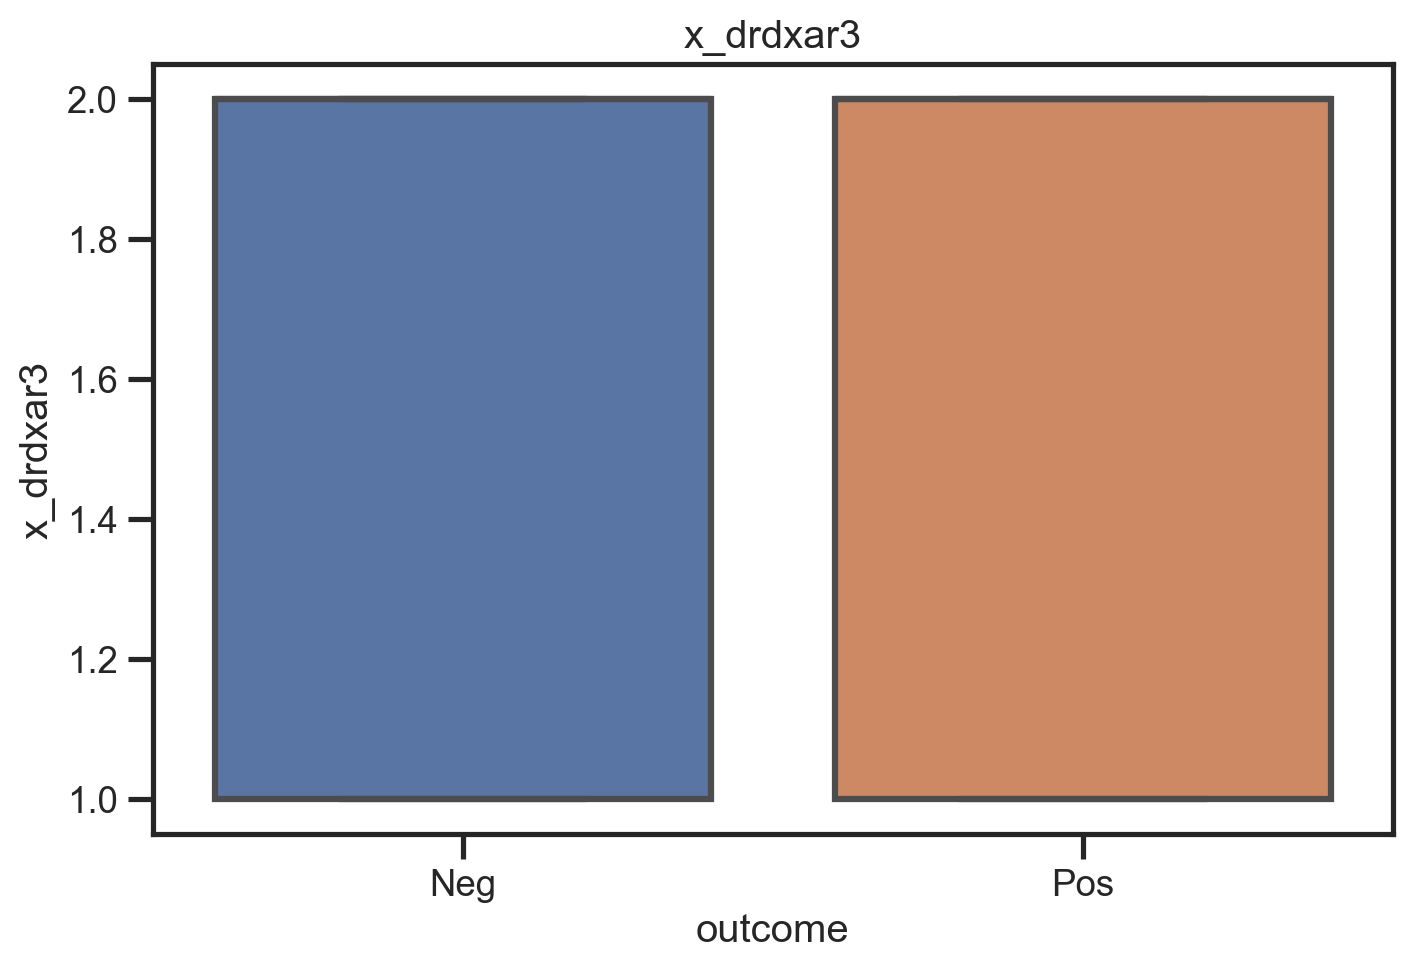

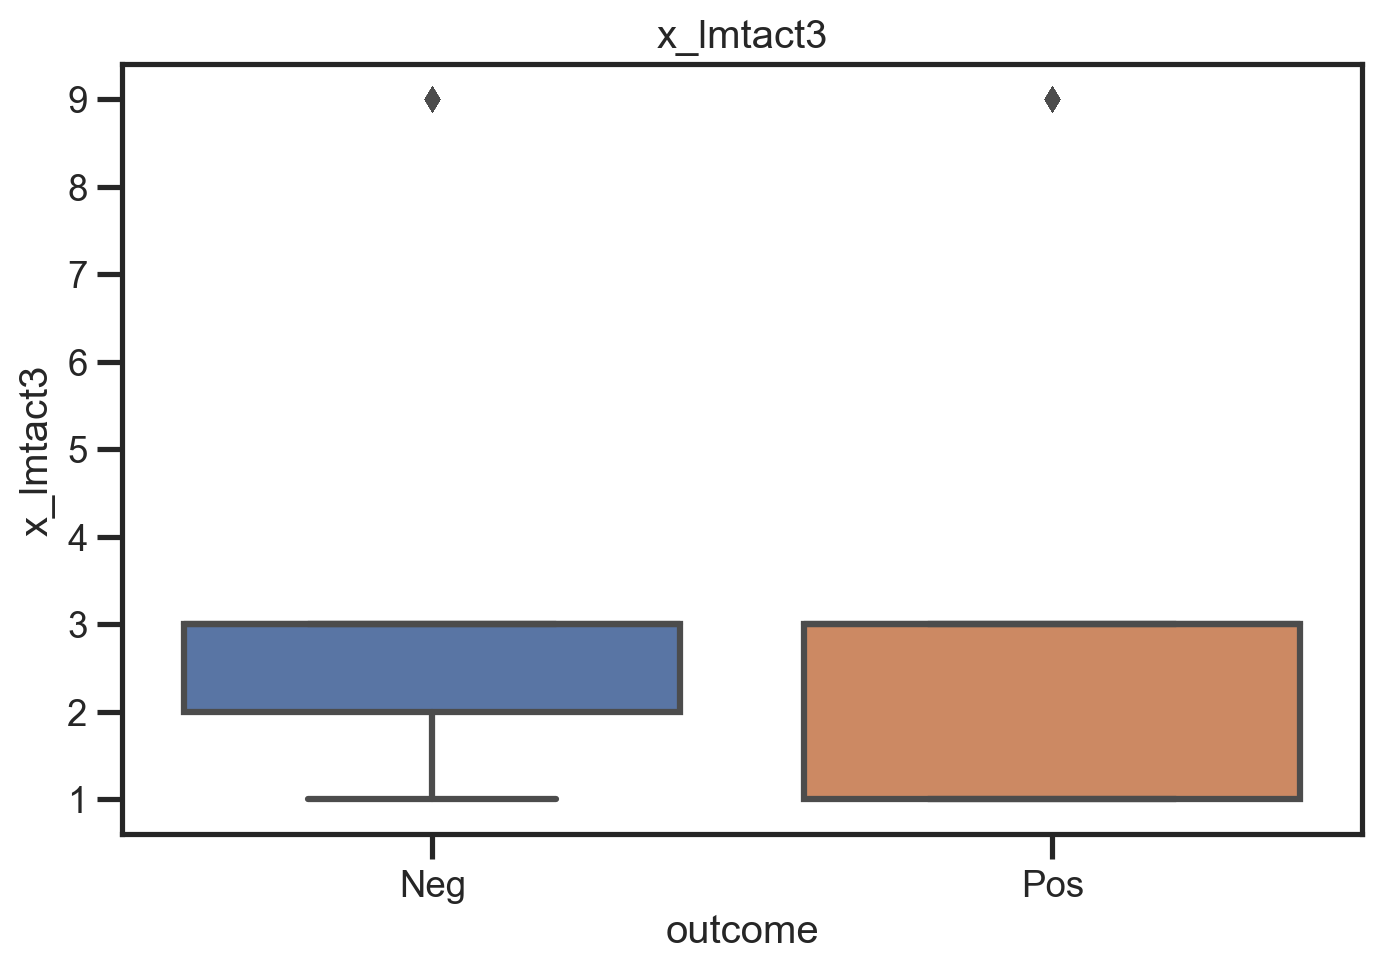

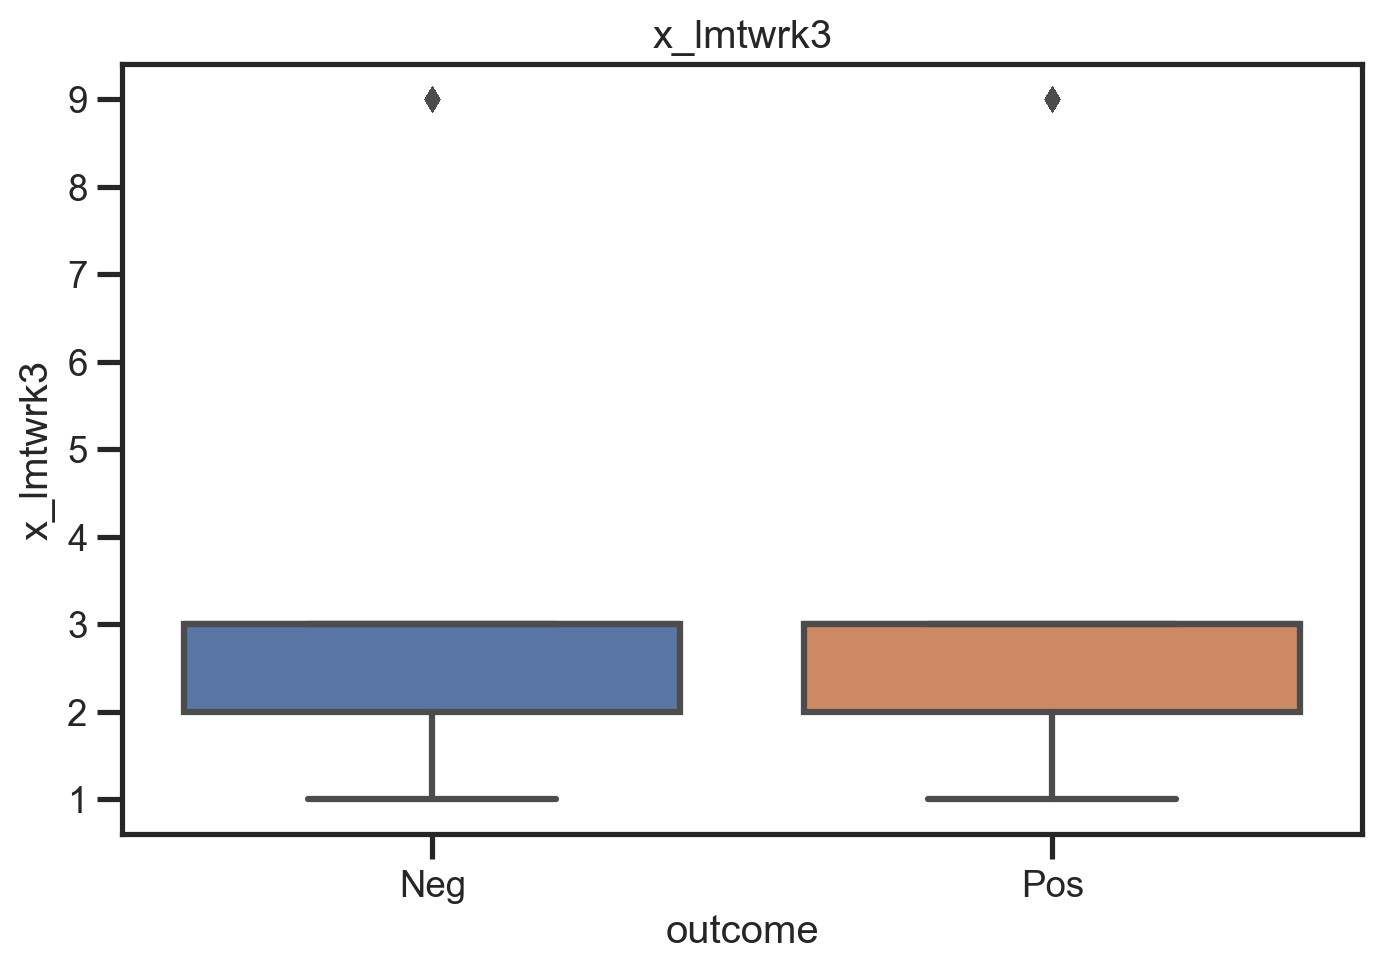

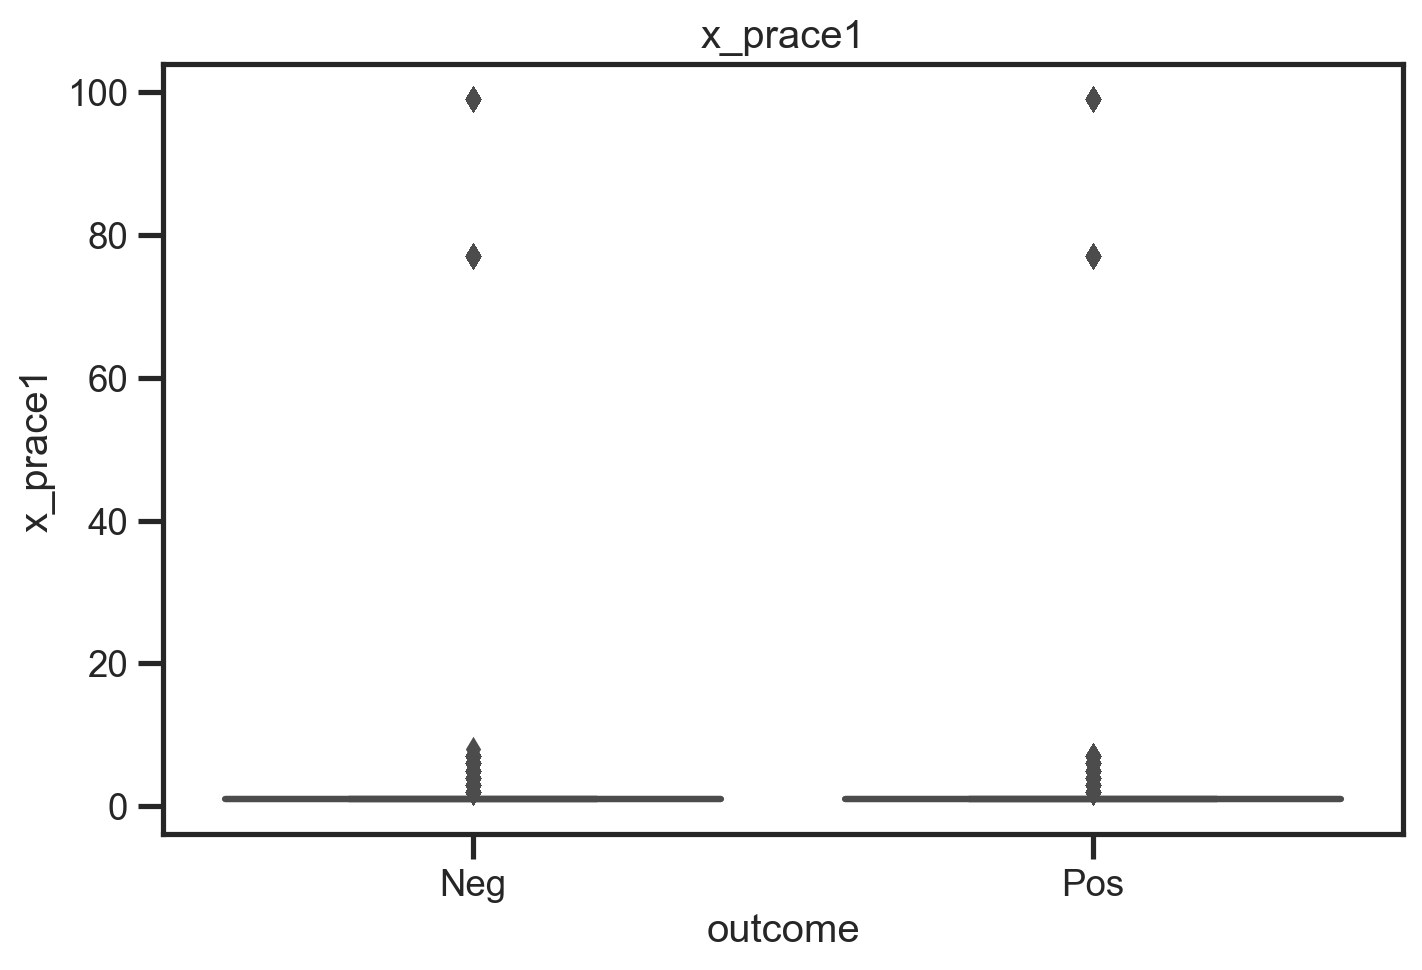

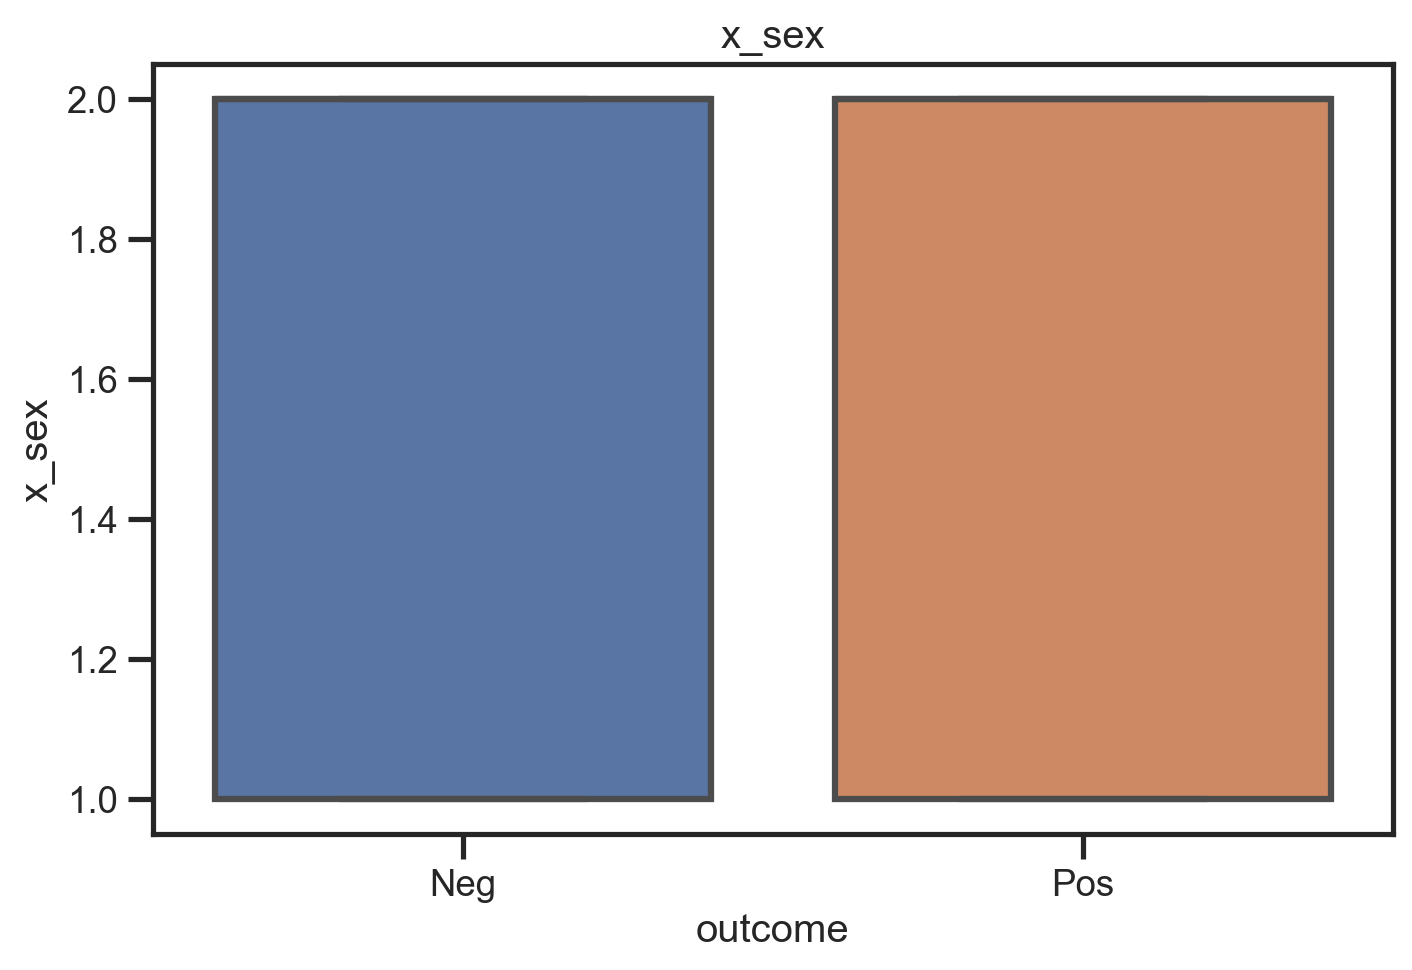

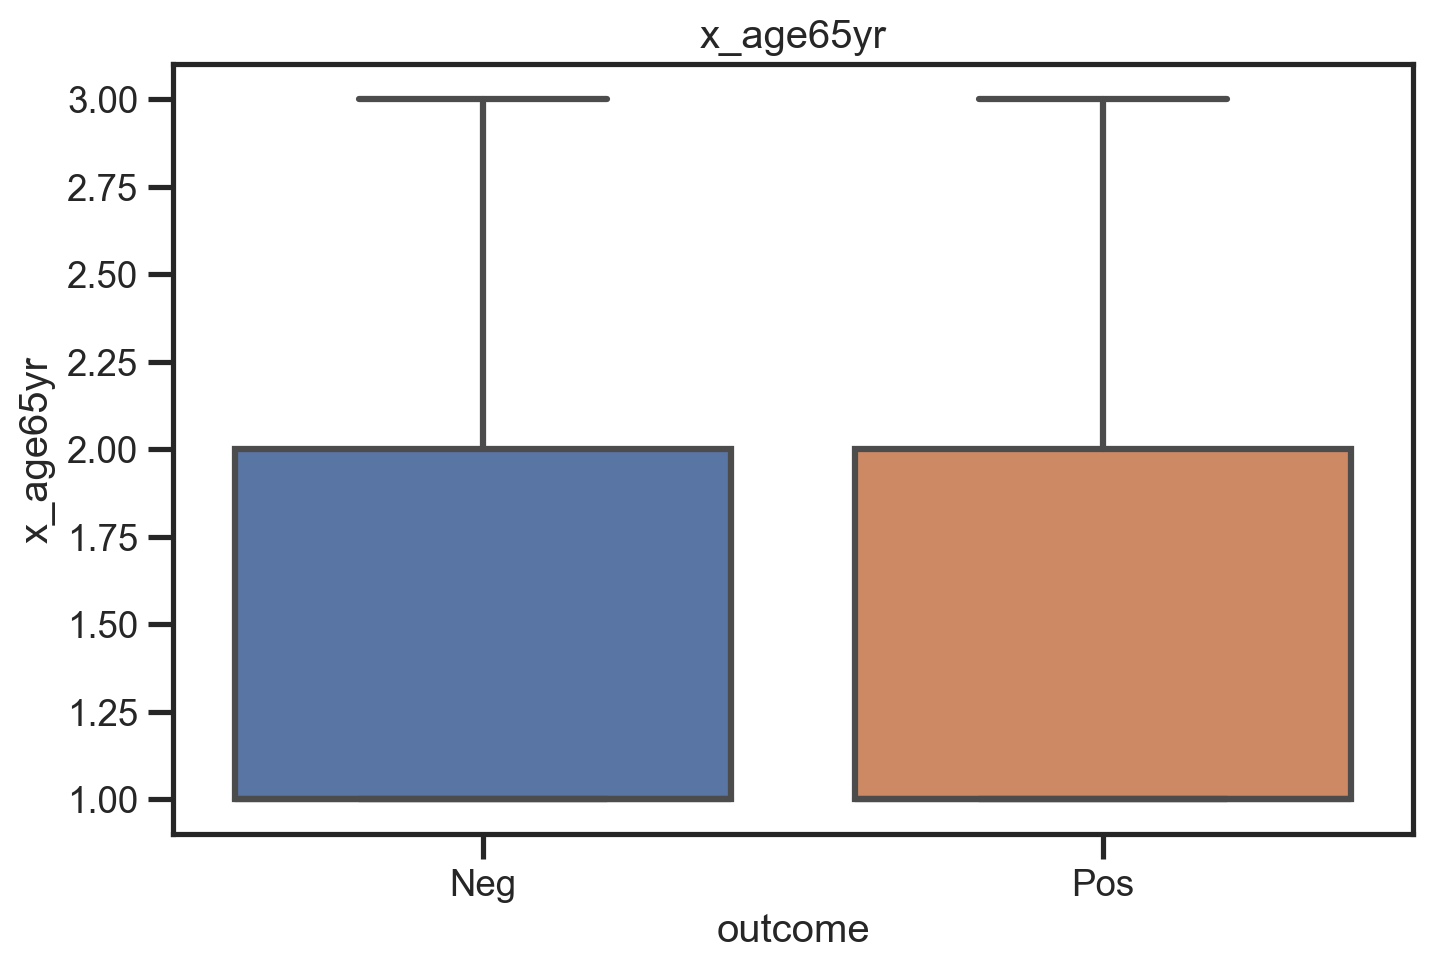

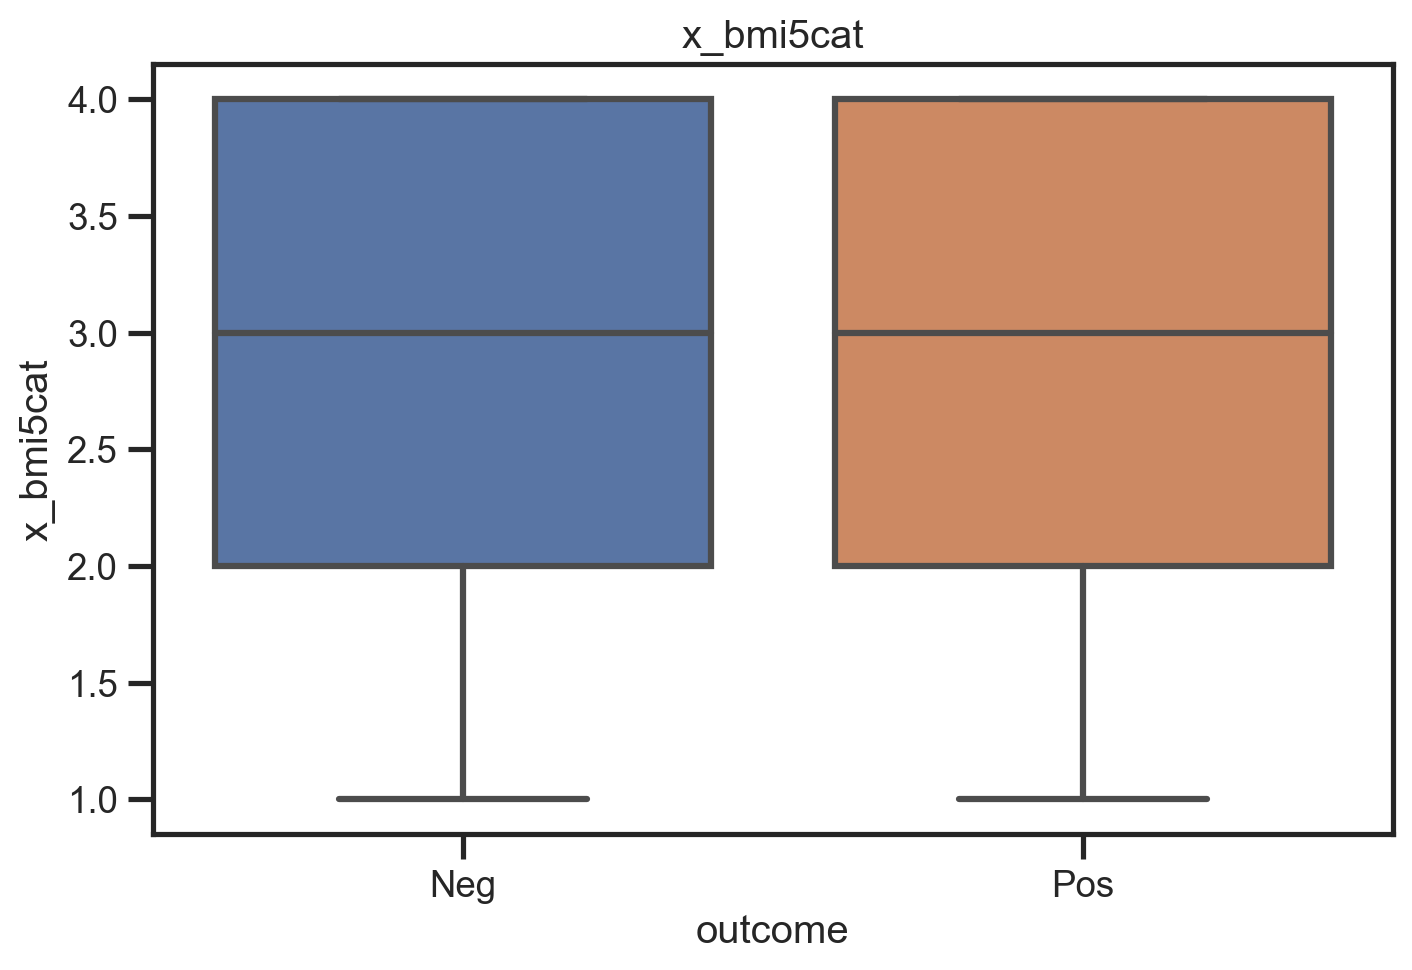

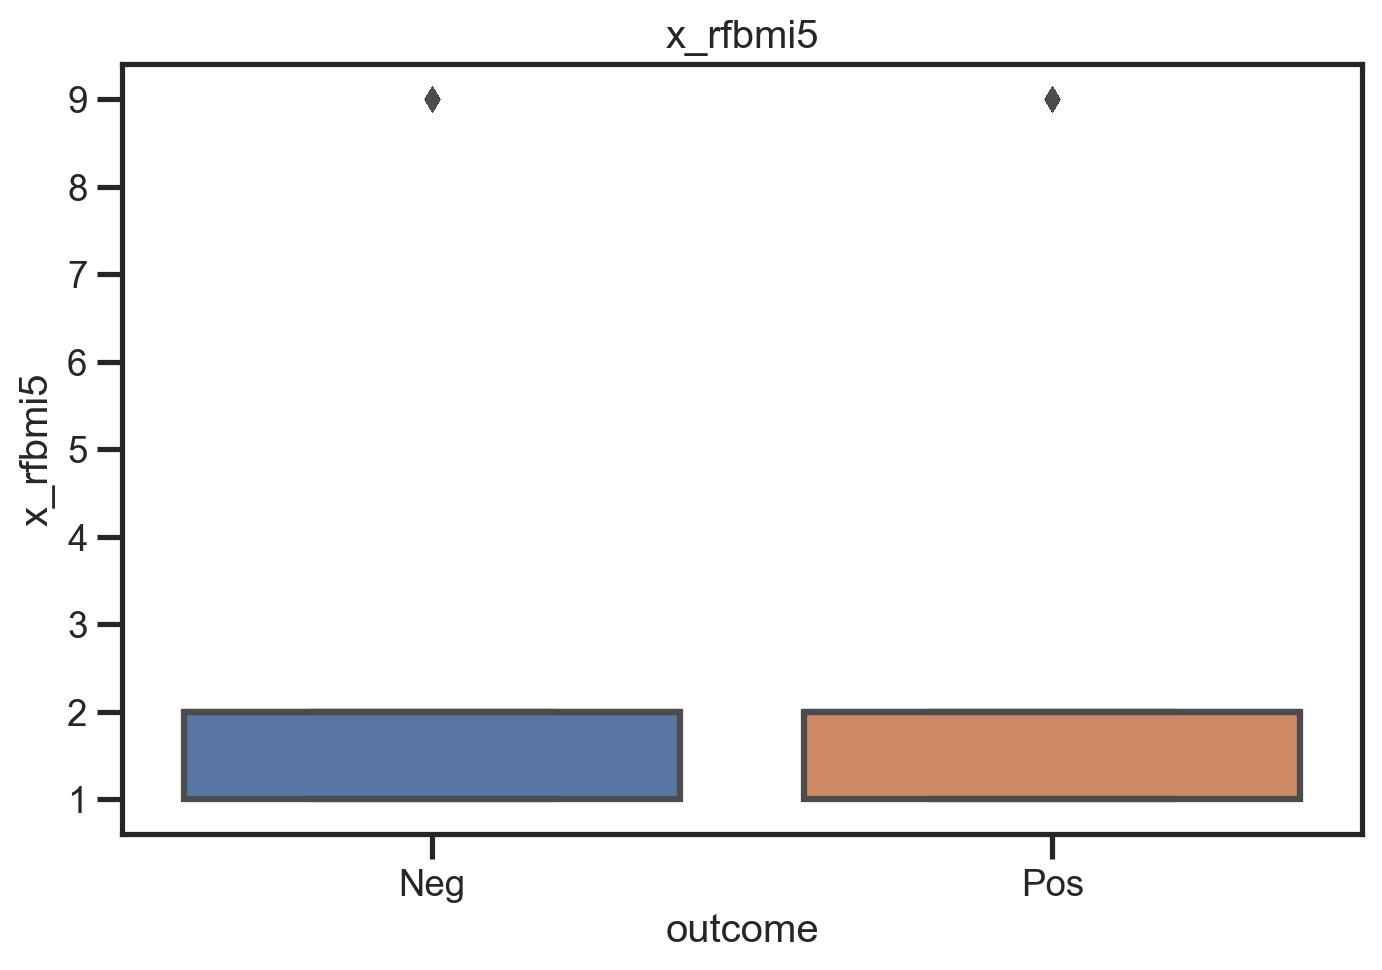

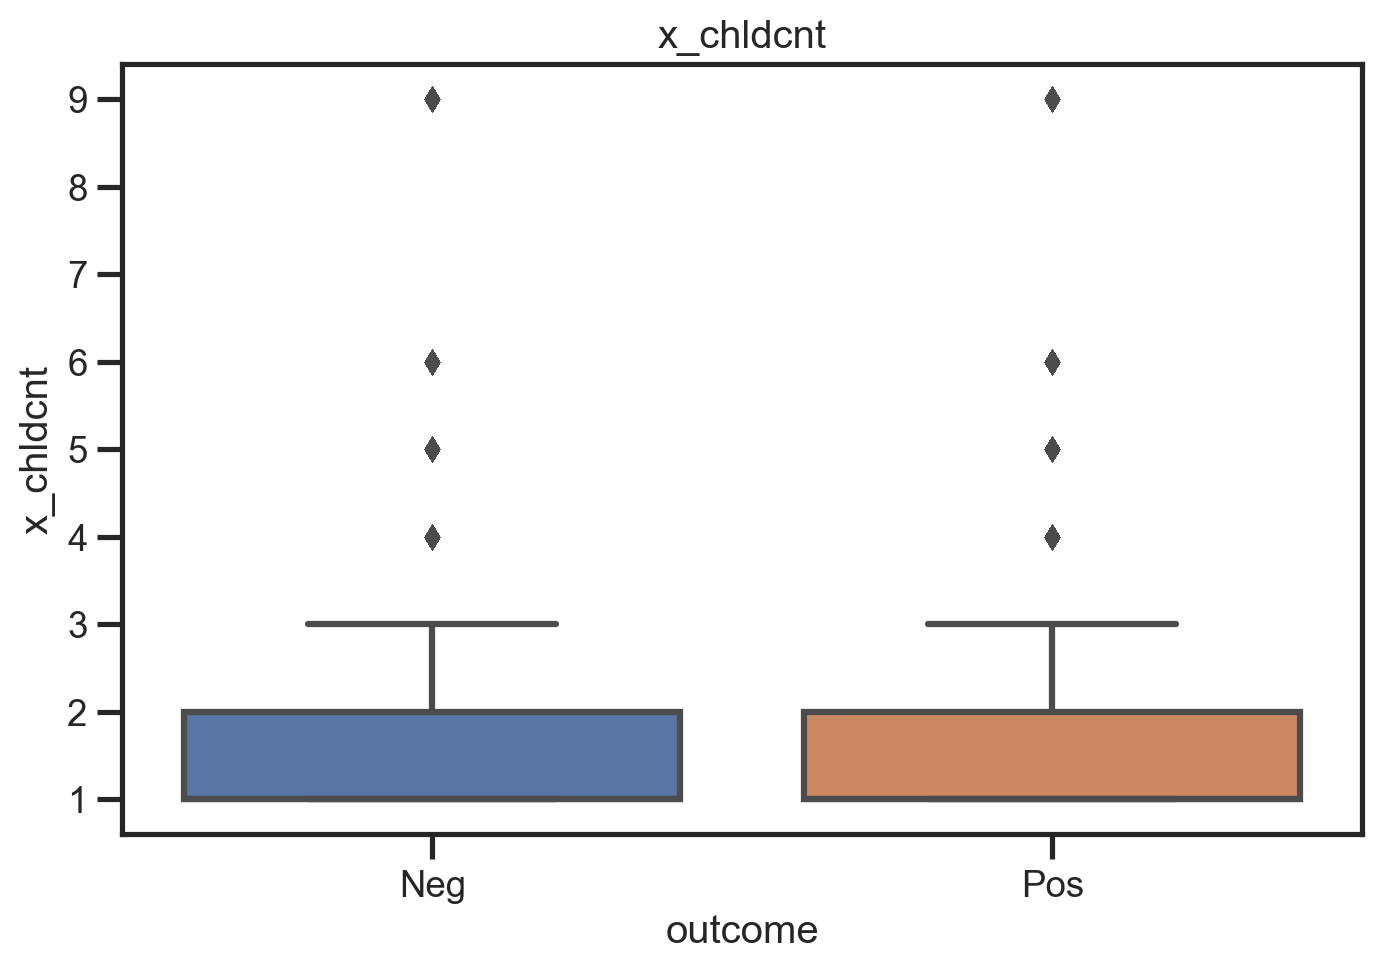

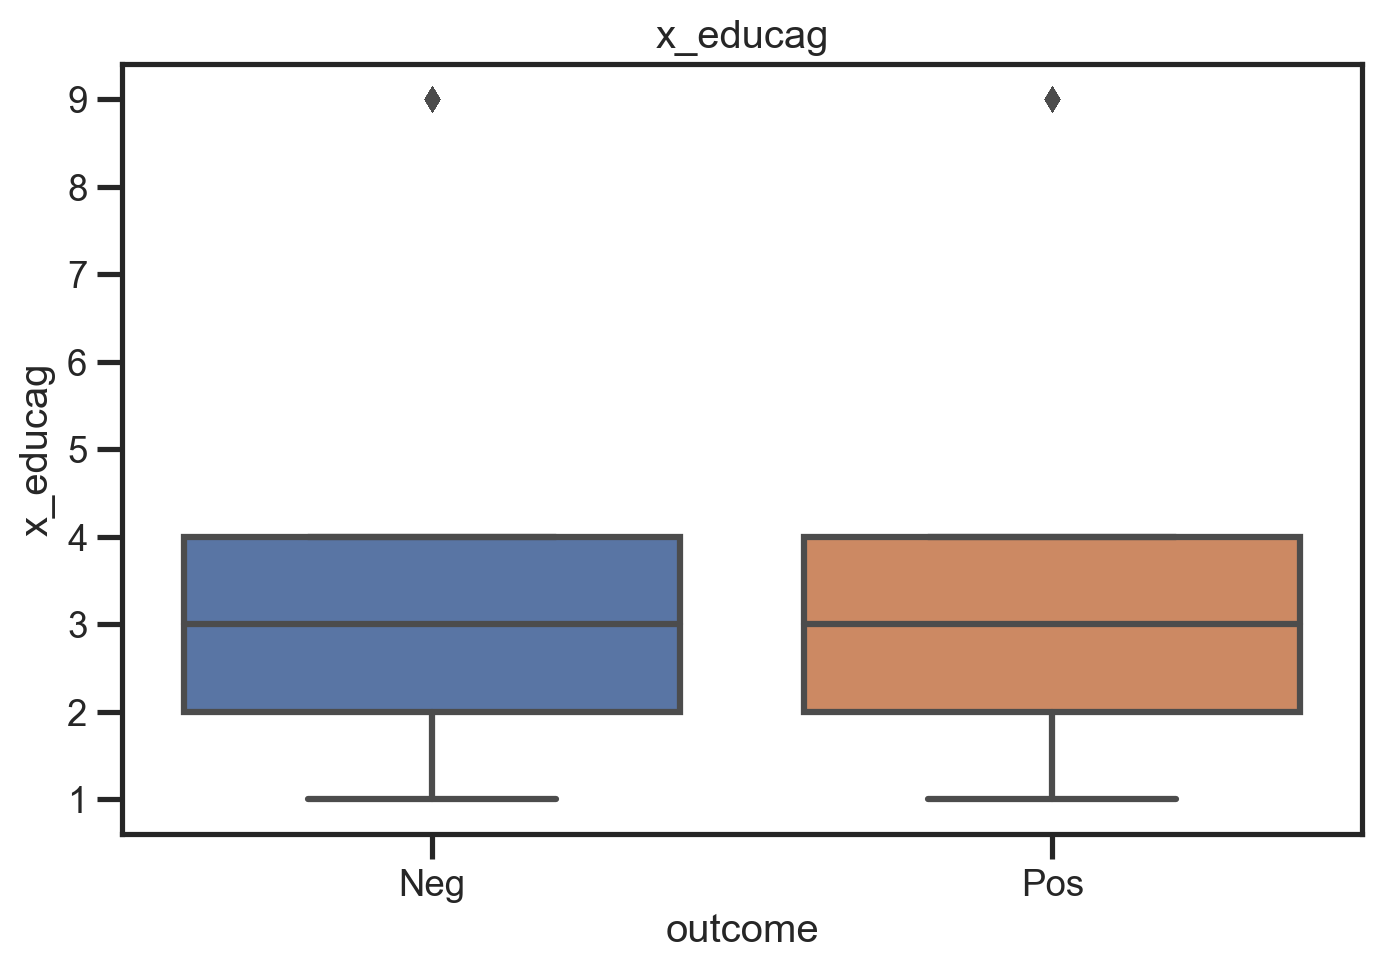

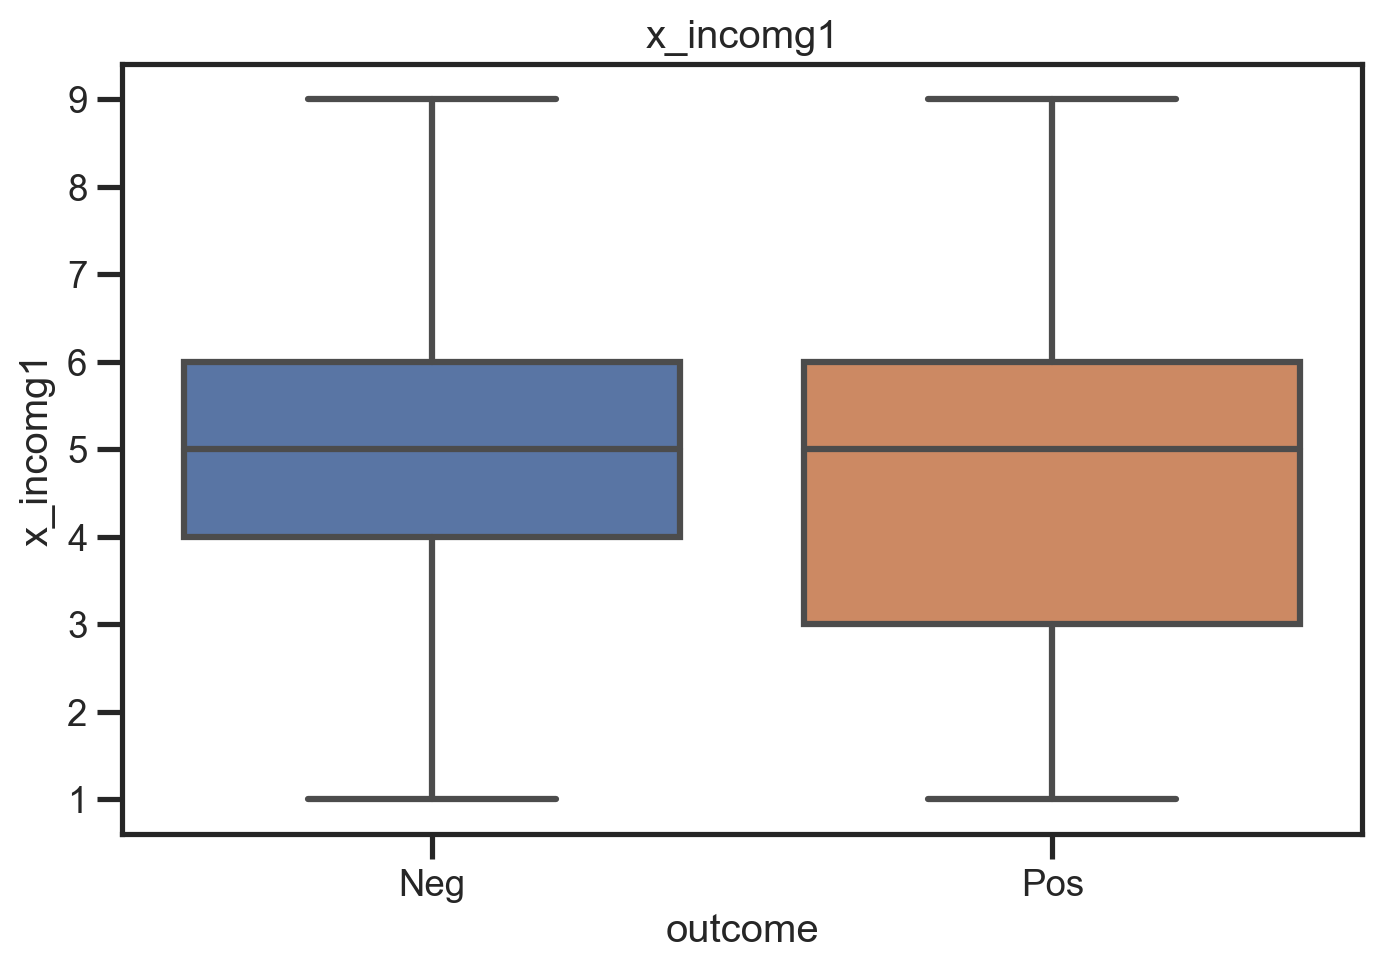

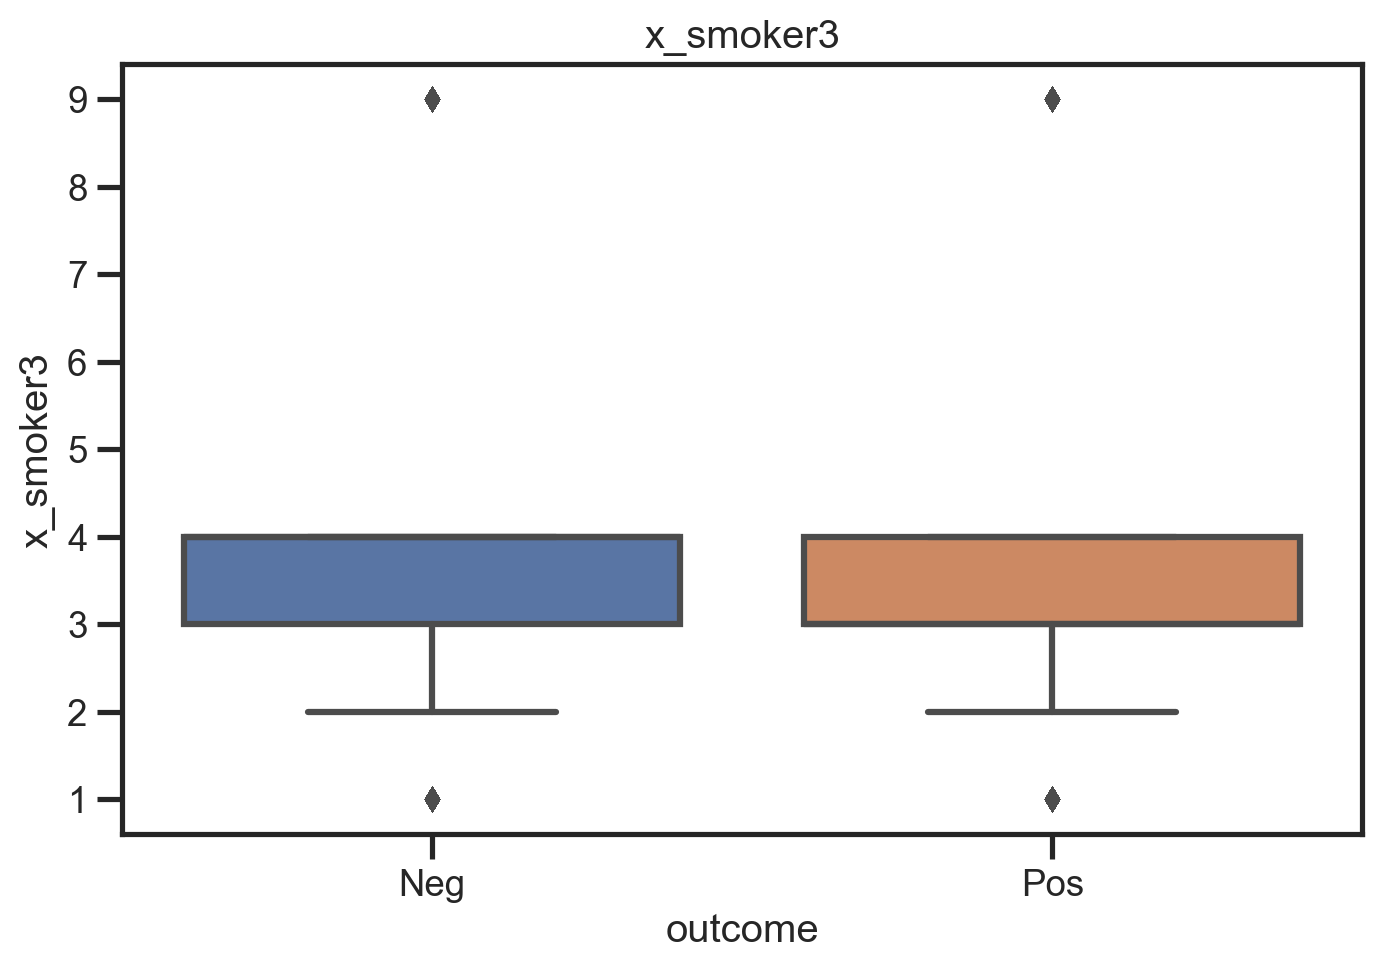

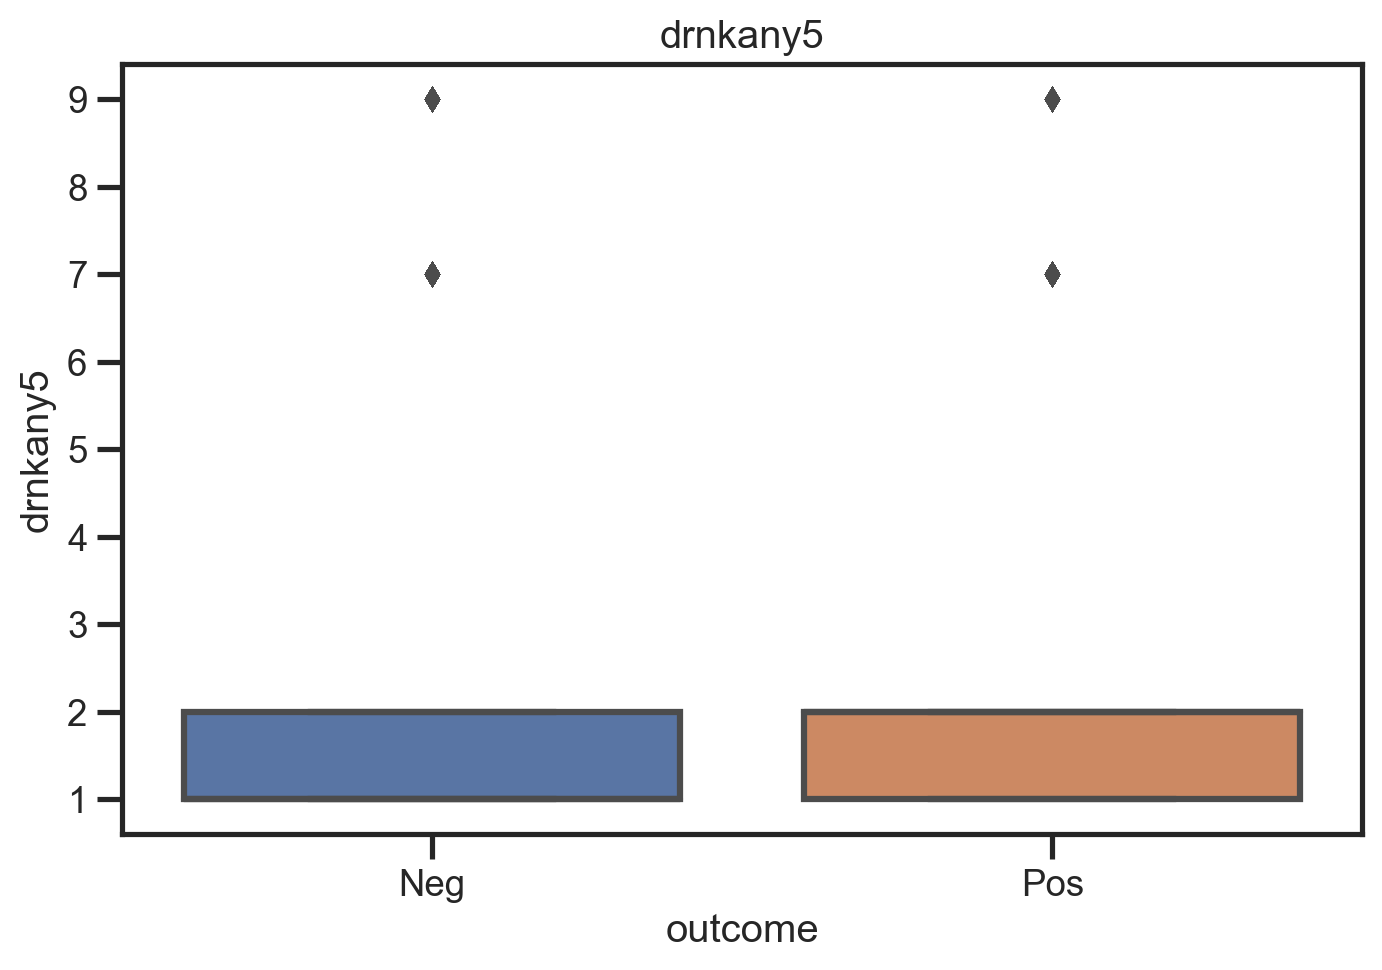

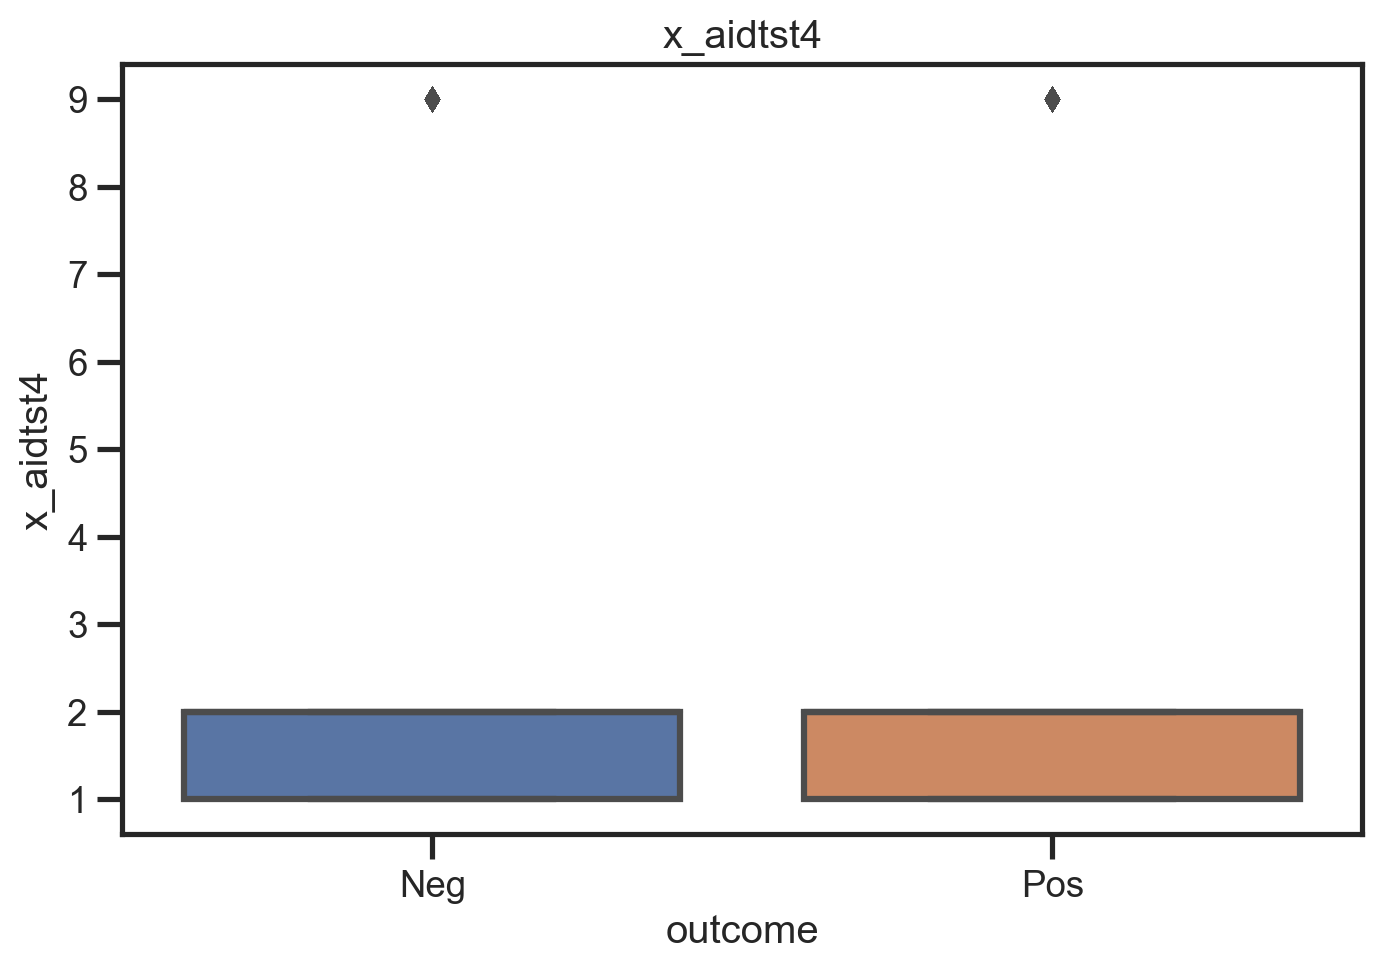

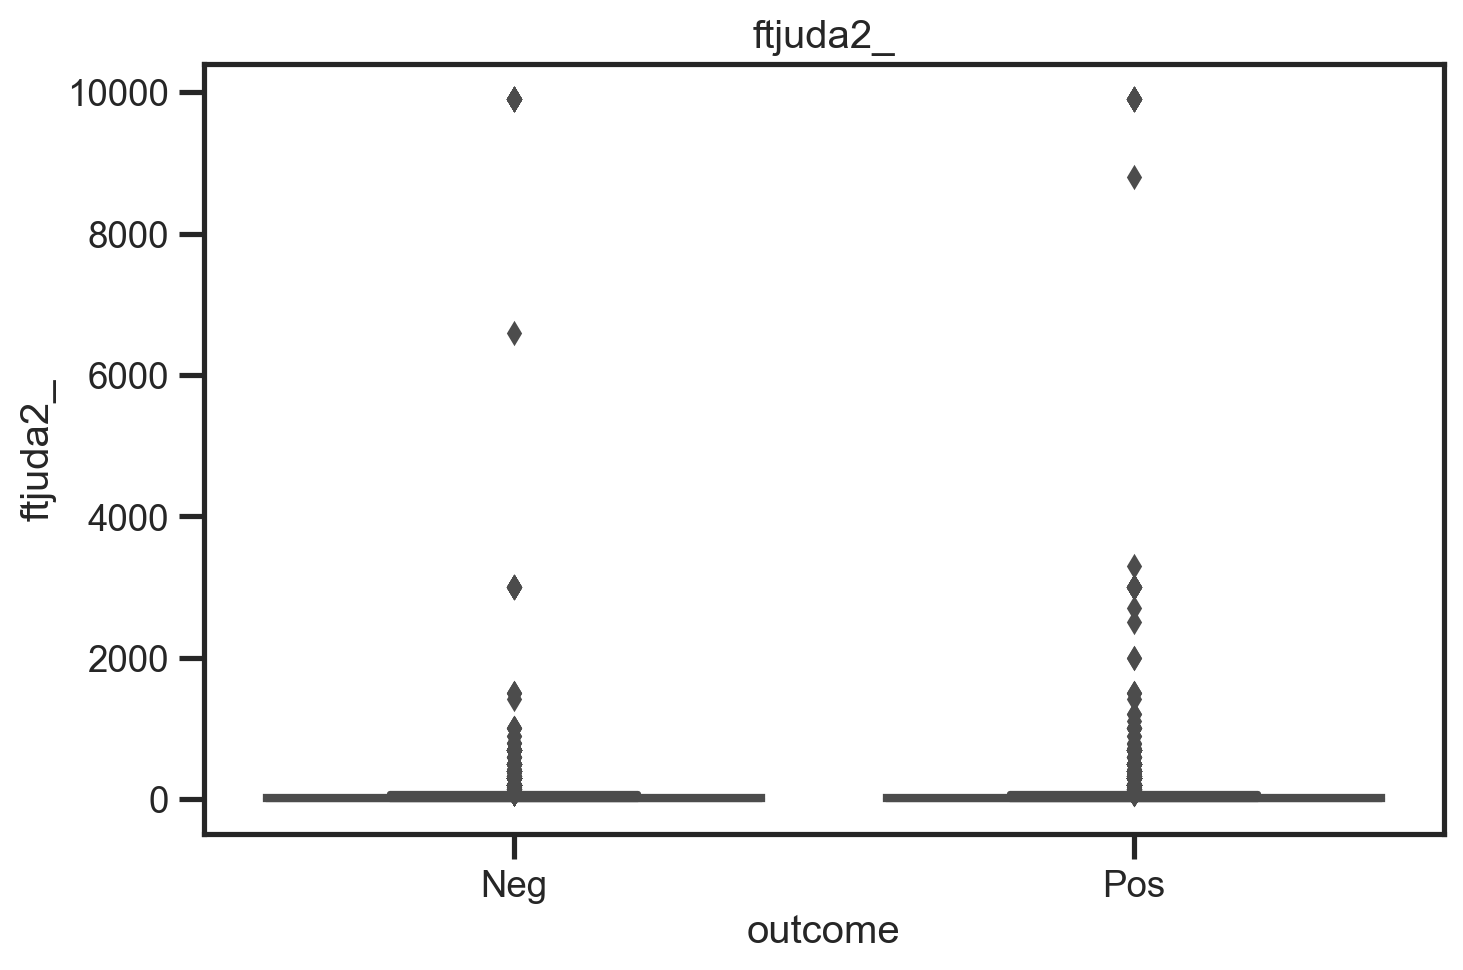

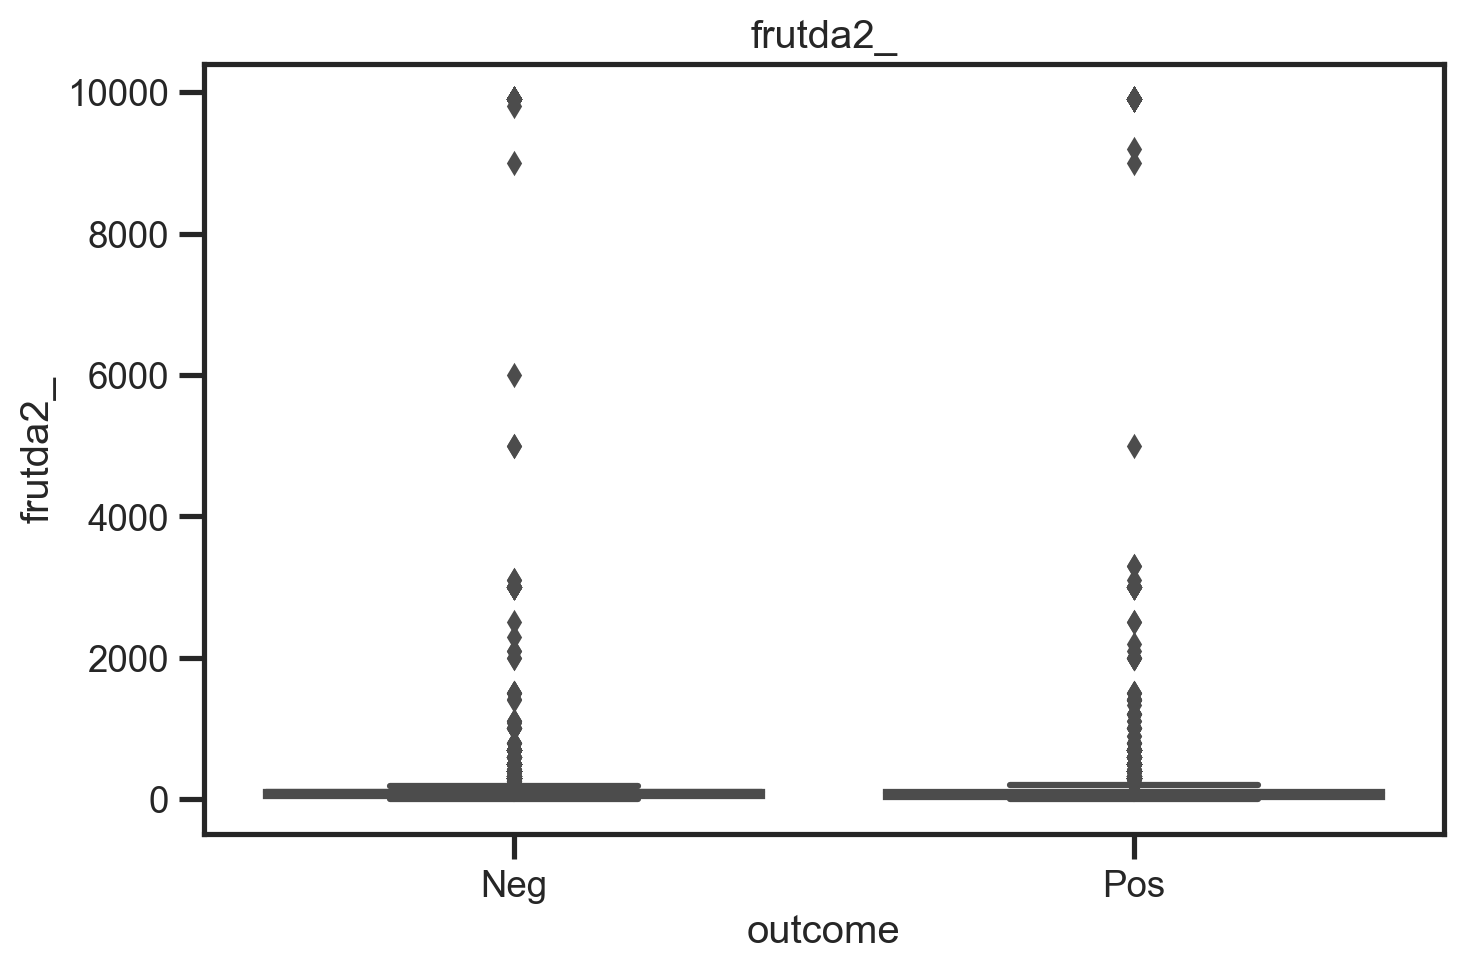

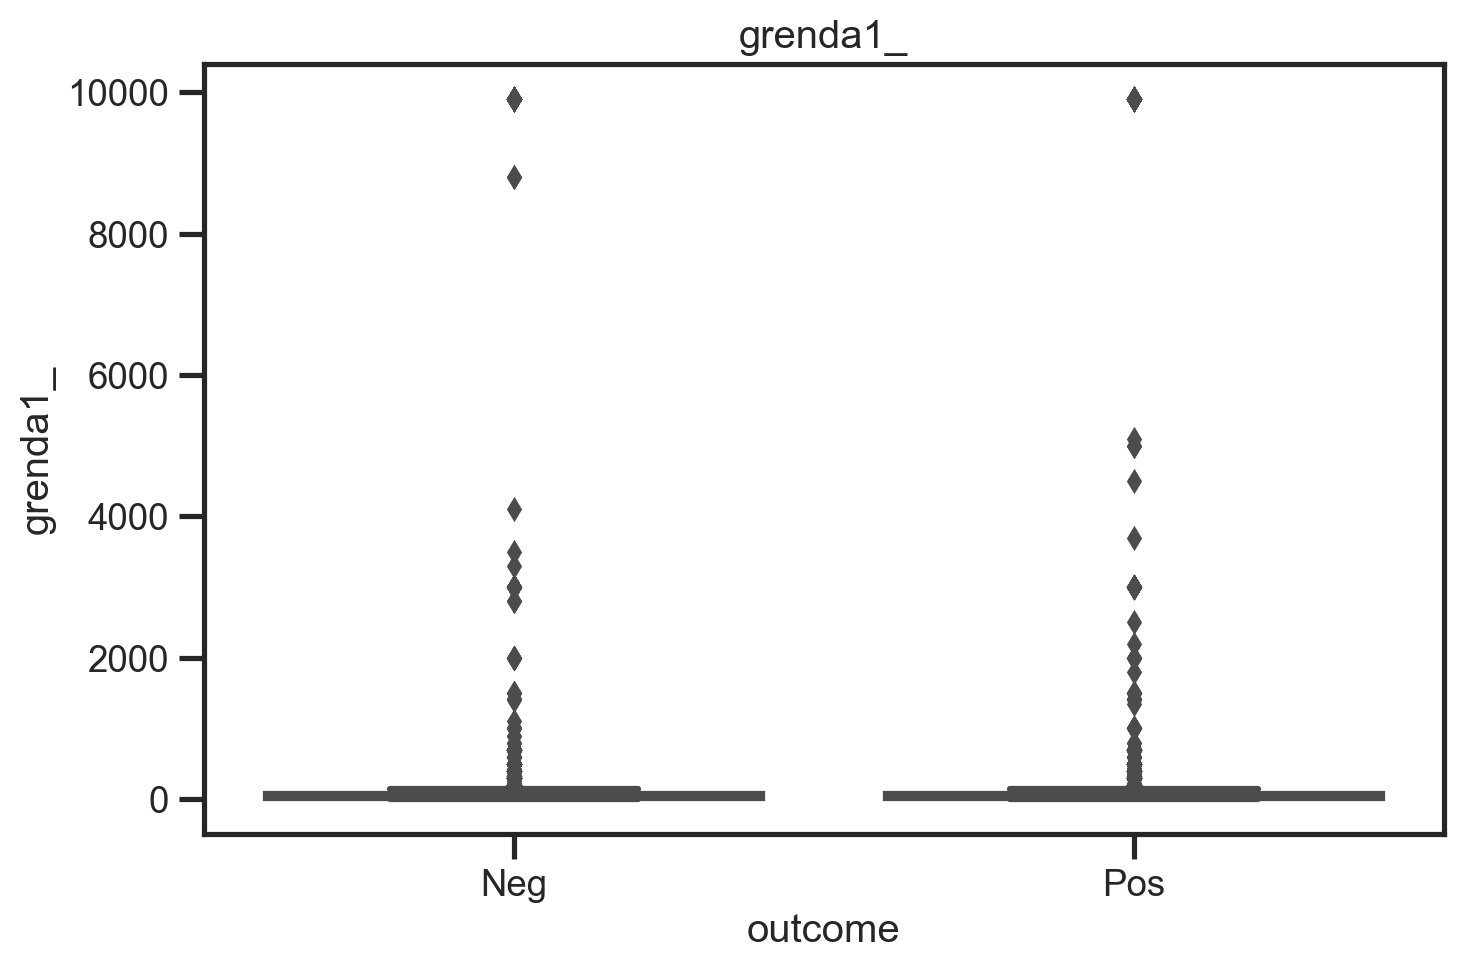

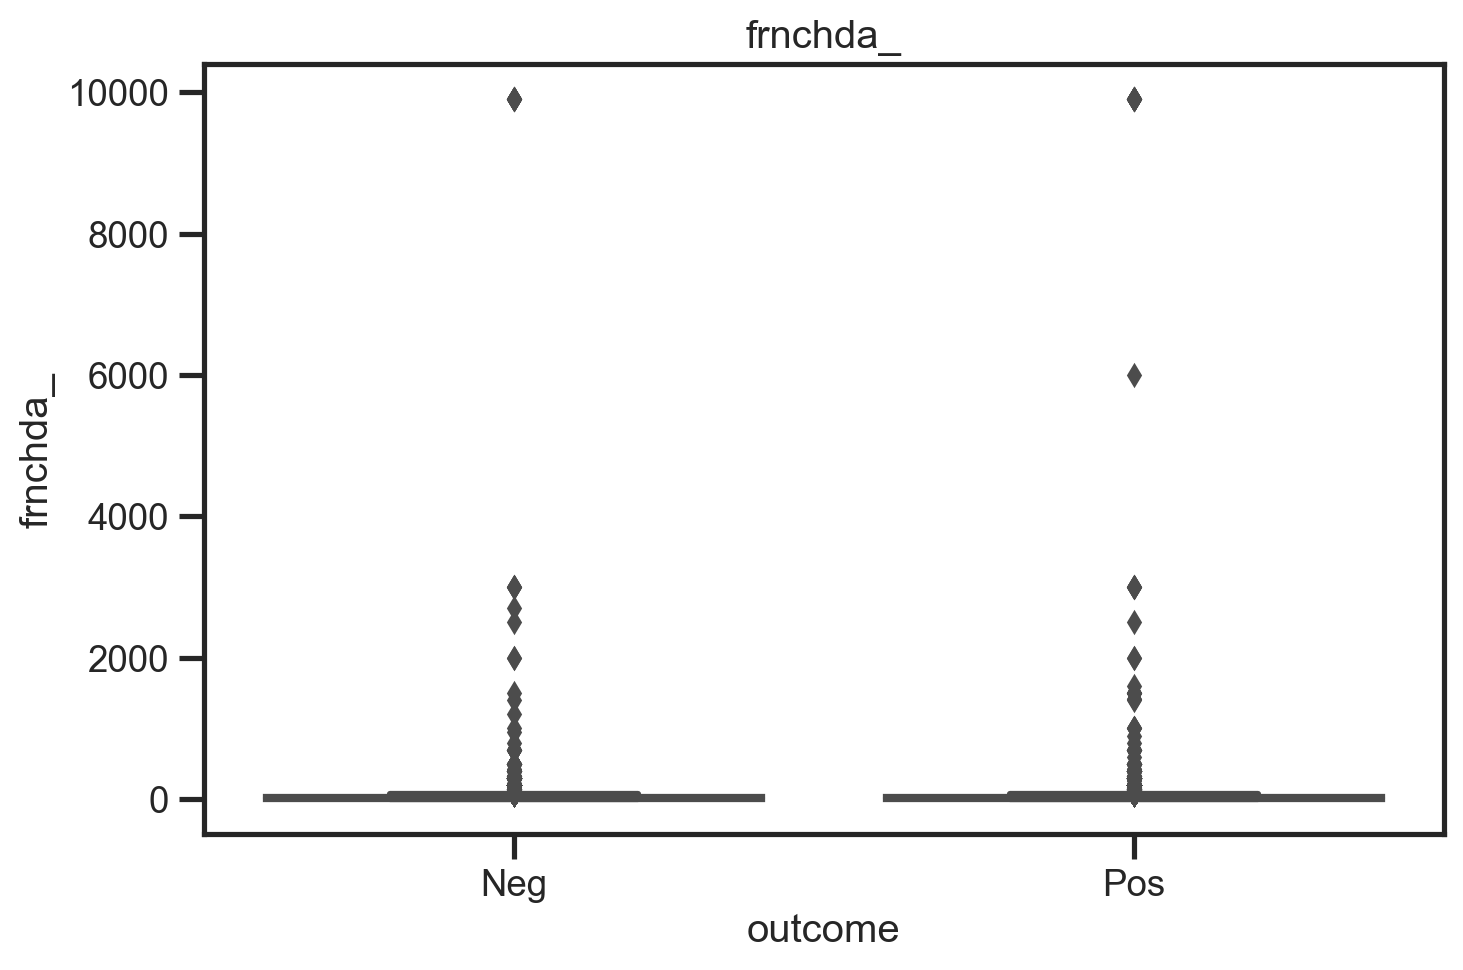

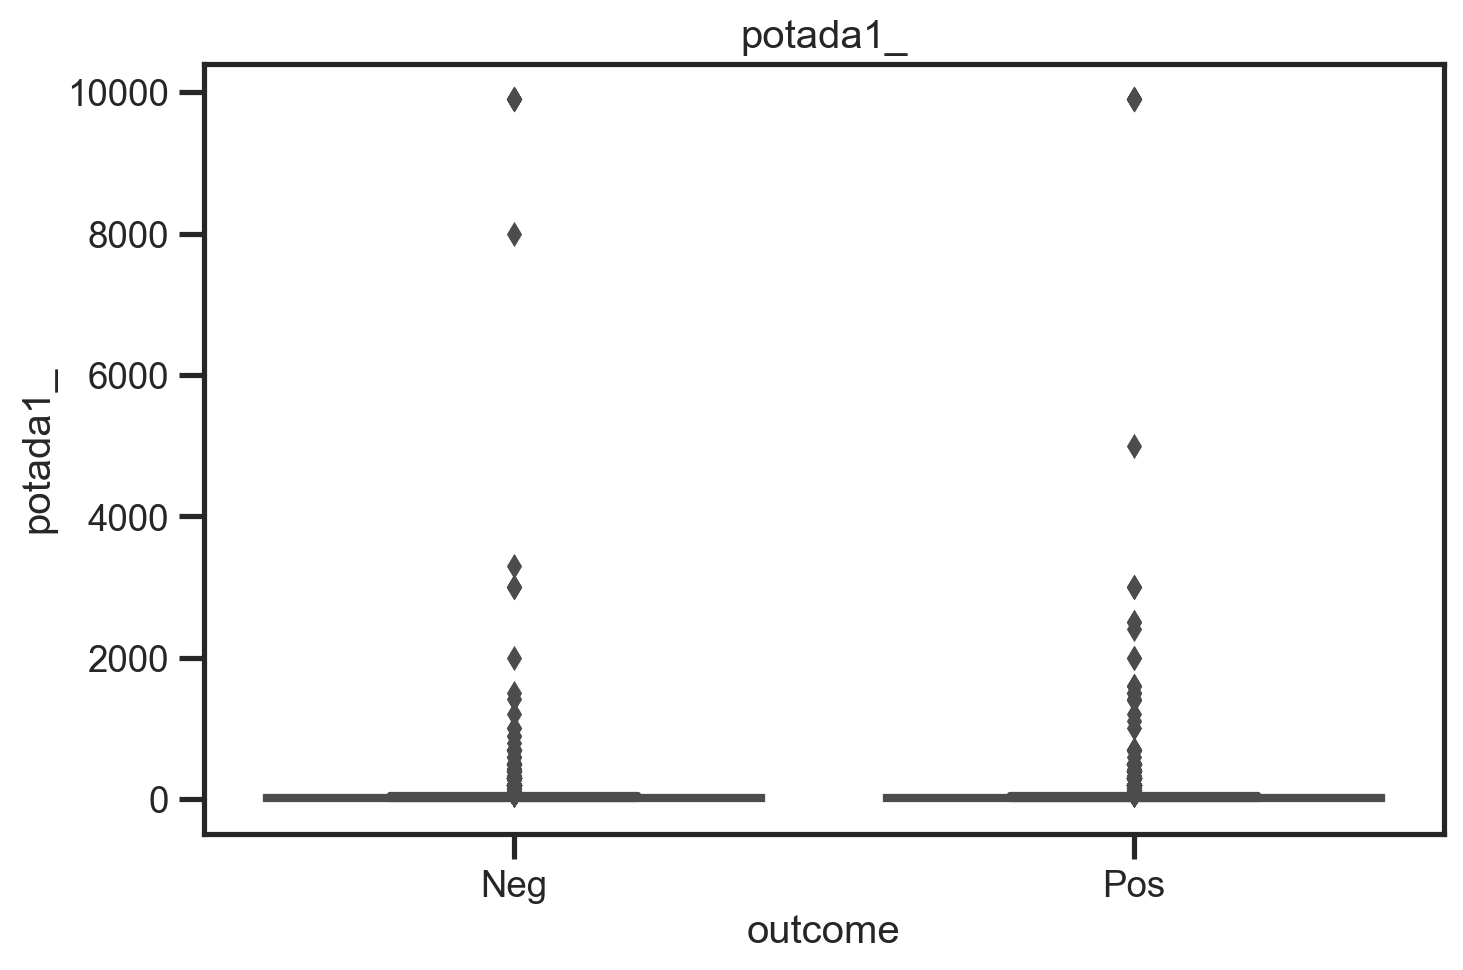

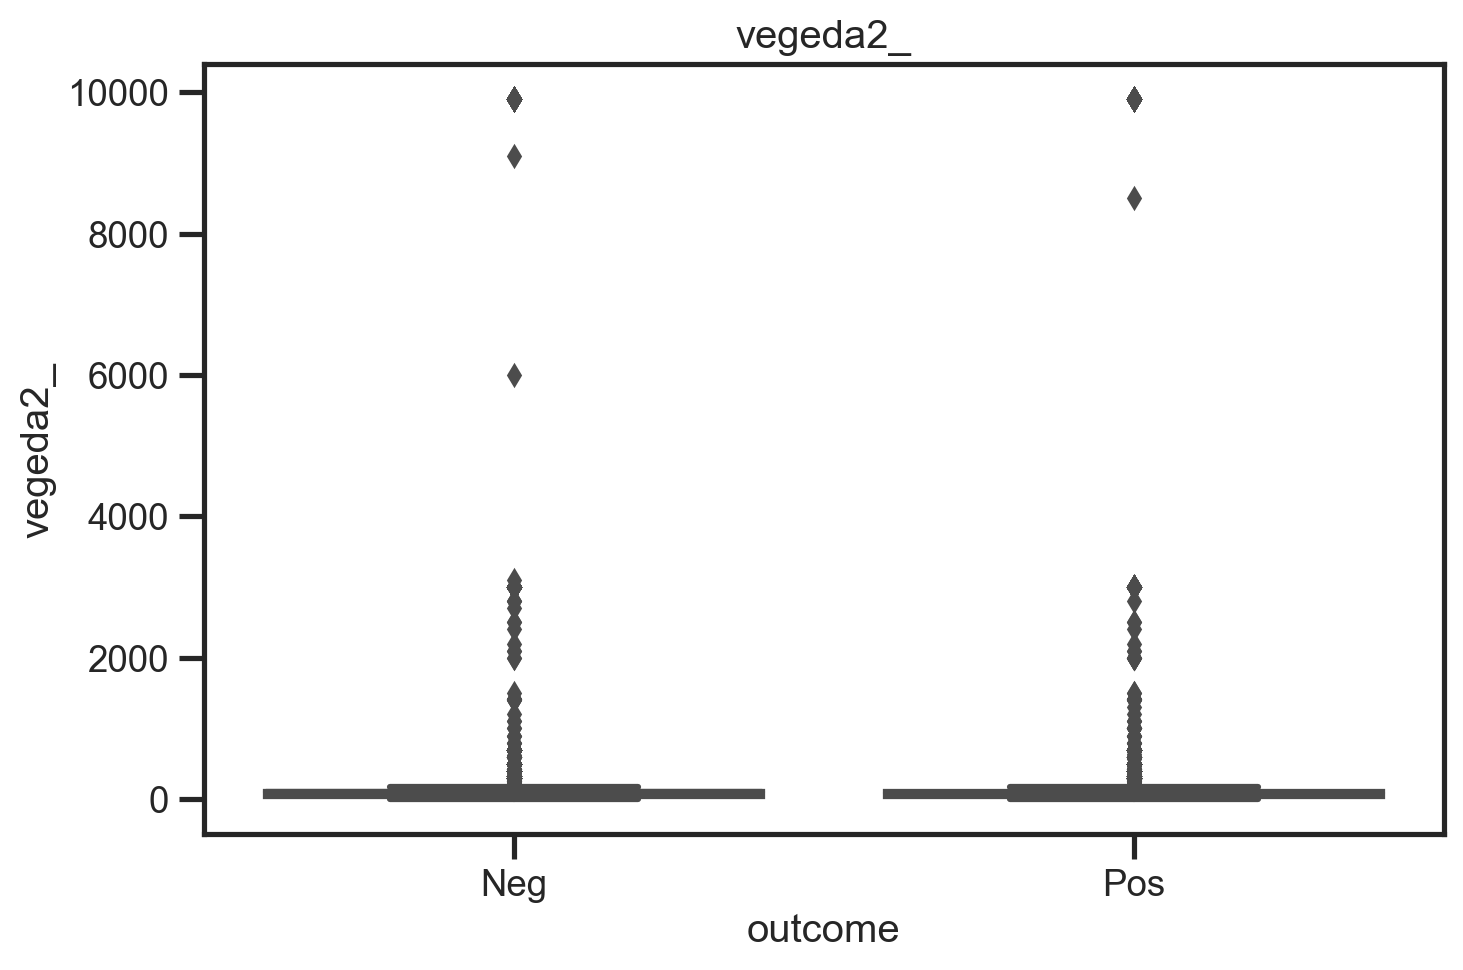

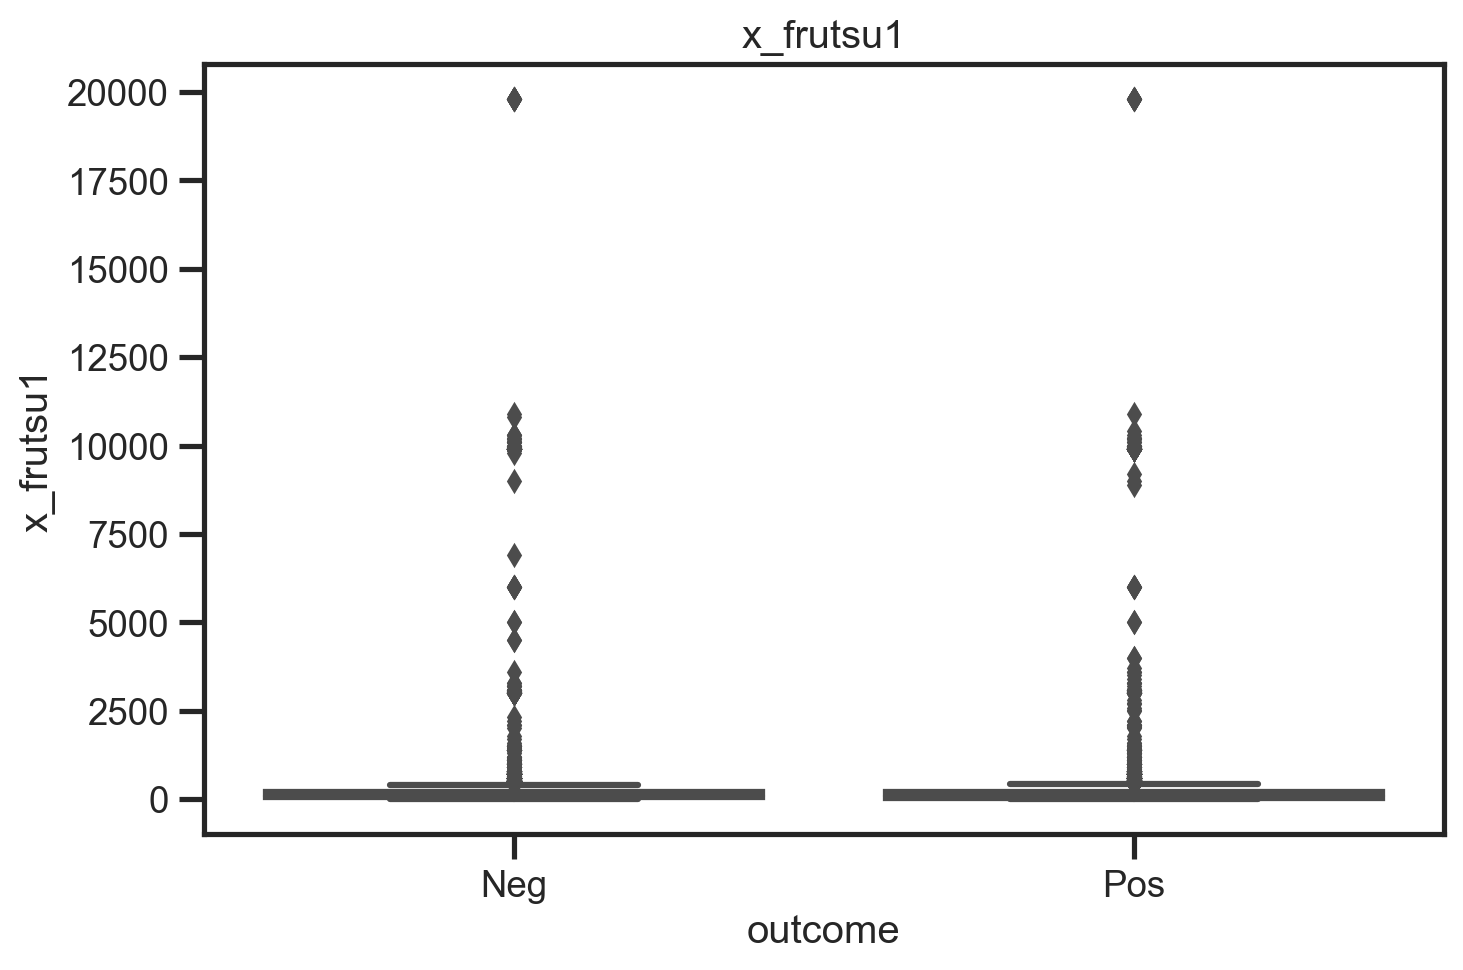

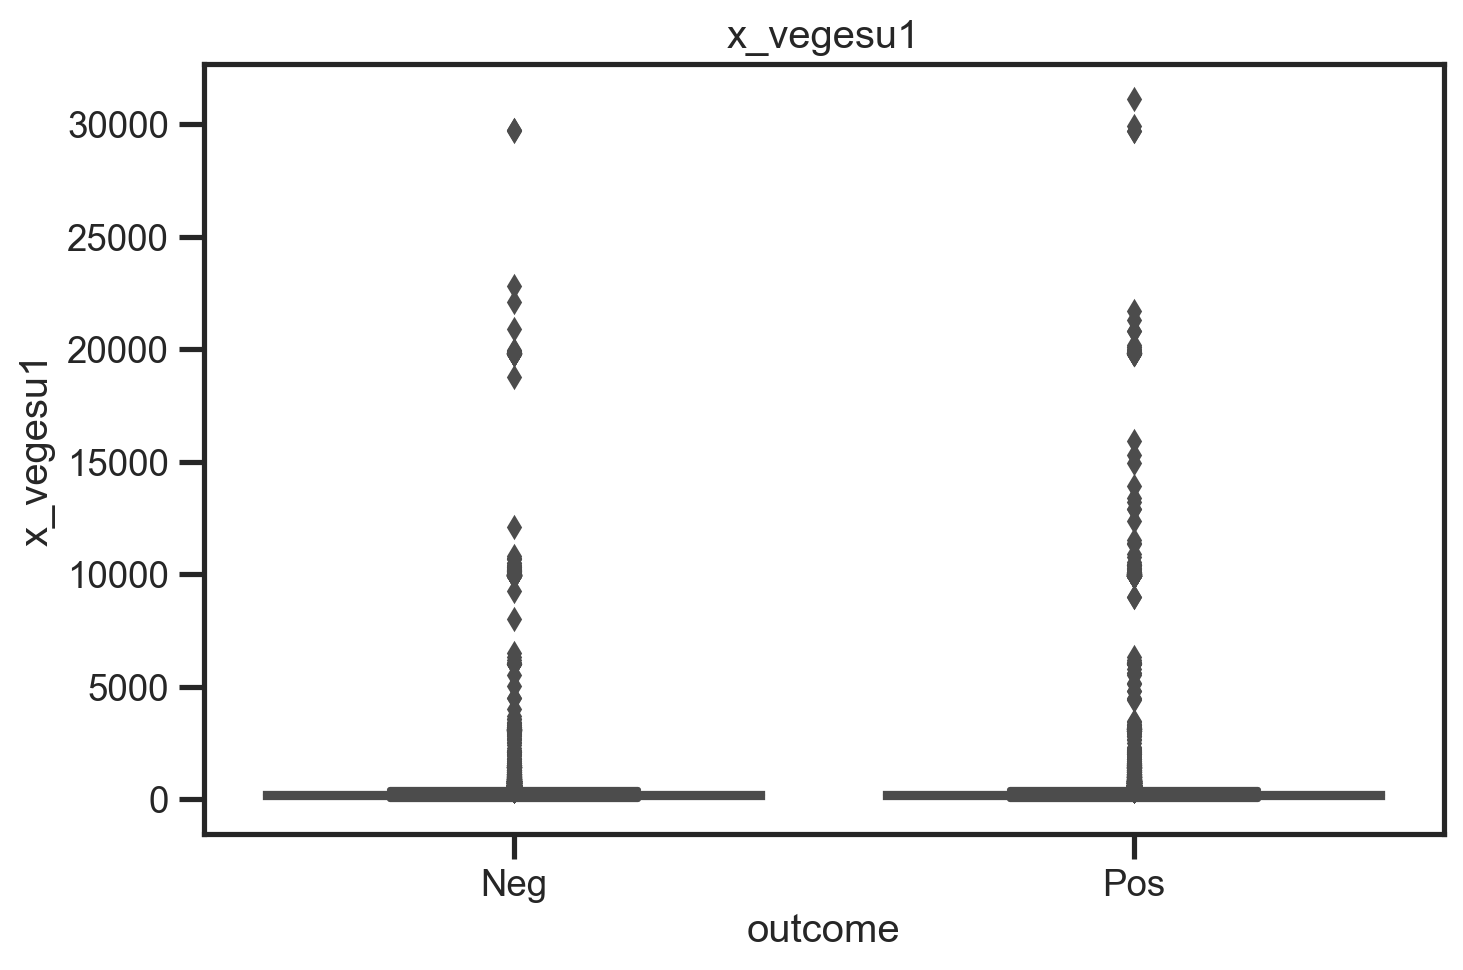

In [29]:
for i in train_data.columns[:-1]:
    plot_boxplot(train_data, i, 'outcome')

#### Handling outliers using InterQuartile Range

In [30]:
#lets impute the outliers in height, weight and bmi
def outliers(df, column):
    # Calculate the 25th and 75th percentiles (Q1 and Q3)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the median value
    median_value = df[column].median()
    df[column] = df[column].mask((df[column] < lower_bound) | (df[column] > upper_bound), median_value)


# Treating outliers on some continuous columns
outliers(train_data, 'x_rfbmi5')
outliers(train_data, 'x_bmi5cat')
outliers(train_data, 'height3')
outliers(train_data, 'weight2')
outliers(train_data, 'ftjuda2_')
outliers(train_data, 'frutda2_')
outliers(train_data, 'grenda1_')
outliers(train_data, 'frnchda_')
outliers(train_data, 'potada1_')
outliers(train_data, 'vegeda2_')
outliers(train_data, 'x_frutsu1')
outliers(train_data, 'x_vegesu1')

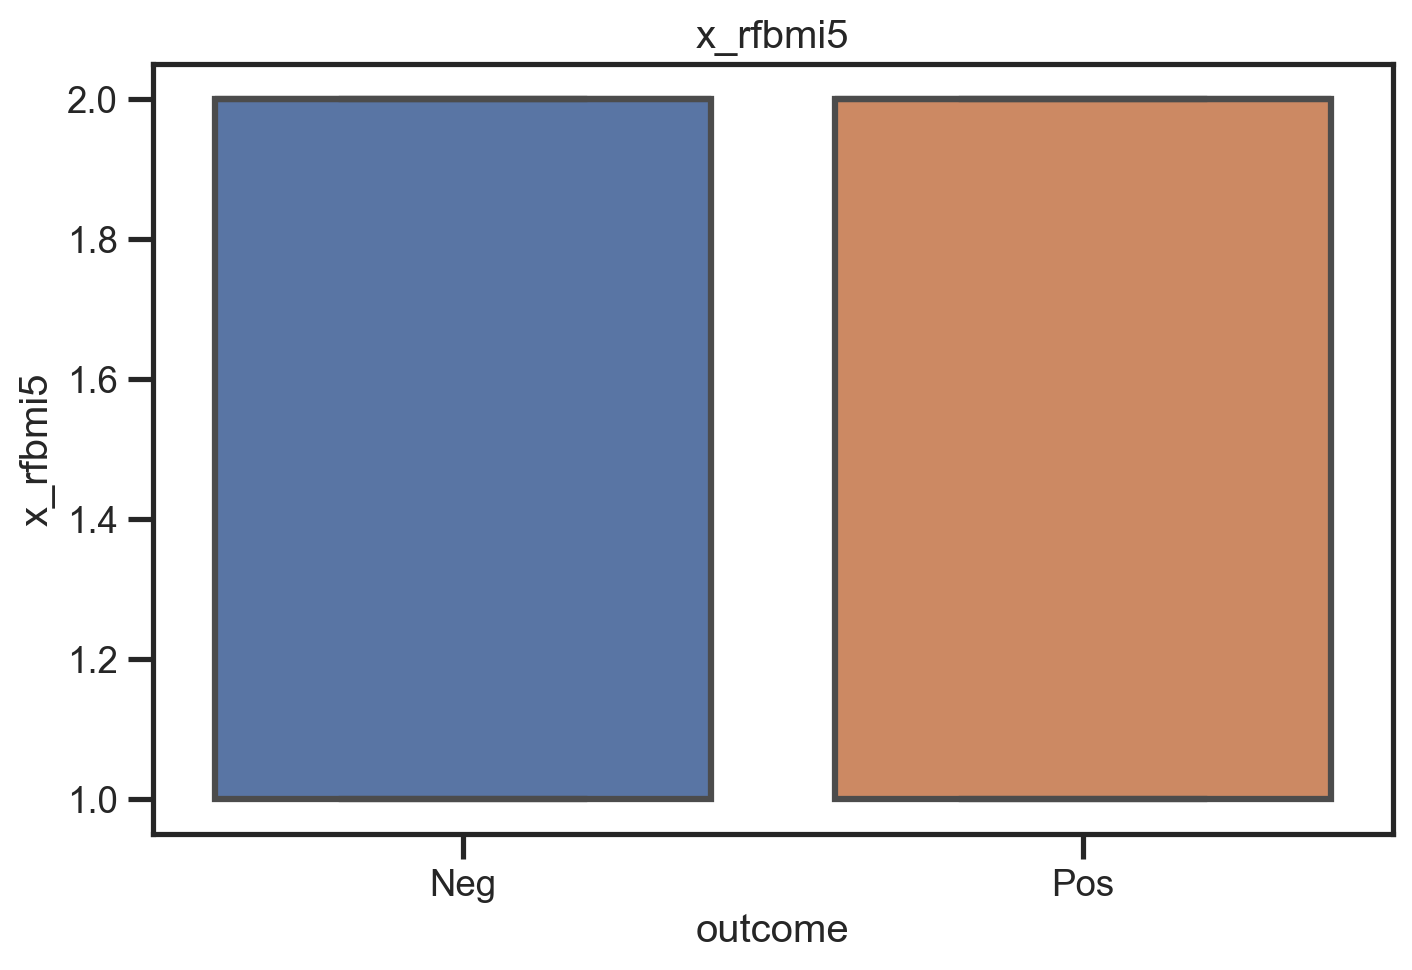

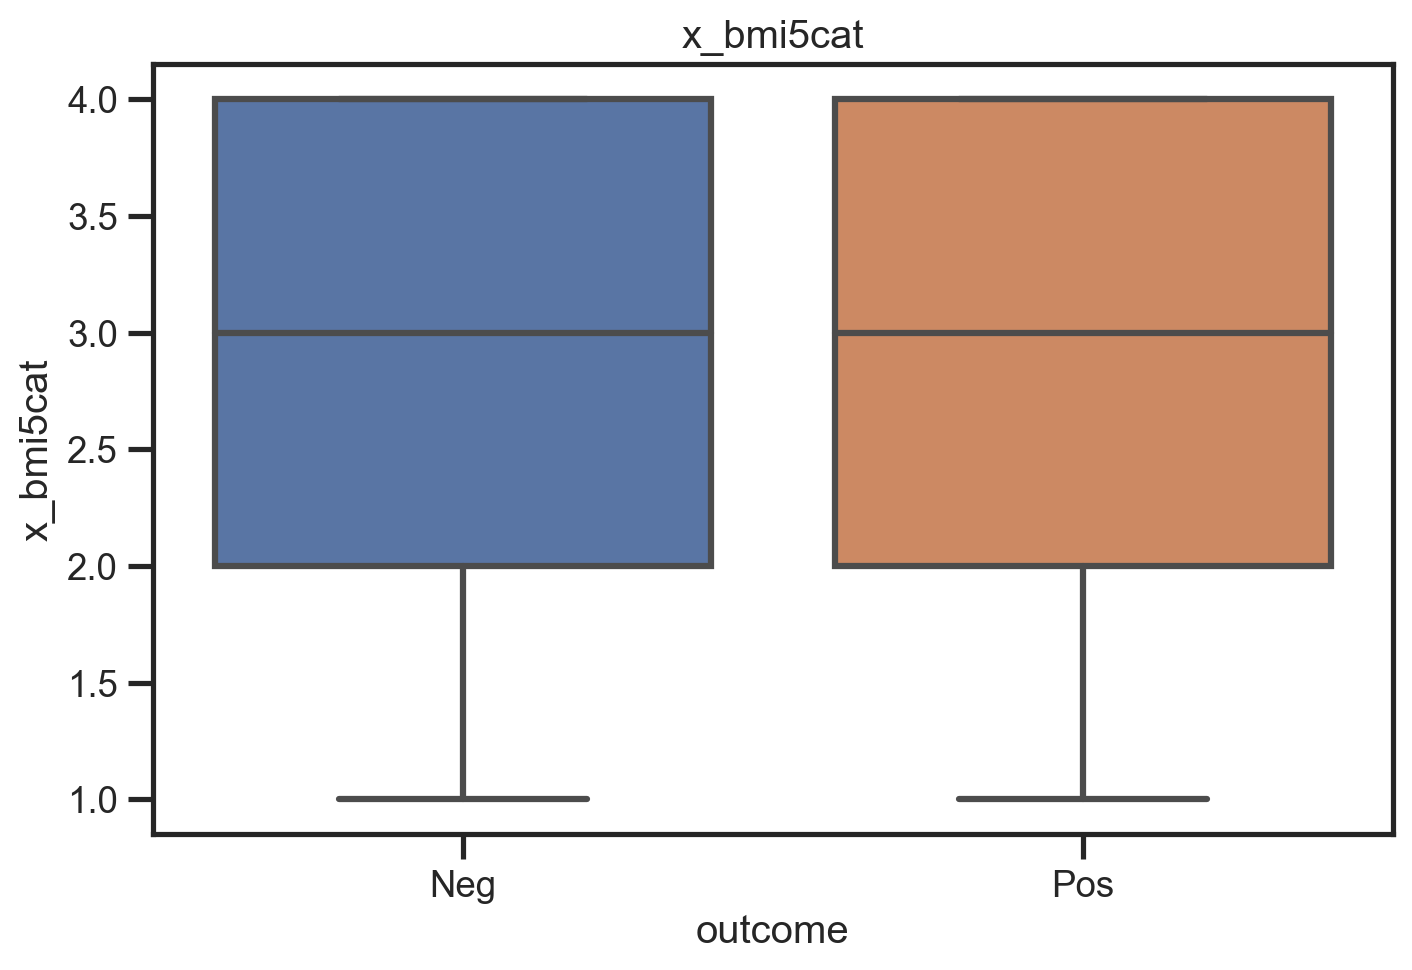

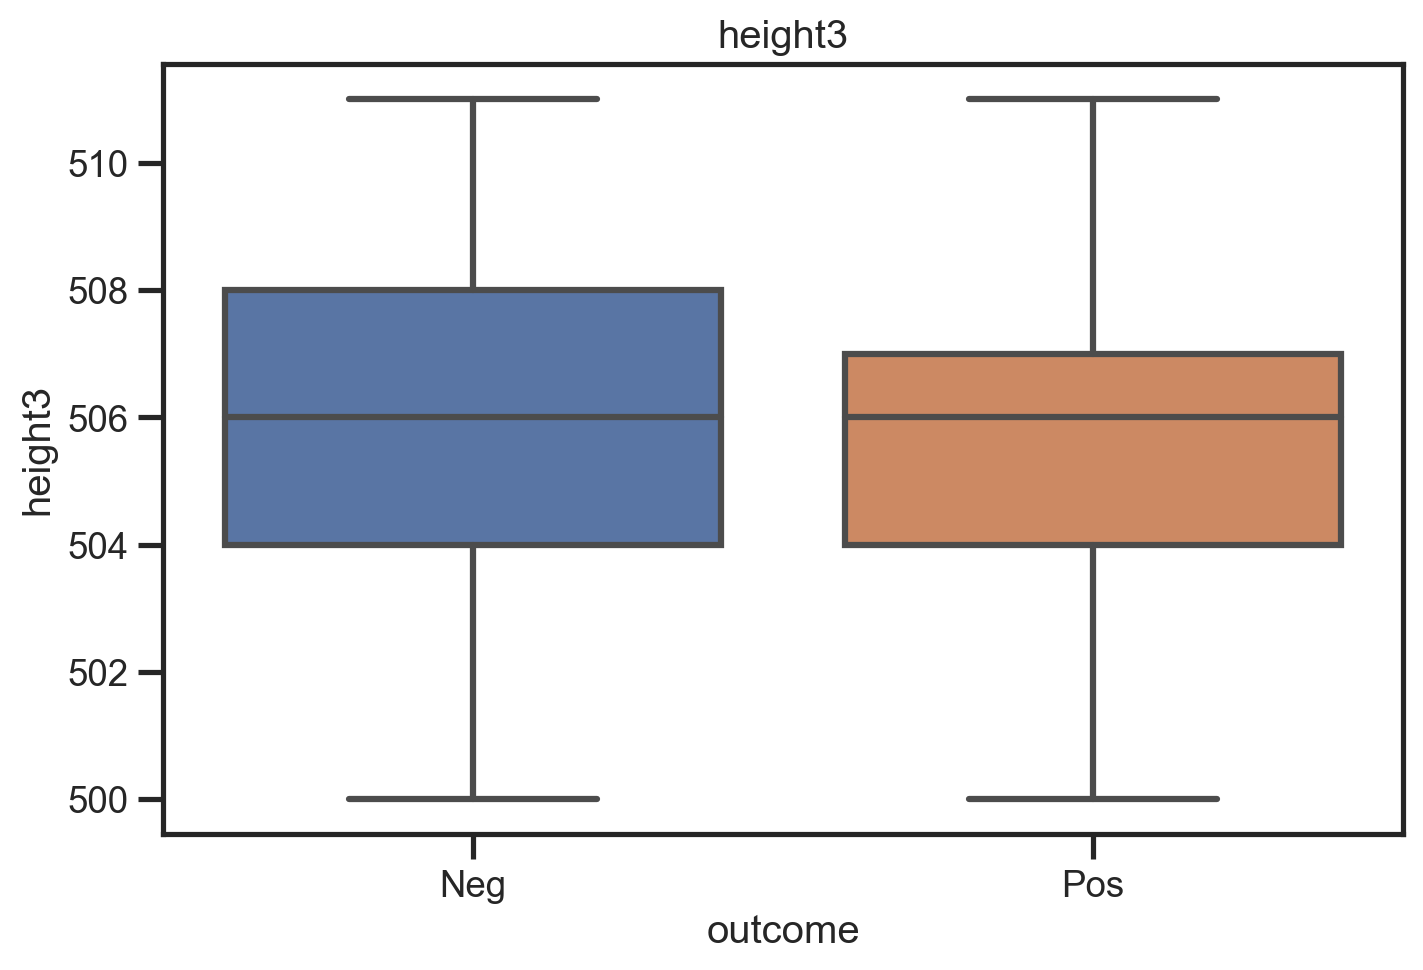

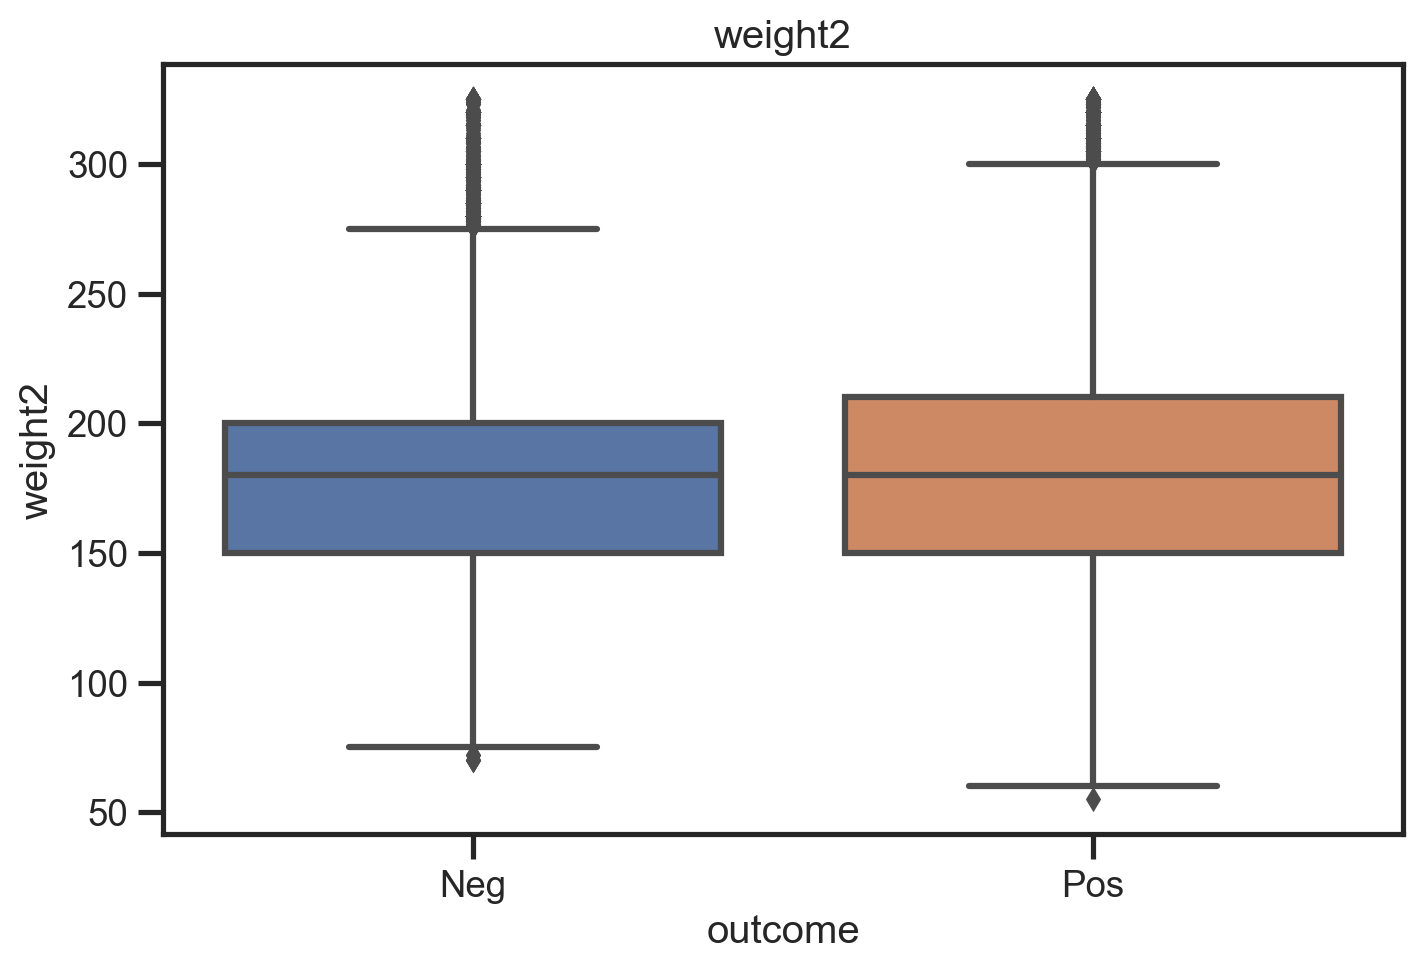

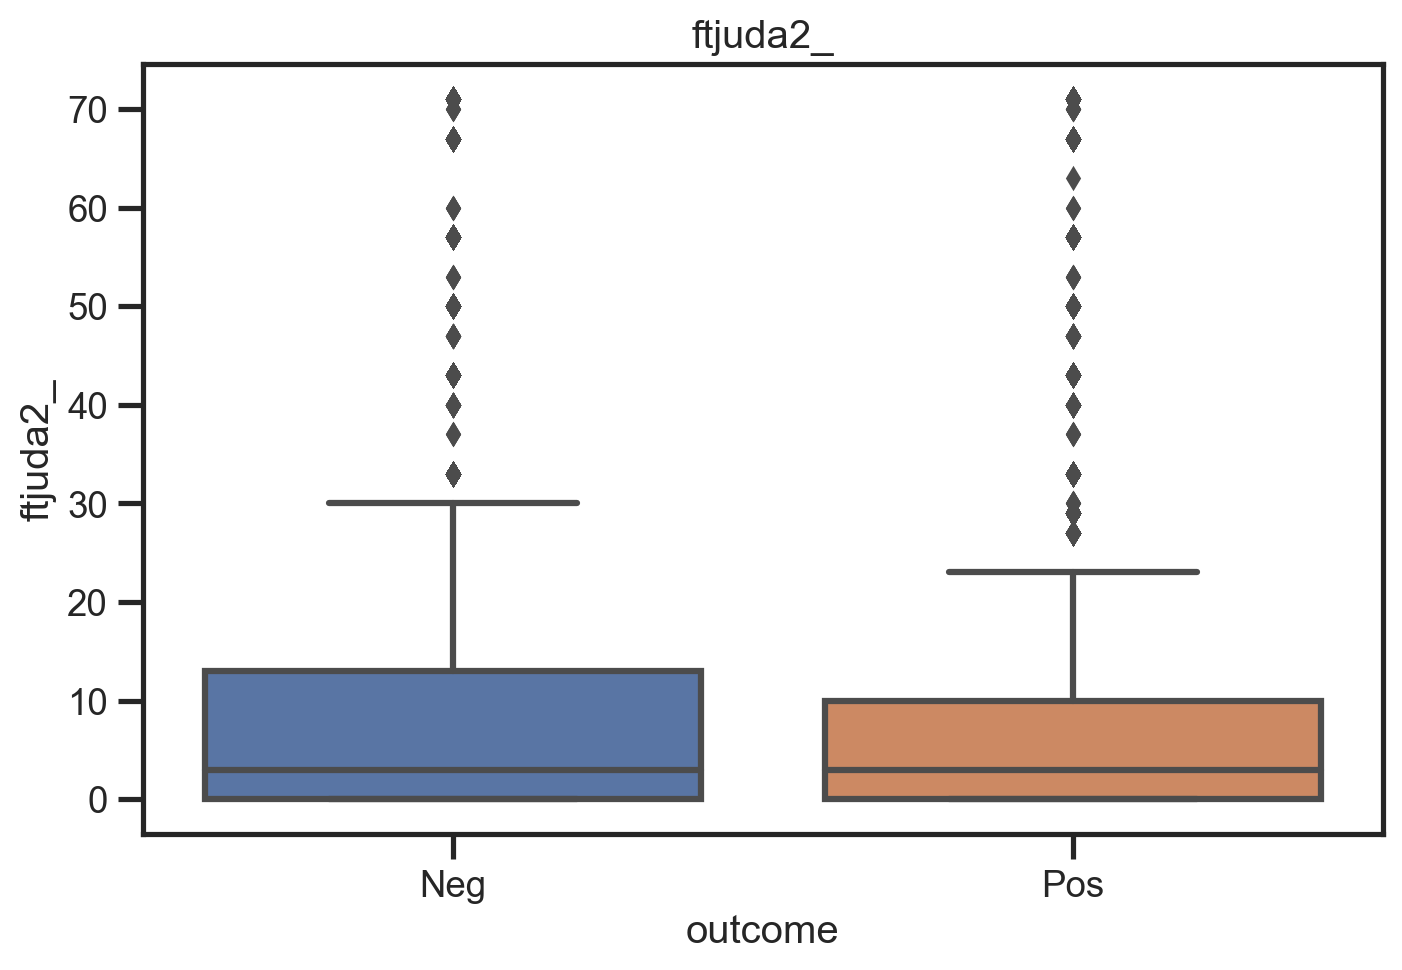

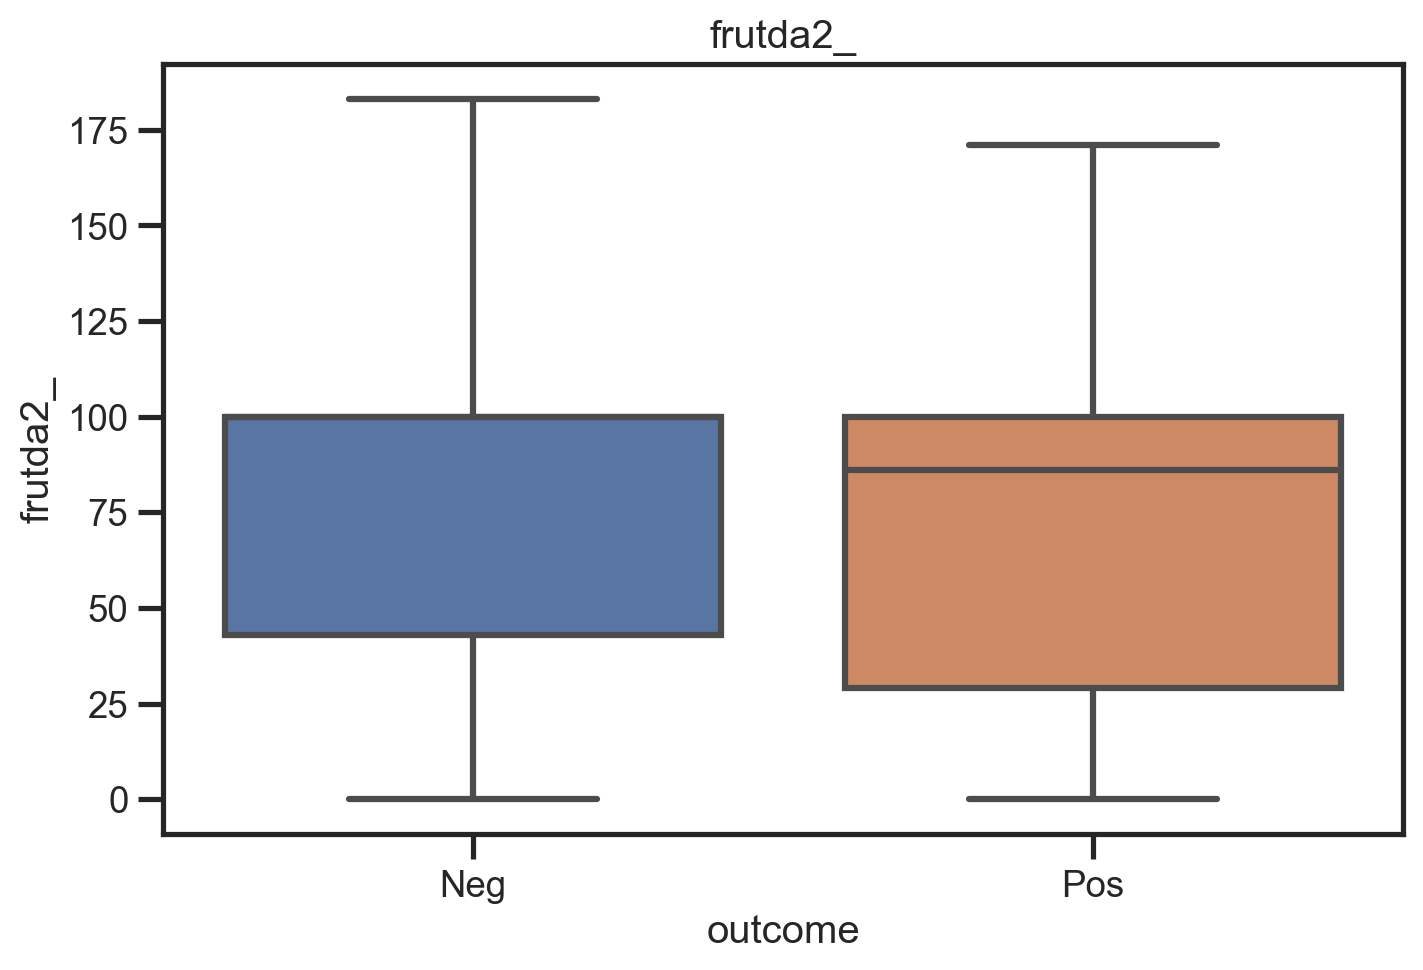

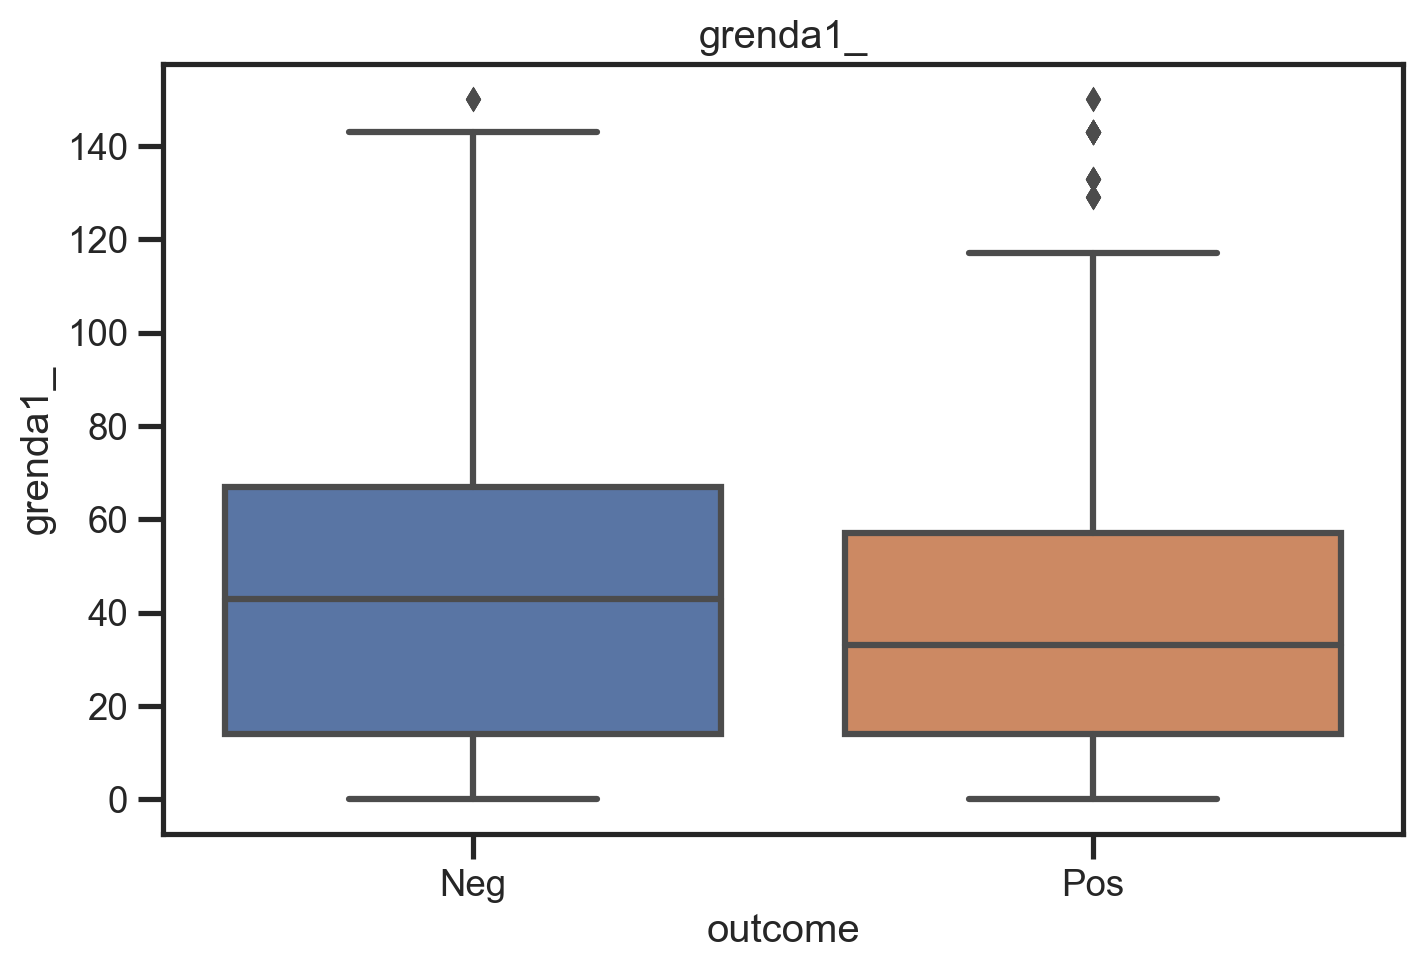

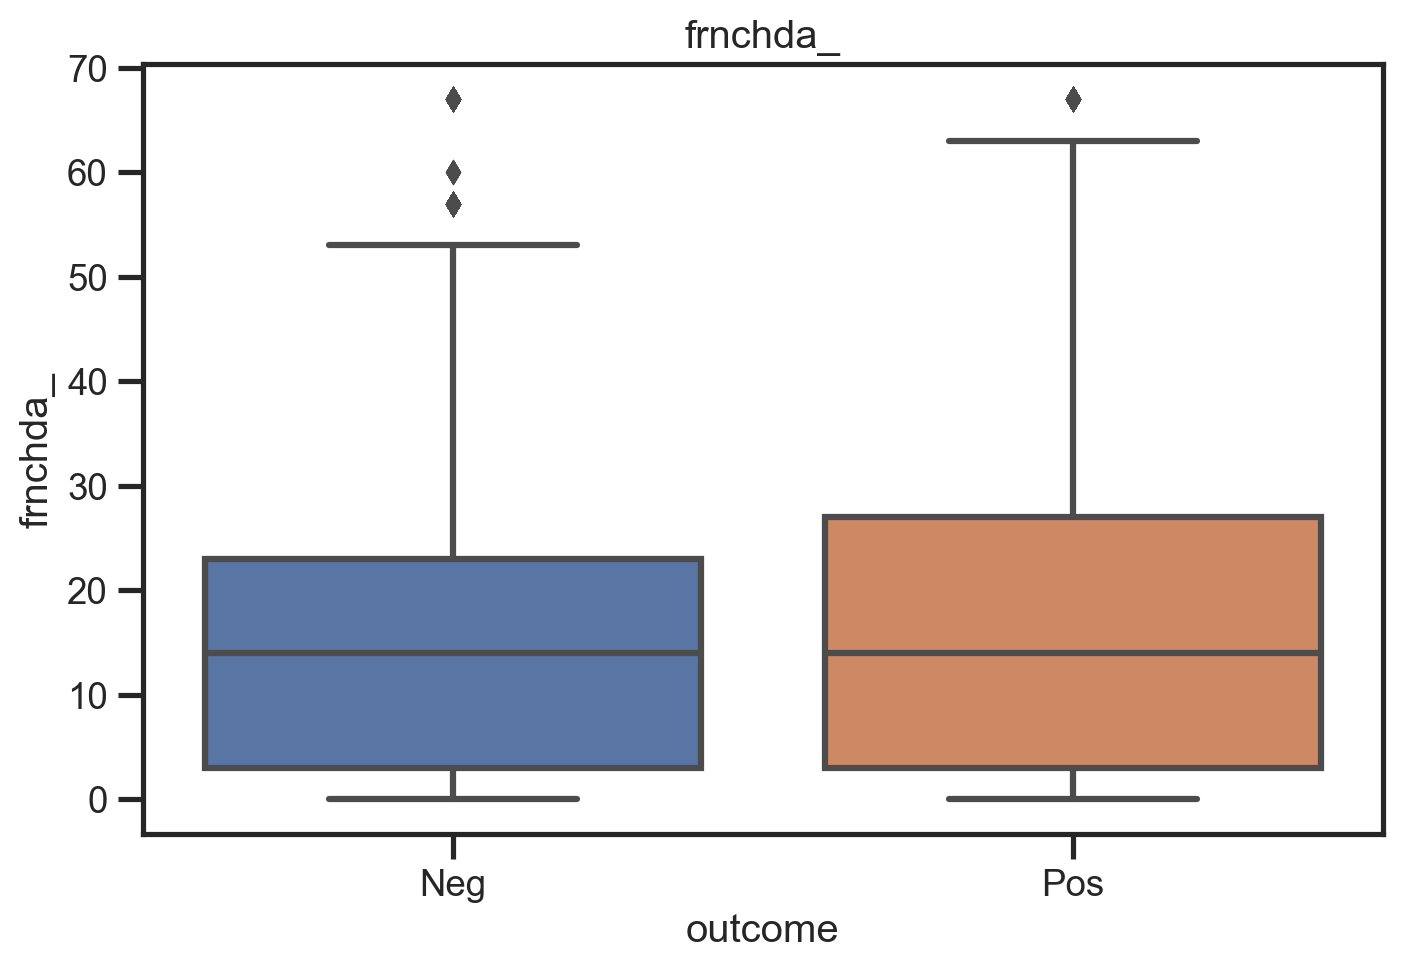

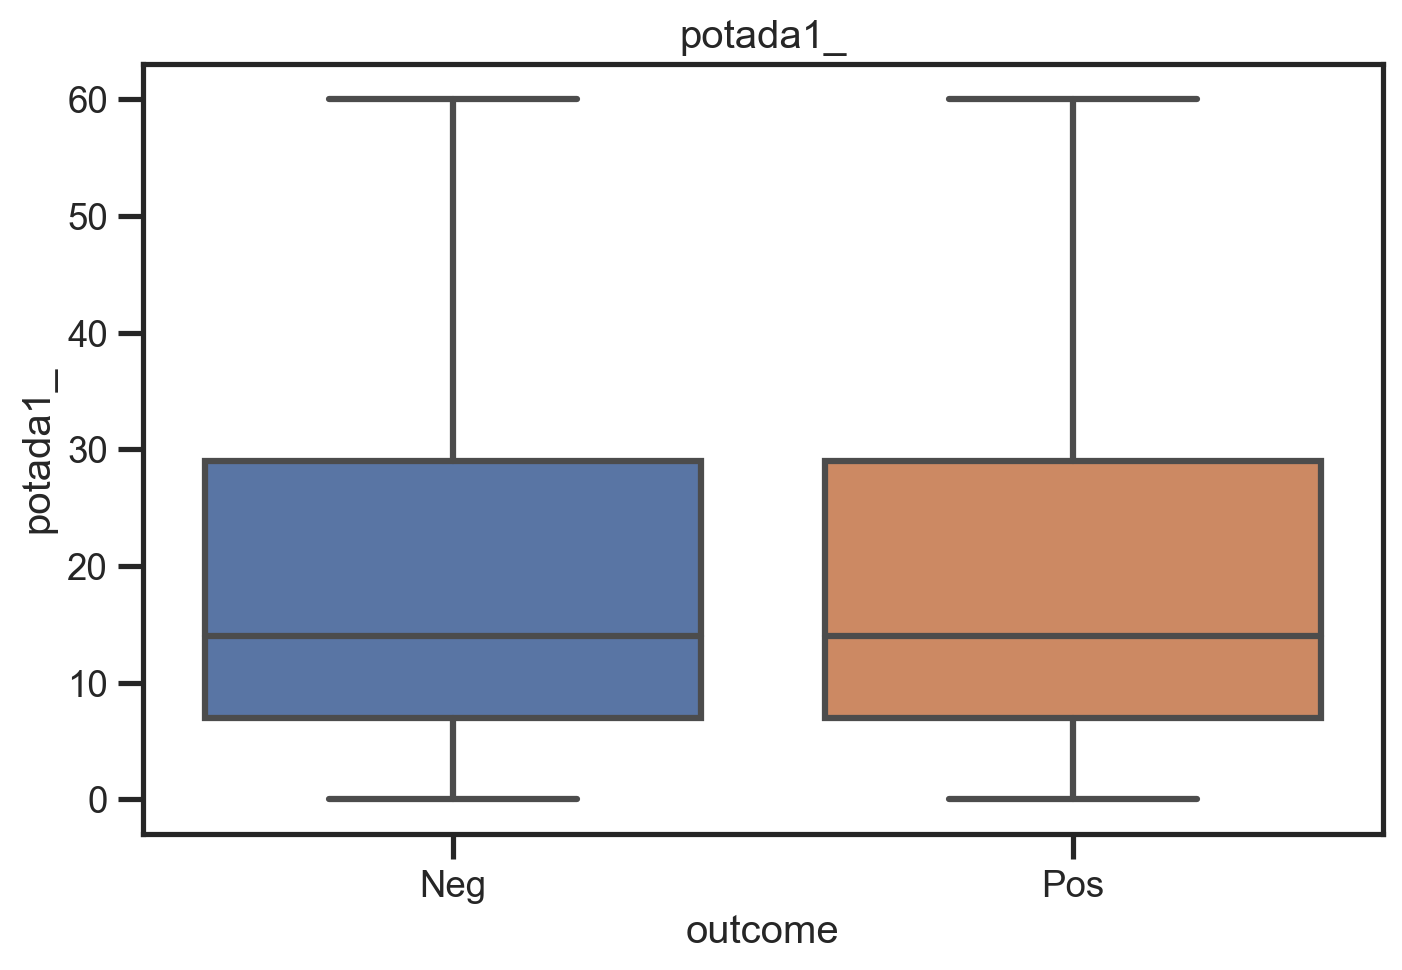

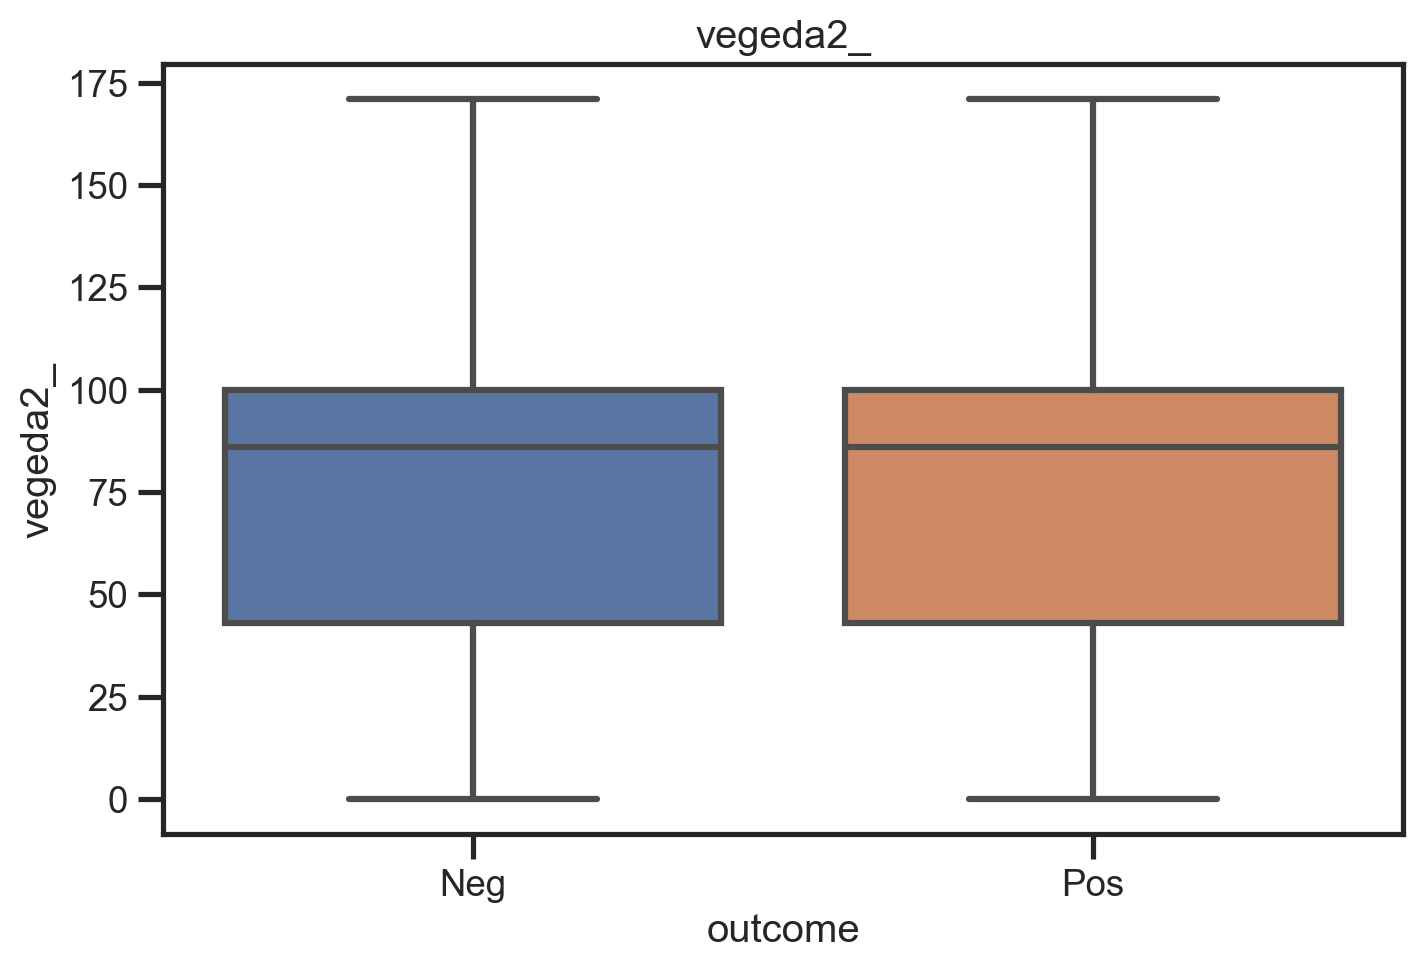

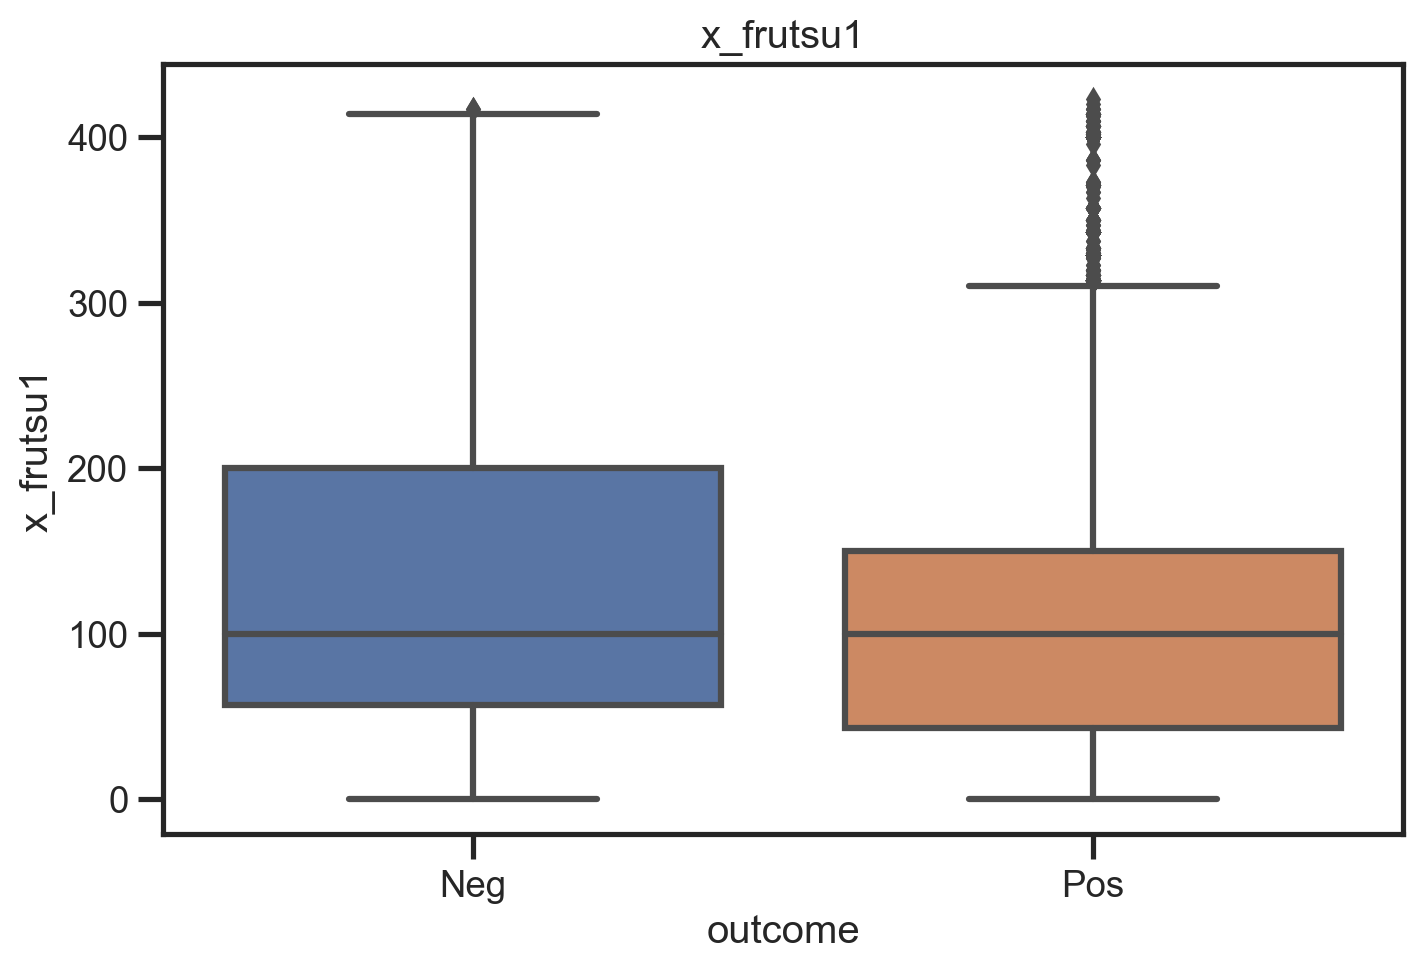

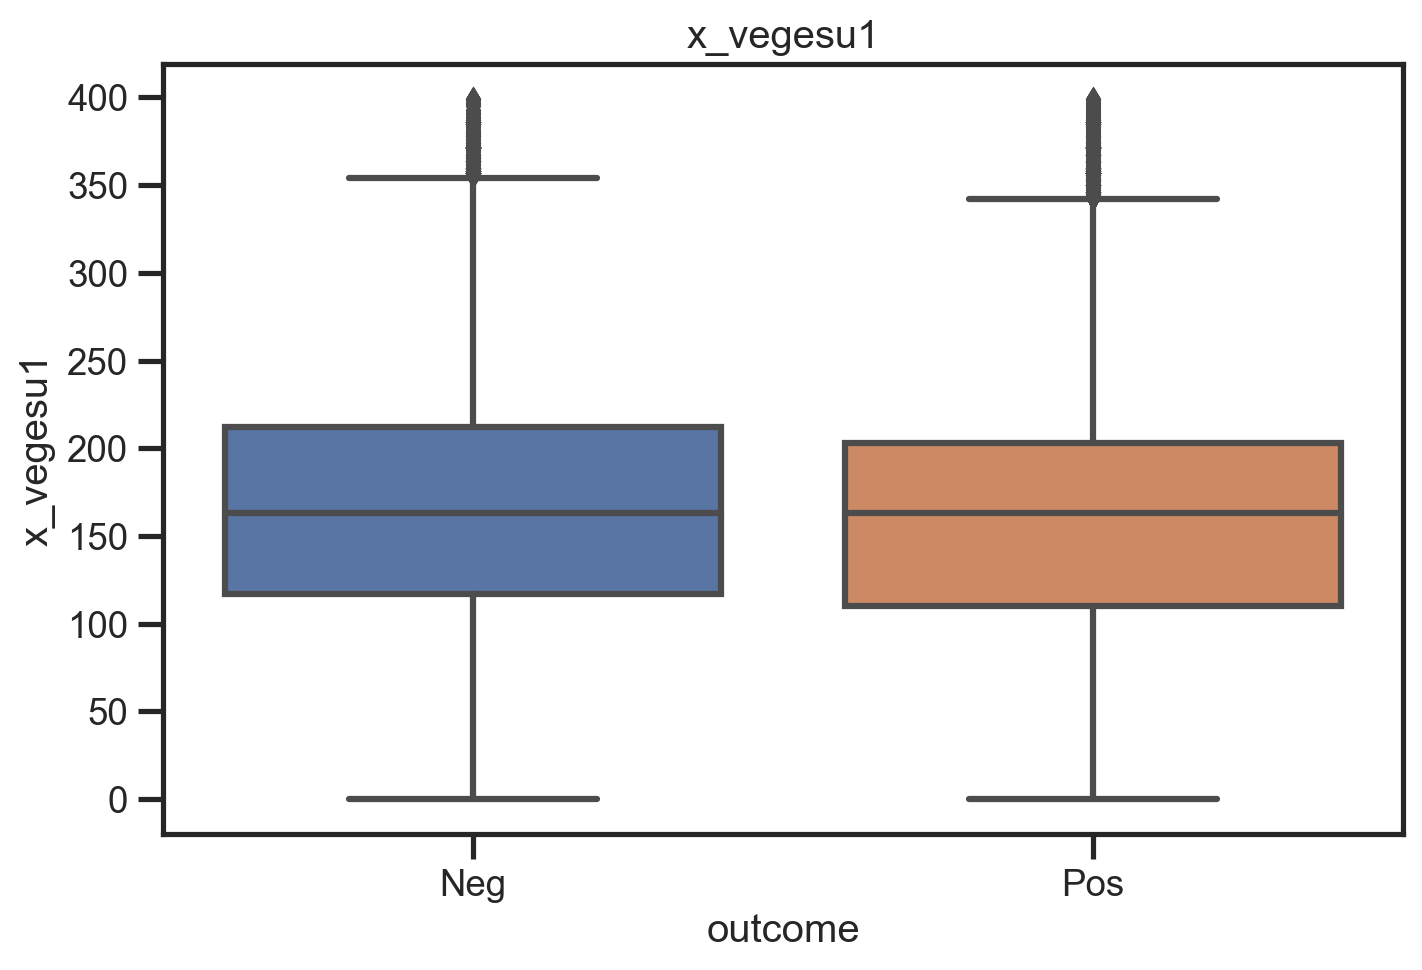

In [31]:
cols = ['x_rfbmi5', 'x_bmi5cat', 'height3', 'weight2', 'ftjuda2_', 'frutda2_', 'grenda1_', 'frnchda_', 'potada1_', 'vegeda2_', 'x_frutsu1', 'x_vegesu1']
for i in cols:
    plot_boxplot(train_data, i,'outcome')

In [32]:
# List of column names to delete
columns_to_delete = ['imonth', 'dispcode', 'sexvar']

# Delete the specified columns from the DataFrame
train_data.drop(columns=columns_to_delete, inplace=True)
train_data.shape

(65802, 65)

In [33]:
# List of columns considered as continuous
continuous_columns = ['x_state', 'iyear', 'x_rfbmi5', 'x_bmi5cat', 'height3', 'weight2', 'ftjuda2_', 'frutda2_', 'grenda1_', 'frnchda_', 'potada1_', 'vegeda2_', 'x_frutsu1', 'x_vegesu1']

# Filtering out the categorical columns
categorical_columns = train_data.columns[~train_data.columns.isin(continuous_columns)]

Replacing values such as 7,9,77,99 (not sure/refuse/missing) in the categorical column with the respective mode. It is to be noted that column X_AGE65YR has a value of 3 which means not_sure/refuse/missing. Also column X_INCOMG1 has a value of 7 but not equivalent to not_sure/refuse/missing

In [34]:
def standardize_values(df):
    """Standardize categorical column values.

    Args:
        df (pd.DataFrame): Dataframe containg the columns of interest

    Returns:
       df( (pd.DataFrame): A new dataframe

    """

    categorical_columns = df.columns[~df.columns.isin(continuous_columns)]
    # Calculate the mode of the X_AGE65YR column
    mode_value = df['x_age65yr'].mode().iloc[0]
    # Replace the 3 with the mode_value
    df['x_age65yr'] = df['x_age65yr'].replace(3, mode_value)

    # Calculate the mode of the X_INCOMG1 column
    mode_value = df['x_incomg1'].mode().iloc[0]
    # Replace the 3 with the mode_value
    df['x_incomg1'] = df['x_incomg1'].replace(9, mode_value)


    # List of columns for replacement (excluding 'X_INCOMG1')
    categorical_columns_to_replace = [col for col in categorical_columns if col != 'X_INCOMG1']

    # Target values to replace
    target_values = [7, 9, 77, 99]
    for column in categorical_columns_to_replace:
        # Calculate the mode for each column
        mode_value = df[column].mode().iloc[0]

        # Replace the target values with their respective mode values
        df[column] = df[column].replace(target_values, mode_value)
    
    return df


In [35]:
train_data = standardize_values(train_data)

In [36]:
train_data.shape

(65802, 65)

# Statistical Visualization

In [37]:
train_data[continuous_columns].describe()

x_state         iyear      x_rfbmi5     x_bmi5cat       height3  \
count  65802.000000  65802.000000  65802.000000  65802.000000  65802.000000   
mean      30.930747   2021.047689      1.726270      3.127185    505.796769   
std       15.280925      0.213108      0.445876      0.849780      2.779193   
min        1.000000   2021.000000      1.000000      1.000000    500.000000   
25%       20.000000   2021.000000      1.000000      2.000000    504.000000   
50%       31.000000   2021.000000      2.000000      3.000000    506.000000   
75%       42.000000   2021.000000      2.000000      4.000000    508.000000   
max       78.000000   2022.000000      2.000000      4.000000    511.000000   

            weight2      ftjuda2_      frutda2_      grenda1_      frnchda_  \
count  65802.000000  65802.000000  65802.000000  65802.000000  65802.000000   
mean     182.824078      8.956886     69.654403     41.972676     15.947768   
std       43.017374     15.283851     36.459375     32.416754     15.194925   
min       55.000000      0.000000      0.000000      0.000000      0.000000   
25%      150.000000      0.000000     43.000000     14.000000      3.000000   
50%      180.000000      3.000000    100.000000     43.000000     14.000000   
75%      206.000000     10.000000    100.000000     57.000000     27.000000   
max      325.000000     71.000000    183.000000    150.000000     67.000000   

           potada1_      vegeda2_     x_frutsu1     x_vegesu1  
count  65802.000000  65802.000000  65802.000000  65802.000000  
mean      17.000593     68.307559    118.285873    163.960077  
std       14.460892     33.142363     89.098115     75.277214  
min        0.000000      0.000000      0.000000      0.000000  
25%        7.000000     43.000000     50.000000    114.000000  
50%       14.000000     86.000000    100.000000    163.000000  
75%       29.000000    100.000000    183.000000    207.000000  
max       60.000000    171.000000    423.000000    399.000000

Data Skewness:
x_state      0.099793
iyear        4.245033
x_rfbmi5    -1.014976
x_bmi5cat   -0.400682
height3     -0.056118
weight2      0.617976
ftjuda2_     2.175603
frutda2_    -0.558671
grenda1_     0.598574
frnchda_     1.256931
potada1_     1.002692
vegeda2_    -0.587988
x_frutsu1    1.080740
x_vegesu1    0.420673
dtype: float64

Data Kurtosis:
x_state      -0.430312
iyear        16.020792
x_rfbmi5     -0.969852
x_bmi5cat    -1.113019
height3      -0.530515
weight2       0.284308
ftjuda2_      4.226406
frutda2_     -1.182566
grenda1_     -0.728854
frnchda_      1.066791
potada1_      0.316871
vegeda2_     -0.950272
x_frutsu1     0.838110
x_vegesu1     0.073169
dtype: float64



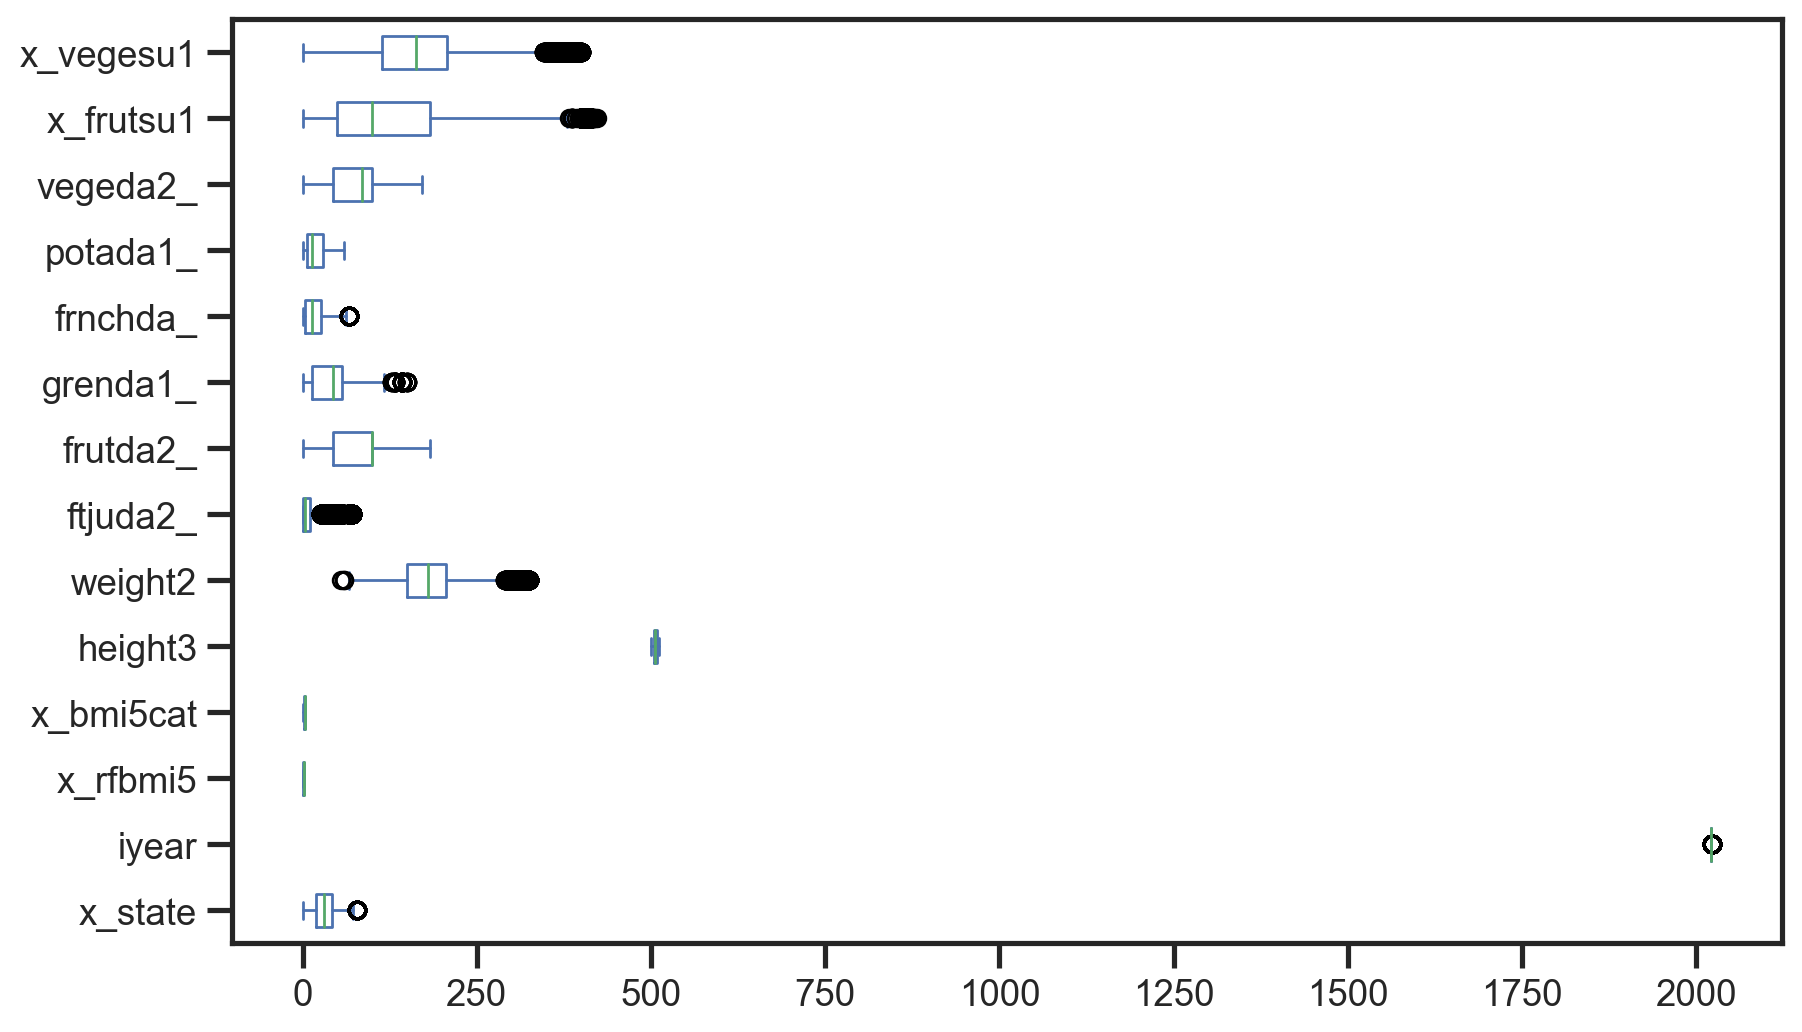

In [38]:
# Skewness of continous variables
continuous_var1 = train_data[continuous_columns]
print(f"Data Skewness:\n{continuous_var1.skew()}\n")

# Kurtosis of continous variables
print(f"Data Kurtosis:\n{continuous_var1.kurtosis()}\n")

# Boxplot of continuous variables
continuous_var1.plot.box(figsize=(10,6), vert = False, grid = False);

## **Correlation Analysis**

In [39]:
# Replace the object values ('Pos','Neg') in the Outcome column with integer (0,1)
train_data['outcome'] = train_data['outcome'].astype('category').cat.codes

# Display the updated value
train_data['outcome'].value_counts()

1    33335
0    32467
Name: outcome, dtype: int64

In [40]:
train_data.head()

x_state  iyear  persdoc3  medcost1  checkup1  toldhi3  cvdstrk3  chcscncr  \
0       29   2021         1       1.0         1      1.0         2         2   
1       28   2021         1       2.0         1      2.0         2         1   
2       19   2021         1       2.0         1      2.0         2         2   
3       27   2021         2       2.0         1      1.0         2         2   
4       50   2021         1       2.0         1      1.0         2         2   

   chcocncr  chccopd3  ...  x_aidtst4  ftjuda2_  frutda2_  grenda1_  frnchda_  \
0         2         1  ...        2.0       3.0      14.0     100.0       0.0   
1         2         1  ...        1.0       0.0     100.0      33.0      10.0   
2         2         2  ...        2.0       0.0      43.0       3.0       7.0   
3         2         2  ...        1.0       3.0       7.0      29.0      14.0   
4         2         2  ...        1.0       3.0     100.0      43.0      14.0   

   potada1_  vegeda2_  x_frutsu1  x_vegesu1  outcome  
0       0.0     100.0      100.0      200.0        0  
1      17.0     100.0      200.0      160.0        1  
2       2.0      14.0       43.0       26.0        0  
3      14.0      50.0       10.0      279.0        1  
4      14.0      86.0      100.0      163.0        1  

[5 rows x 65 columns]

<Axes: >

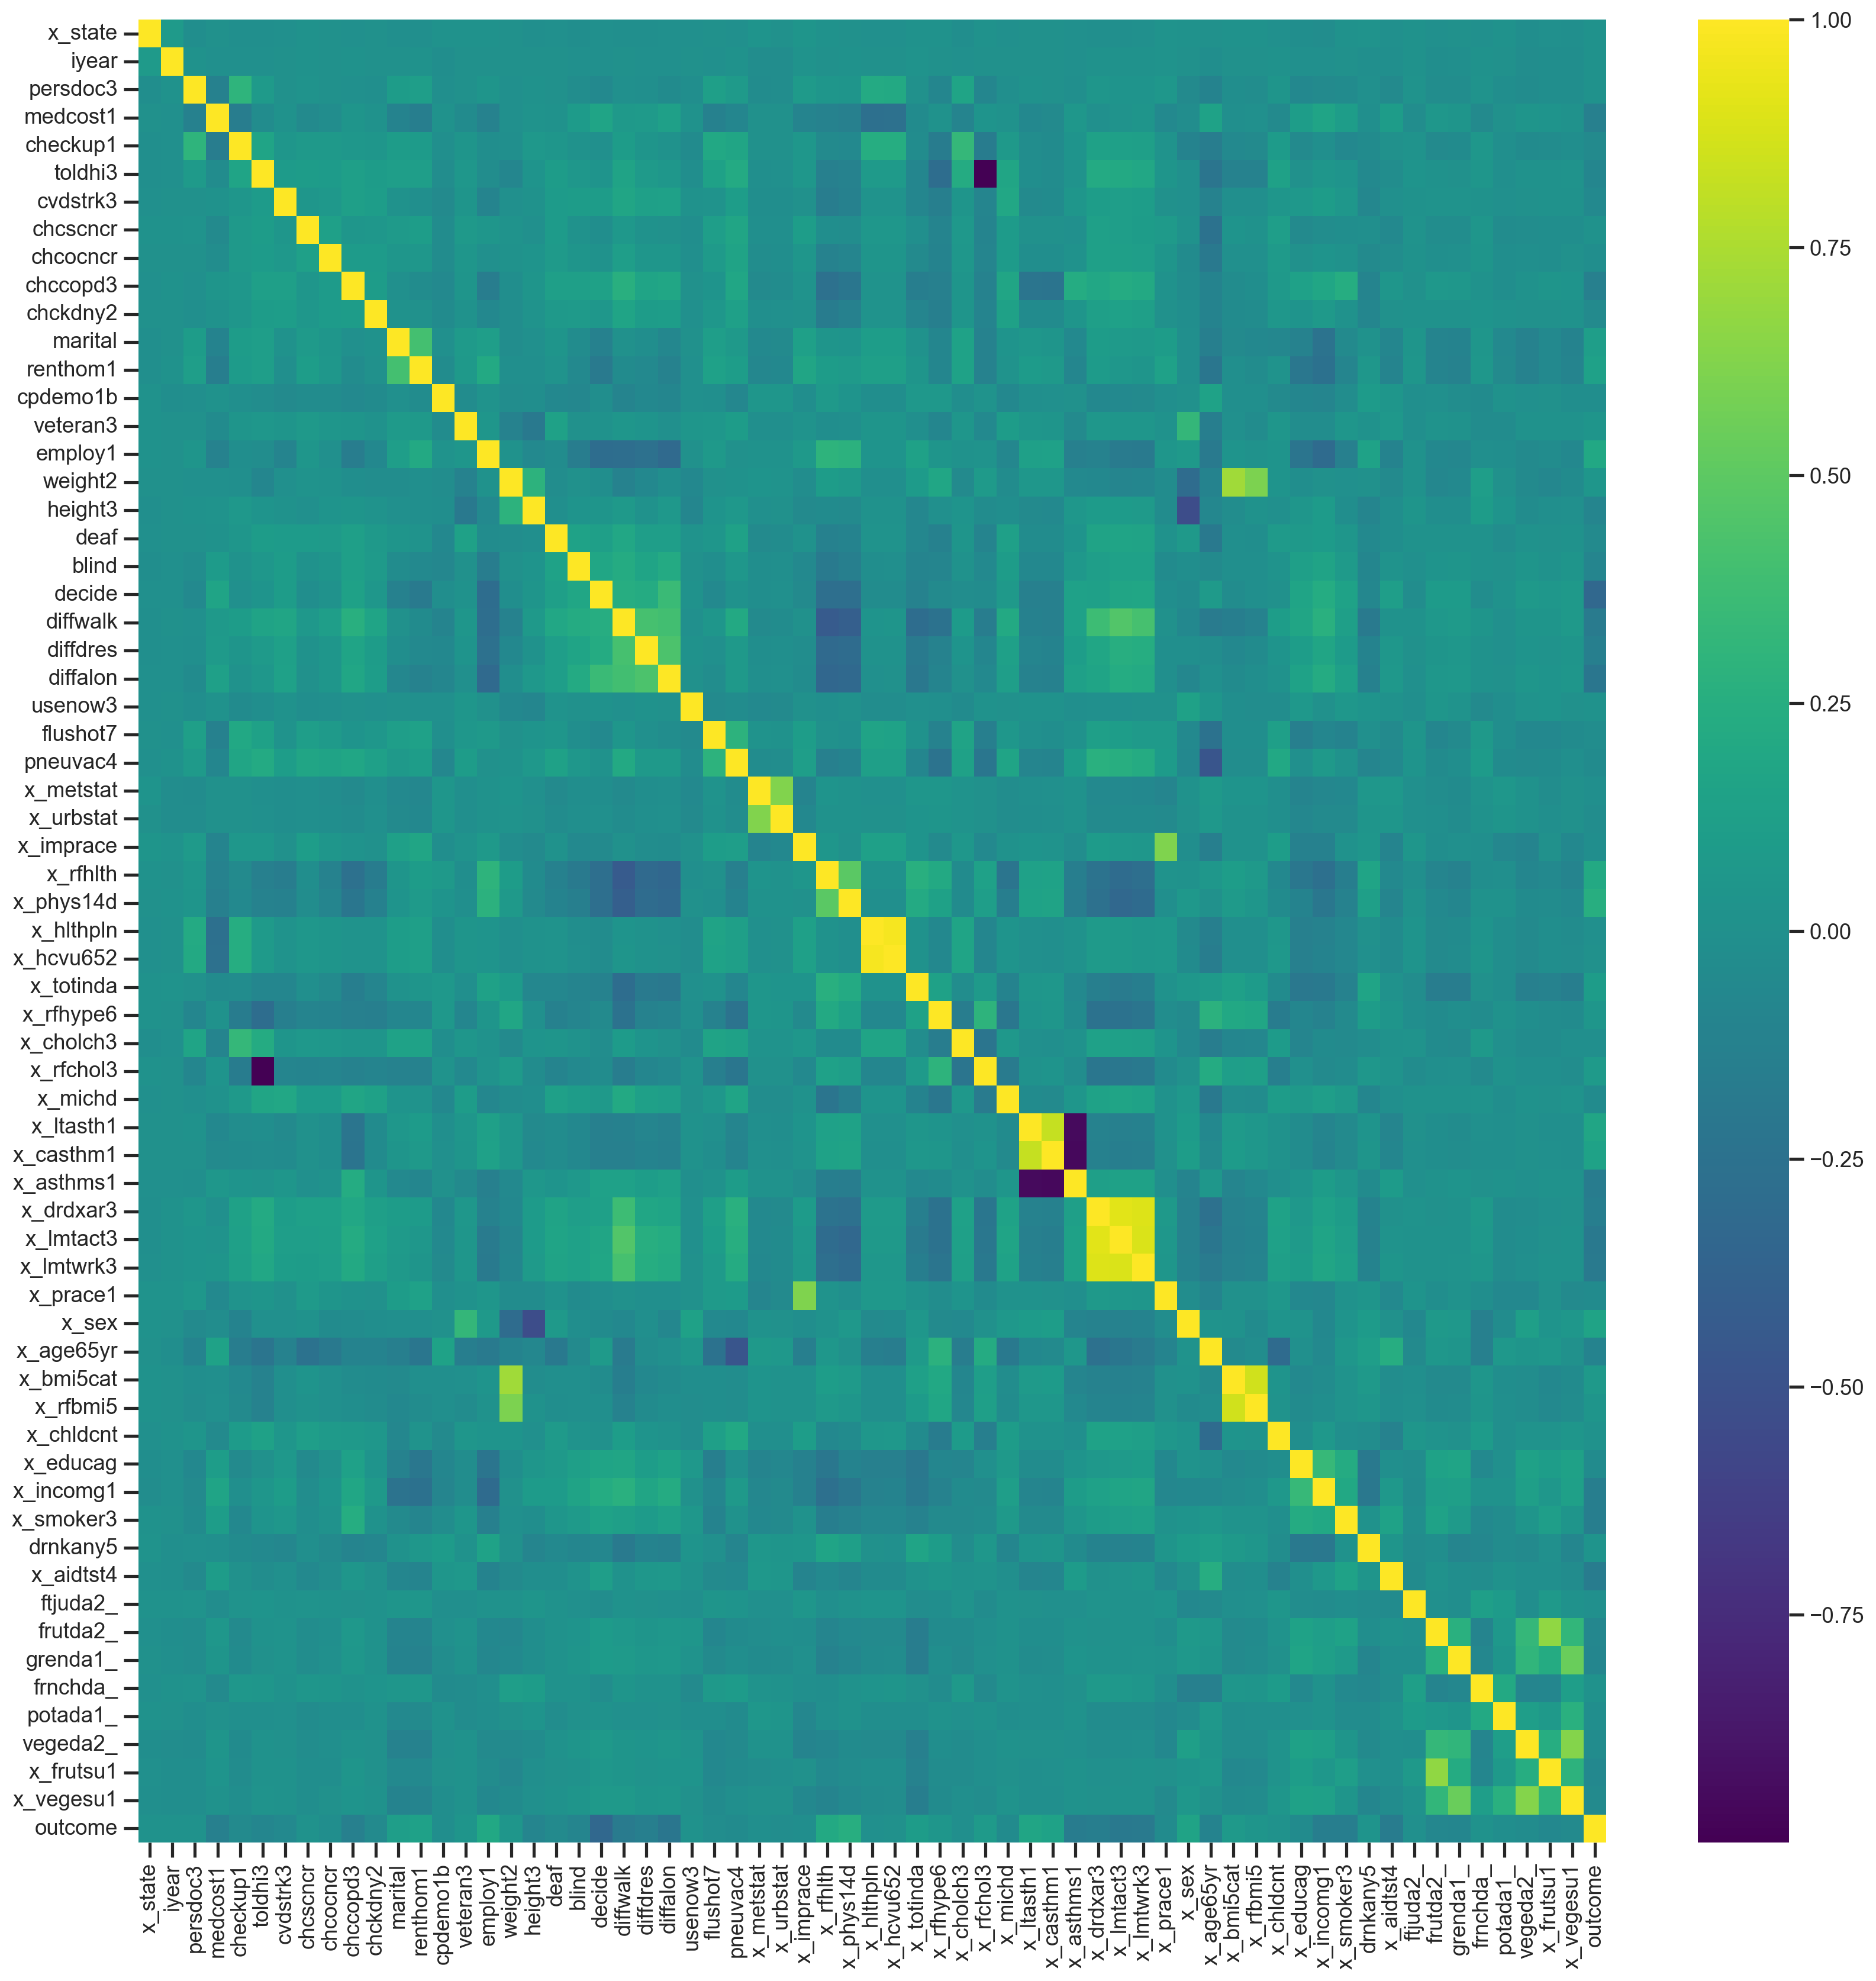

In [41]:
# features correlation
plt.figure(figsize=(20,20))
sns.heatmap(train_data.corr(), cmap='viridis')

In [42]:
# Compute the correlation between each variable and the target variable
correlations = abs(train_data.corr()['outcome'].drop('outcome'))

# Sort the correlation coefficients in descending order
correlations_sorted = correlations.sort_values(ascending=False)

print(correlations_sorted[0:20])

decide       0.331396
x_phys14d    0.256595
diffalon     0.212657
x_rfhlth     0.204986
employ1      0.196577
x_lmtact3    0.189147
x_lmtwrk3    0.184511
diffwalk     0.174653
x_ltasth1    0.173002
x_asthms1    0.170162
x_aidtst4    0.164758
x_sex        0.162362
x_casthm1    0.155979
x_smoker3    0.154460
x_incomg1    0.154368
x_drdxar3    0.149463
diffdres     0.141727
renthom1     0.140169
medcost1     0.139947
chccopd3     0.136167
Name: outcome, dtype: float64


## **Feature Selection and Standardization**

In [43]:
from sklearn.feature_selection import RFE, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [44]:
# features(X) and target(y) selection for train data
X = train_data.drop(['outcome'], axis=1)
y = train_data['outcome']

In [45]:
# import data scaling package
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
scaled_X = scaler.fit_transform(X)

### Recursive Feature Selection (RFE)

In [46]:
# Recursive Feature Selection (RFE)

def rfe_feature_selection(features, target, n_features_to_select):
    model = LogisticRegression()
    rfe = RFE(model, n_features_to_select=n_features_to_select)
    X_new = rfe.fit_transform(features, target)
    selected_features = np.array(X.columns)[rfe.support_]
    return X_new, selected_features.tolist()

# RFE
X_rfe, selected_features_rfe = rfe_feature_selection(scaled_X, y, n_features_to_select=50)
print("Recursive Feature Selection (RFE):","\n", selected_features_rfe)

Recursive Feature Selection (RFE): 
 ['x_state', 'medcost1', 'checkup1', 'toldhi3', 'chccopd3', 'marital', 'renthom1', 'cpdemo1b', 'employ1', 'weight2', 'height3', 'deaf', 'decide', 'diffwalk', 'diffalon', 'usenow3', 'flushot7', 'pneuvac4', 'x_urbstat', 'x_imprace', 'x_rfhlth', 'x_phys14d', 'x_hcvu652', 'x_rfhype6', 'x_rfchol3', 'x_ltasth1', 'x_casthm1', 'x_asthms1', 'x_drdxar3', 'x_lmtact3', 'x_lmtwrk3', 'x_prace1', 'x_sex', 'x_age65yr', 'x_bmi5cat', 'x_rfbmi5', 'x_chldcnt', 'x_educag', 'x_incomg1', 'x_smoker3', 'drnkany5', 'x_aidtst4', 'ftjuda2_', 'frutda2_', 'grenda1_', 'frnchda_', 'potada1_', 'vegeda2_', 'x_frutsu1', 'x_vegesu1']


### Feature Selection by Gradient Boosting Feature Importance

In [47]:
# Feature Importance from Gradient Boosting
def gradient_boosting_feature_importance(X, y):
    model = GradientBoostingClassifier(random_state=100)
    model.fit(X, y)
    importance = pd.Series(model.feature_importances_, X.columns)
    importance =  importance.sort_values(ascending=False)[0:50]
    return importance.index.tolist()

# Gradient Boosting Feature Importance
importance_gb = gradient_boosting_feature_importance(X, y)
print(f"Gradient Boosting Feature Importance:\n{importance_gb}")

Gradient Boosting Feature Importance:
['decide', 'x_phys14d', 'x_sex', 'x_aidtst4', 'x_ltasth1', 'x_lmtact3', 'x_age65yr', 'x_smoker3', 'x_imprace', 'diffalon', 'marital', 'renthom1', 'weight2', 'x_rfhlth', 'employ1', 'medcost1', 'x_prace1', 'toldhi3', 'flushot7', 'x_lmtwrk3', 'x_rfchol3', 'grenda1_', 'x_educag', 'x_frutsu1', 'x_state', 'checkup1', 'chccopd3', 'persdoc3', 'x_incomg1', 'x_drdxar3', 'drnkany5', 'x_chldcnt', 'x_urbstat', 'x_bmi5cat', 'potada1_', 'x_vegesu1', 'x_hlthpln', 'cpdemo1b', 'x_rfhype6', 'pneuvac4', 'x_totinda', 'frutda2_', 'vegeda2_', 'diffdres', 'deaf', 'diffwalk', 'usenow3', 'frnchda_', 'veteran3', 'x_cholch3']


### Selecting Most Relevant Features

In [48]:
# find common features selected by RFE and GB
intersection = list(set(selected_features_rfe).intersection(importance_gb))
print(intersection)

['x_frutsu1', 'drnkany5', 'toldhi3', 'x_smoker3', 'marital', 'frnchda_', 'deaf', 'cpdemo1b', 'checkup1', 'x_vegesu1', 'x_drdxar3', 'x_rfchol3', 'x_chldcnt', 'x_imprace', 'x_lmtact3', 'diffalon', 'renthom1', 'x_state', 'x_rfhlth', 'diffwalk', 'x_lmtwrk3', 'vegeda2_', 'medcost1', 'usenow3', 'x_educag', 'x_rfhype6', 'potada1_', 'x_incomg1', 'employ1', 'x_urbstat', 'decide', 'x_aidtst4', 'x_phys14d', 'frutda2_', 'x_sex', 'grenda1_', 'flushot7', 'x_ltasth1', 'chccopd3', 'x_age65yr', 'weight2', 'x_prace1', 'pneuvac4', 'x_bmi5cat']


In [49]:
# Get the columns (features) that are in the intersection list
newX = train_data[train_data.columns[train_data.columns.isin(intersection)]]

# Standardized the selected features
scaled_newX = scaler.fit_transform(newX)

# Display the head of the resulting DataFrame
newX.head()

x_state  medcost1  checkup1  toldhi3  chccopd3  marital  renthom1  \
0       29       1.0         1      1.0         1        4         2   
1       28       2.0         1      2.0         1        1         1   
2       19       2.0         1      2.0         2        5         2   
3       27       2.0         1      1.0         2        4         2   
4       50       2.0         1      1.0         2        2         1   

   cpdemo1b  employ1  weight2  ...  x_smoker3  drnkany5  x_aidtst4  frutda2_  \
0       1.0      8.0    214.0  ...          3         2        2.0      14.0   
1       1.0      1.0    313.0  ...          4         1        1.0     100.0   
2       1.0      3.0    300.0  ...          4         2        2.0      43.0   
3       1.0      3.0    258.0  ...          4         2        1.0       7.0   
4       2.0      1.0    150.0  ...          4         1        1.0     100.0   

   grenda1_  frnchda_  potada1_  vegeda2_  x_frutsu1  x_vegesu1  
0     100.0       0.0       0.0     100.0      100.0      200.0  
1      33.0      10.0      17.0     100.0      200.0      160.0  
2       3.0       7.0       2.0      14.0       43.0       26.0  
3      29.0      14.0      14.0      50.0       10.0      279.0  
4      43.0      14.0      14.0      86.0      100.0      163.0  

[5 rows x 44 columns]

## **Data Split: 80% Training set, 20% Testing set**

In [50]:
from sklearn.model_selection import train_test_split

seed = 1234
X_train, X_test, y_train, y_test = train_test_split(scaled_newX,y,test_size=0.2, random_state=seed)

print("Number of X train samples:",X_train.shape[0], "and number of y train samples :", y_train.shape[0])
print("Number of X test samples:",X_test.shape[0], "and number of y test samples :", y_test.shape[0])

Number of X train samples: 52641 and number of y train samples : 52641
Number of X test samples: 13161 and number of y test samples : 13161


## **Model Building and Evaluation**

In [51]:
# import feature importance package
from sklearn.inspection import permutation_importance

### **Logistic Regression (LR)**

In [52]:
# import logistics regression package
# from sklearn.linear_model import LogisticRegression

# Create and train the logistic regression model
LR = LogisticRegression(random_state=seed)
LR.fit(X_train,y_train)

# Make predictions on the test set
y_pred_LR = LR.predict(X_test)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_LR))

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.76      0.72      6455
           1       0.74      0.67      0.70      6706

    accuracy                           0.71     13161
   macro avg       0.71      0.71      0.71     13161
weighted avg       0.72      0.71      0.71     13161



### **Logistics Regression Hyperparameters Tuning With GridSearch**

In [53]:
# define hyparameters for logistic regression
hyperparameters = {'solver': ['liblinear', 'lbfgs'],
                   'C': [0.01, 0.1, 1.0]
                  }

# Create the grid search object
GS_LR = GridSearchCV(LR, hyperparameters, cv=5)

In [54]:
# fitting the data
GS_LR.fit(X_train, y_train)

# display best hyparameters for logistic regression
best_LR = GS_LR.best_estimator_
print(GS_LR.best_params_, '\n')

# predicting the test data with the best hyperparameters
y_pred_LR = best_LR.predict(X_test)

{'C': 0.01, 'solver': 'lbfgs'} 



### **Logistic Regression Model Accuracy Evaluation**

In [55]:
# import logistics regression package
# from sklearn.linear_model import LogisticRegression

# Create and train the logistic regression model
LR = LogisticRegression(C=0.01, solver='lbfgs', random_state=seed)
LR.fit(X_train,y_train)

# Make predictions on the test set
y_pred_LR = LR.predict(X_test)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_LR))

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.76      0.72      6455
           1       0.74      0.67      0.70      6706

    accuracy                           0.71     13161
   macro avg       0.71      0.71      0.71     13161
weighted avg       0.72      0.71      0.71     13161



              precision    recall  f1-score   support

           0       0.69      0.76      0.72      6455
           1       0.74      0.67      0.70      6706

    accuracy                           0.71     13161
   macro avg       0.71      0.71      0.71     13161
weighted avg       0.72      0.71      0.71     13161

f1 score: 0.71


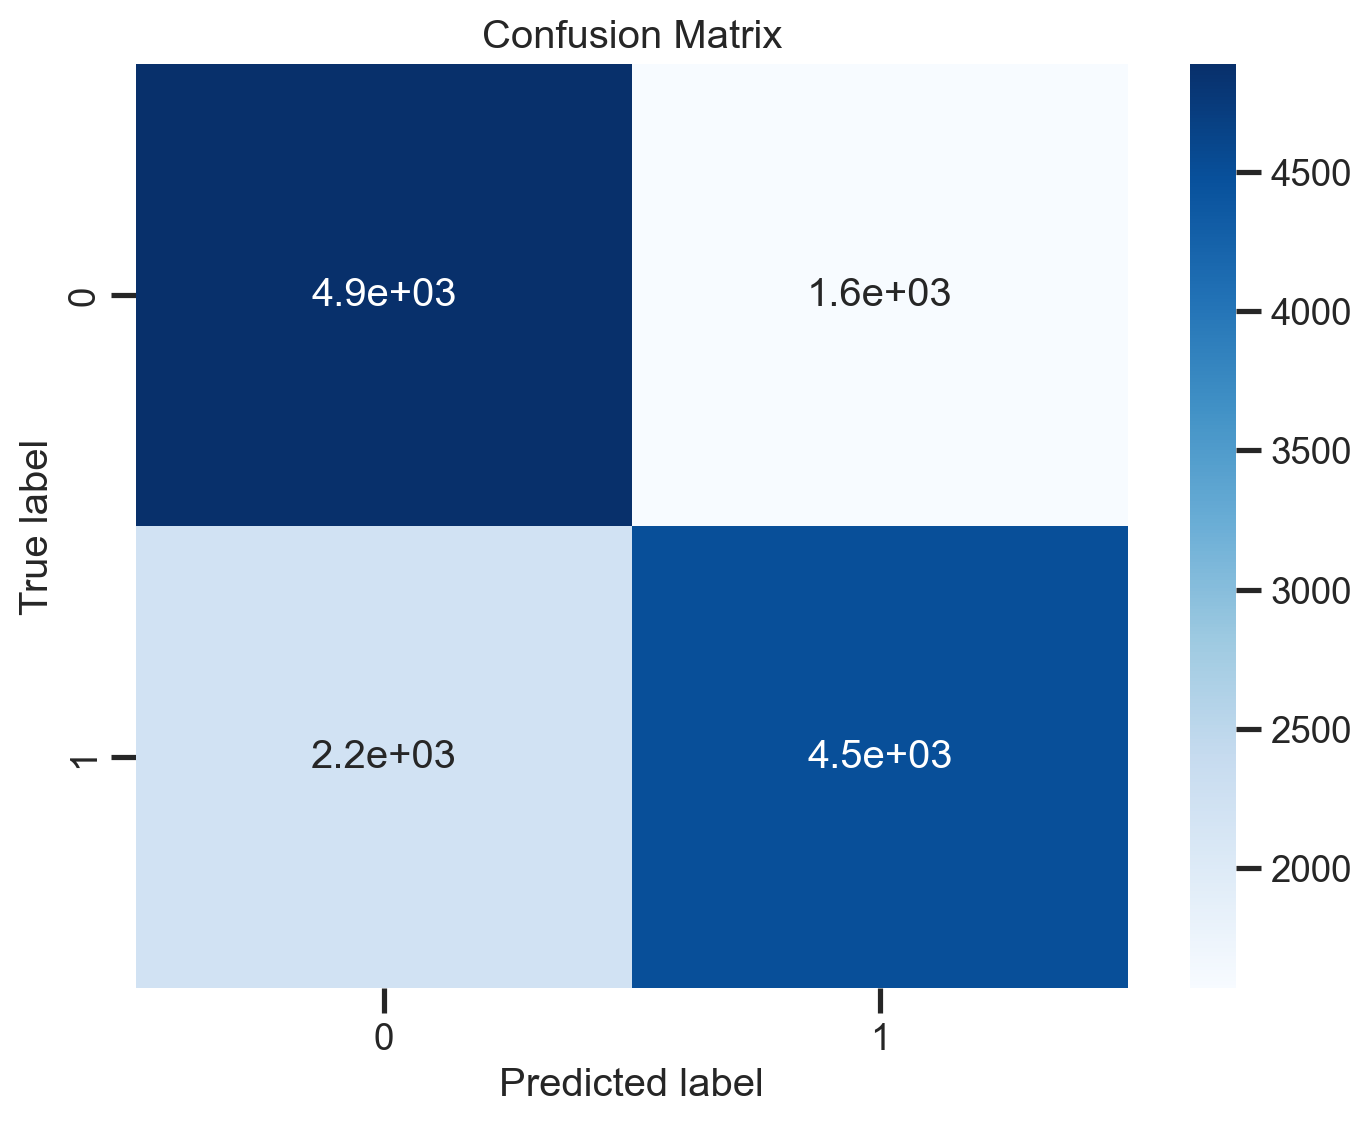

In [56]:
# plot confusion matrix
ax=sns.heatmap(confusion_matrix(y_test, y_pred_LR), annot=True, cmap="Blues")
ax.set(xlabel='Predicted label', ylabel='True label', title="Confusion Matrix")
print(classification_report(y_test, y_pred_LR))

# modelaccuracy score: f1-score and jaccard score
F1_LR = f1_score(y_test, y_pred_LR, average='macro').round(2)

# print model accuracy scores
print('f1 score:', F1_LR)

decide       0.580590
x_sex        0.369282
x_age65yr    0.222061
x_phys14d    0.221780
x_aidtst4    0.191046
x_smoker3    0.188301
x_ltasth1    0.182355
x_lmtact3    0.173678
medcost1     0.144897
diffalon     0.144451
x_educag     0.142168
weight2      0.137833
renthom1     0.134230
flushot7     0.125830
marital      0.125639
x_prace1     0.102625
x_imprace    0.092156
x_lmtwrk3    0.088274
employ1      0.086739
grenda1_     0.083394
toldhi3      0.075205
x_rfchol3    0.074780
checkup1     0.074753
x_drdxar3    0.061871
x_urbstat    0.061658
x_rfhlth     0.056853
drnkany5     0.054915
cpdemo1b     0.052026
chccopd3     0.051739
x_frutsu1    0.048238
x_incomg1    0.047407
x_state      0.046559
pneuvac4     0.043665
diffwalk     0.042552
vegeda2_     0.036040
x_chldcnt    0.035548
deaf         0.032856
potada1_     0.028621
frutda2_     0.024023
frnchda_     0.023691
x_bmi5cat    0.022529
x_rfhype6    0.021079
usenow3      0.019159
x_vegesu1    0.017690
dtype: float64


Text(0.5, 1.0, 'Feature Importance')

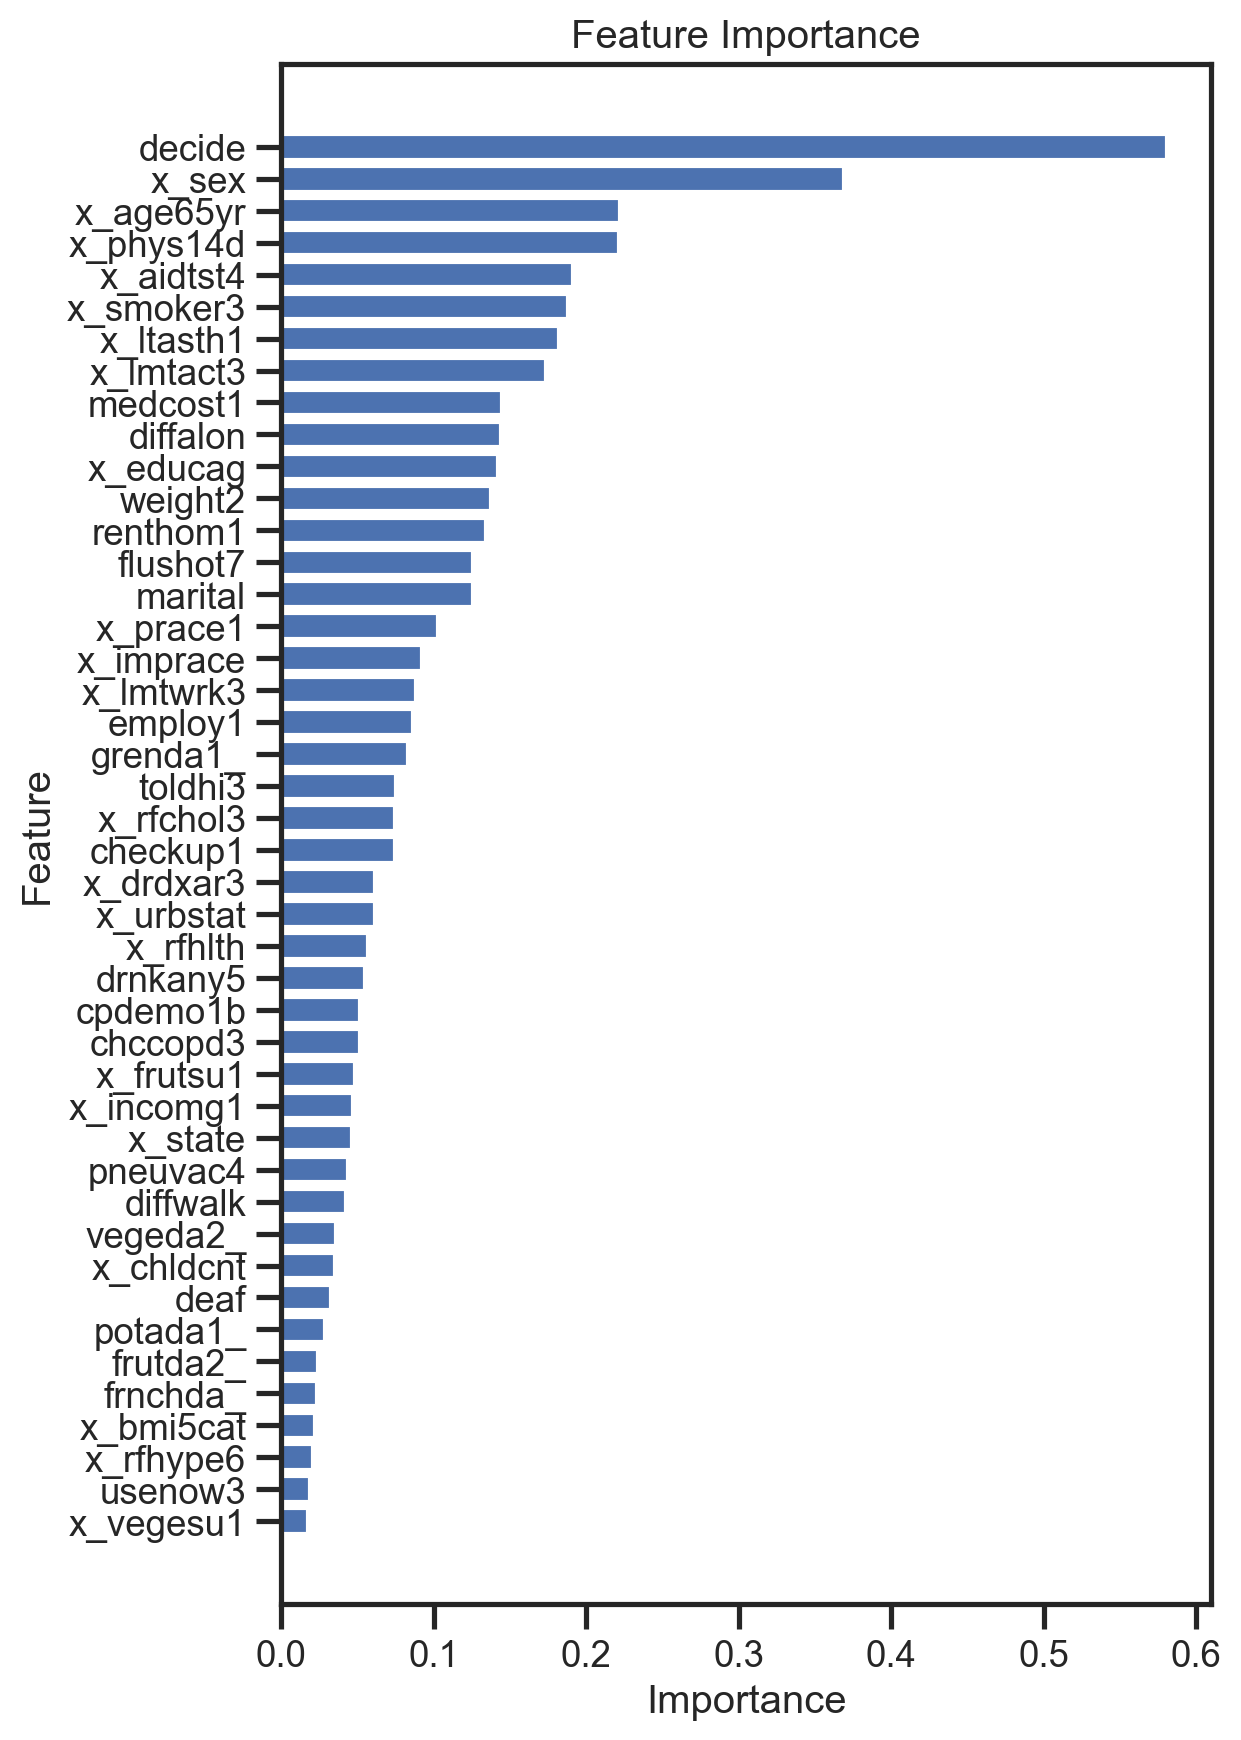

In [57]:
# Map feature importance values to feature names
feature_names = newX.columns
feature_importances = pd.Series(abs(LR.coef_[0]), index=feature_names)

# Print the feature importance values
print(feature_importances.sort_values(ascending=False))

# Sort feature importance values in descending order
feature_importances = feature_importances.sort_values(ascending=True)

# Plot feature importance barh chart
plt.figure(figsize=(6, 10))
plt.barh(feature_importances.index, feature_importances.values)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

## Catboost Classifier

In [74]:
from catboost import CatBoostClassifier

In [75]:
cat = CatBoostClassifier(verbose=False)
cat.fit(X_train, y_train)

In [76]:
preds = cat.predict(X_test)

In [77]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      6455
           1       0.73      0.70      0.72      6706

    accuracy                           0.72     13161
   macro avg       0.72      0.72      0.72     13161
weighted avg       0.72      0.72      0.72     13161



In [78]:
cat.feature_importances_

array([ 5.6131094 ,  1.27811826,  1.50278805,  0.72401553,  0.66160417,
        3.45858956,  1.86864873,  0.79953125,  2.51649047,  5.63154322,
        0.72358857, 10.77593394,  0.74278773,  1.9567576 ,  0.39416434,
        1.35698592,  0.64843864,  0.76069802,  3.36771191,  0.88078875,
        3.44824958,  0.71023158,  0.70262563,  1.80162969,  0.27162578,
        1.6015132 ,  1.36681456,  1.8060182 ,  4.577336  ,  2.59808763,
        0.78263048,  1.73894562,  2.07540289,  2.15602782,  2.5647919 ,
        0.88172116,  2.30530133,  1.77952155,  3.62877458,  2.82715253,
        2.81589096,  2.34847061,  4.23134599,  5.31759666])

In [79]:
feature_names

Index(['x_state', 'medcost1', 'checkup1', 'toldhi3', 'chccopd3', 'marital',
       'renthom1', 'cpdemo1b', 'employ1', 'weight2', 'deaf', 'decide',
       'diffwalk', 'diffalon', 'usenow3', 'flushot7', 'pneuvac4', 'x_urbstat',
       'x_imprace', 'x_rfhlth', 'x_phys14d', 'x_rfhype6', 'x_rfchol3',
       'x_ltasth1', 'x_drdxar3', 'x_lmtact3', 'x_lmtwrk3', 'x_prace1', 'x_sex',
       'x_age65yr', 'x_bmi5cat', 'x_chldcnt', 'x_educag', 'x_incomg1',
       'x_smoker3', 'drnkany5', 'x_aidtst4', 'frutda2_', 'grenda1_',
       'frnchda_', 'potada1_', 'vegeda2_', 'x_frutsu1', 'x_vegesu1'],
      dtype='object')

In [80]:
feat_imp = pd.DataFrame(dict(features=feature_names, coef=cat.feature_importances_)).sort_values(by='coef',ascending=False)

In [81]:
impfeat = feat_imp.head(20)['features'].values.tolist()

In [82]:
feat_imp

features       coef
11     decide  10.775934
9     weight2   5.631543
0     x_state   5.613109
43  x_vegesu1   5.317597
28      x_sex   4.577336
42  x_frutsu1   4.231346
38   grenda1_   3.628775
5     marital   3.458590
20  x_phys14d   3.448250
18  x_imprace   3.367712
39   frnchda_   2.827153
40   potada1_   2.815891
29  x_age65yr   2.598088
34  x_smoker3   2.564792
8     employ1   2.516490
41   vegeda2_   2.348471
36  x_aidtst4   2.305301
33  x_incomg1   2.156028
32   x_educag   2.075403
13   diffalon   1.956758
6    renthom1   1.868649
27   x_prace1   1.806018
23  x_ltasth1   1.801630
37   frutda2_   1.779522
31  x_chldcnt   1.738946
25  x_lmtact3   1.601513
2    checkup1   1.502788
26  x_lmtwrk3   1.366815
15   flushot7   1.356986
1    medcost1   1.278118
35   drnkany5   0.881721
19   x_rfhlth   0.880789
7    cpdemo1b   0.799531
30  x_bmi5cat   0.782630
17  x_urbstat   0.760698
12   diffwalk   0.742788
3     toldhi3   0.724016
10       deaf   0.723589
21  x_rfhype6   0.710232
22  x_rfchol3   0.702626
4    chccopd3   0.661604
16   pneuvac4   0.648439
14    usenow3   0.394164
24  x_drdxar3   0.271626

# Preparing Test data

In [84]:
test = pd.read_csv(r'C:\Users\kings\OneDrive - MMU\Desktop\bip-mental-health-technical-challenge\HDRUK_GROUP_4\test_set.csv')

In [85]:
test.head()

X_STATE  FMONTH    IDATE  IMONTH  IDAY  IYEAR  DISPCODE       SEQNO  \
0       26       2  3162021       3    16   2021      1100  2021002830   
1        5       5  5162021       5    16   2021      1200  2021003616   
2       53       7  8132021       8    13   2021      1100  2021009215   
3       20       1  2112021       2    11   2021      1100  2021004848   
4       49       5  6292021       6    29   2021      1100  2021003468   

        X_PSU  CTELENM1  ...  X_VEGRES1  X_FRUTSU1  X_VEGESU1  X_FRTLT1A  \
0  2021002830       NaN  ...          1       24.0      201.0          2   
1  2021003616       NaN  ...          0        NaN        NaN          9   
2  2021009215       NaN  ...          1      157.0      100.0          1   
3  2021004848       NaN  ...          1      110.0      417.0          1   
4  2021003468       NaN  ...          1       71.0      429.0          2   

   X_VEGLT1A  X_FRT16A  X_VEG23A  X_FRUITE1  X_VEGETE1  Record_ID  
0          1         1         1          0          0     169293  
1          9         1         1          1          1      24215  
2          1         1         1          0          0     408054  
3          1         1         1          0          0     108467  
4          1         1         1          0          0     375464  

[5 rows x 287 columns]

In [107]:
test.shape

(20000, 287)

In [109]:
test.columns = test.columns.str.lower()

### using the features from the X_train to wrok with

In [110]:
test = test[X.columns]

In [111]:
test.shape

(20000, 64)

In [112]:
test.isnull().sum().sort_values(ascending=False)

x_rfchol3    2773
toldhi3      2748
x_vegesu1    2541
x_frutsu1    2161
vegeda2_     2014
             ... 
x_totinda       0
x_rfhype6       0
x_cholch3       0
x_ltasth1       0
x_hlthpln       0
Length: 64, dtype: int64

In [113]:
test_columns_with_nulls = null_counts(test)

Value counts for column 'x_rfchol3' (Null Count: 2773):
1.0    9791
2.0    7288
NaN    2773
9.0     148
Name: x_rfchol3, dtype: int64

Value counts for column 'toldhi3' (Null Count: 2748):
2.0    9815
1.0    7289
NaN    2748
7.0     139
9.0       9
Name: toldhi3, dtype: int64

Value counts for column 'x_vegesu1' (Null Count: 2541):
NaN        2541
157.0       395
200.0       363
143.0       308
100.0       266
           ... 
796.0         1
338.0         1
15003.0       1
1538.0        1
642.0         1
Name: x_vegesu1, Length: 810, dtype: int64

Value counts for column 'x_frutsu1' (Null Count: 2161):
100.0     2337
NaN       2161
200.0     1978
300.0      911
43.0       806
          ... 
707.0        1
158.0        1
3300.0       1
287.0        1
602.0        1
Name: x_frutsu1, Length: 322, dtype: int64

Value counts for column 'vegeda2_' (Null Count: 2014):
100.0    6216
NaN      2014
200.0    1764
43.0     1487
29.0     1244
         ... 
229.0       1
213.0       1
63.0        1


In [114]:
test_columns_with_nulls

['x_rfchol3',
 'toldhi3',
 'x_vegesu1',
 'x_frutsu1',
 'vegeda2_',
 'x_bmi5cat',
 'potada1_',
 'frnchda_',
 'ftjuda2_',
 'grenda1_',
 'frutda2_',
 'x_aidtst4',
 'pneuvac4',
 'flushot7',
 'usenow3',
 'diffalon',
 'diffdres',
 'diffwalk',
 'decide',
 'blind',
 'deaf',
 'height3',
 'weight2',
 'x_metstat',
 'x_urbstat',
 'x_michd',
 'employ1',
 'x_lmtwrk3',
 'x_lmtact3',
 'x_drdxar3',
 'veteran3',
 'cpdemo1b',
 'renthom1']

In [115]:
# Identify the data types of columns to distinguish between continuous and categorical
continuous_columns = []
categorical_columns = []

for column in test.columns[test.columns.isin(test_columns_with_nulls)]:
    if test[column].nunique() <= 4:
        # for null columns, columns with less than or equal to 4 unique values are categorical
        categorical_columns.append(column)
    else:
        continuous_columns.append(column)

In [116]:
print(
    f"number of contious columns with missing values = {len(continuous_columns)}\n"
      f"number of contious columns with missing values = {len(categorical_columns)}"
      )

number of contious columns with missing values = 14
number of contious columns with missing values = 19


In [117]:
replacement_values_dict = fill_null_values(test, test_columns_with_nulls)

Columns and Method to replace missing values
'toldhi3': (Replaced with Mode)
'veteran3': (Replaced with Mode)
'deaf': (Replaced with Mode)
'blind': (Replaced with Mode)
'decide': (Replaced with Mode)
'diffwalk': (Replaced with Mode)
'diffdres': (Replaced with Mode)
'diffalon': (Replaced with Mode)
'flushot7': (Replaced with Mode)
'pneuvac4': (Replaced with Mode)
'x_metstat': (Replaced with Mode)
'x_urbstat': (Replaced with Mode)
'x_rfchol3': (Replaced with Mode)
'x_michd': (Replaced with Mode)
'x_drdxar3': (Replaced with Mode)
'x_lmtact3': (Replaced with Mode)
'x_lmtwrk3': (Replaced with Mode)
'x_bmi5cat': (Replaced with Mode)
'x_aidtst4': (Replaced with Mode)
'renthom1': (Replaced with Median)
'cpdemo1b': (Replaced with Median)
'employ1': (Replaced with Mean)
'weight2': (Replaced with Median)
'height3': (Replaced with Median)
'usenow3': (Replaced with Median)
'ftjuda2_': (Replaced with Median)
'frutda2_': (Replaced with Median)
'grenda1_': (Replaced with Median)
'frnchda_': (Replaced 

In [118]:
# Replace null values in the DataFrame with the respective mode/median/mean
test.fillna(replacement_values_dict, inplace=True)

In [119]:
test.isnull().sum().any()

False

In [120]:
x = pd.DataFrame(dict(missing = test.isnull().sum()))
x.query("missing>0")

Empty DataFrame
Columns: [missing]
Index: []

In [121]:
test.shape

(20000, 64)

In [123]:
# List of columns considered as continuous
continuous_columns = [i.lower() for i in ['X_STATE', 'IYEAR', 'FTJUDA2_', 'FRUTDA2_', 'GRENDA1_', 'FRNCHDA_',
                      'POTADA1_', 'VEGEDA2_', 'X_FRUTSU1', 'X_VEGESU1']]

# Filtering out the categorical columns
categorical_columns = test.columns[~test.columns.isin(continuous_columns)]

In [124]:
test = standardize_values(test)

In [125]:
test.shape

(20000, 64)

In [126]:
test = test[newX.columns]

In [127]:
test.isna().sum()

x_state      0
medcost1     0
checkup1     0
toldhi3      0
chccopd3     0
marital      0
renthom1     0
cpdemo1b     0
employ1      0
weight2      0
deaf         0
decide       0
diffwalk     0
diffalon     0
usenow3      0
flushot7     0
pneuvac4     0
x_urbstat    0
x_imprace    0
x_rfhlth     0
x_phys14d    0
x_rfhype6    0
x_rfchol3    0
x_ltasth1    0
x_drdxar3    0
x_lmtact3    0
x_lmtwrk3    0
x_prace1     0
x_sex        0
x_age65yr    0
x_bmi5cat    0
x_chldcnt    0
x_educag     0
x_incomg1    0
x_smoker3    0
drnkany5     0
x_aidtst4    0
frutda2_     0
grenda1_     0
frnchda_     0
potada1_     0
vegeda2_     0
x_frutsu1    0
x_vegesu1    0
dtype: int64

In [128]:
# import data scaling package
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
test_scaled = scaler.fit_transform(test)

In [130]:
preds = cat.predict(test_scaled)

In [131]:
preds

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [132]:
sample = pd.read_csv(r'C:\Users\kings\OneDrive - MMU\Desktop\bip-mental-health-technical-challenge\skinny_unanswered_set.csv')
sample.head()

Record_ID  Outcome
0     169293      NaN
1      24215      NaN
2     408054      NaN
3     108467      NaN
4     375464      NaN

In [133]:
sample['Outcome'] = preds

In [134]:
sample.head()

Record_ID  Outcome
0     169293        1
1      24215        0
2     408054        0
3     108467        1
4     375464        1

In [135]:
# Replace the object values ('Pos','Neg') in the Outcome column with integer (0,1)
sample['Outcome'] = sample['Outcome'].replace({0:'Neg',1:'Pos'})

# Display the updated value
sample['Outcome'].value_counts()

Neg    10009
Pos     9991
Name: Outcome, dtype: int64

In [136]:
sample.to_csv('CATsubmission1.csv',index=False)